# Cobalt Reporting Analysis and Visualization
* Operational analysis: Provide immediate insight on patterns of behavior exhibited on the platform

/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/cobalt_reporting_data.py:94: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  account['week'] = account['created'].dt.week


37442


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/cobalt_reporting_data.py:150: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  accounts_for_stats['week'] = accounts_for_stats['created'].dt.week


17530
46507
500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
Assessment PHQ9 is already complete! Saving session info for further evaluation.
1000 accounts processed...
1500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
2000 accounts processed...
2500 accounts processed...
3000 accounts processed...
3500 accounts processed...
4000 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
4500 accounts processed...
5000 accounts processed...
5500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
Assessment GAD7 is already complete! Saving session info for further evaluation.
6000 accounts processed...
6500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
7000 accounts processed...
7500 accounts processed...
8000 accounts pro

25
851


All instances: 10966
	Unique accounts associated with all instances: 8120
Instances with complete PHQ4 2765
	Unique accounts associated with complete PHQ4 2622
Instances with escalation: 2548
	Unique accounts associated with instances with escalations: 2498
Total flow volume (patients): 2765
Total link wieght per level (patients): 2765
	Total links per level (unique assessment pathways): 172
13


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/cobalt_reporting_data.py:1922: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
28


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/cobalt_reporting_data.py:2037: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
22
29
121
6


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/cobalt_reporting_data.py:2145: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/cobalt_reporting_data.py:2253: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
2548
29
121
29
121


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/cobalt_reporting_data.py:2364: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



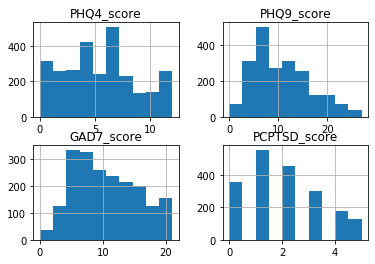

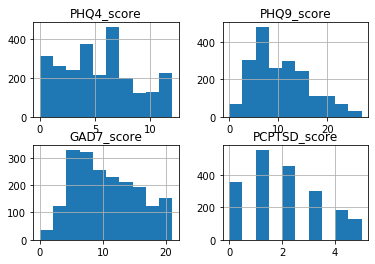

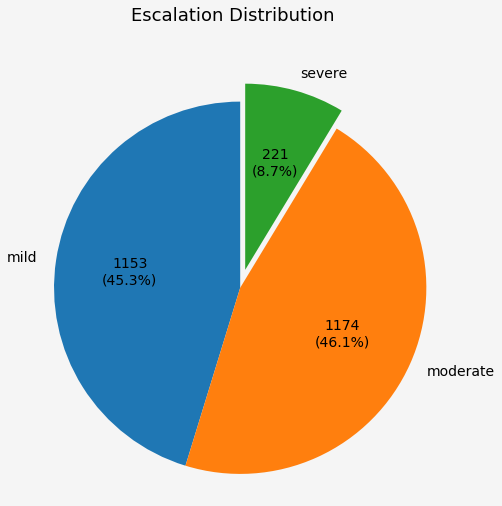

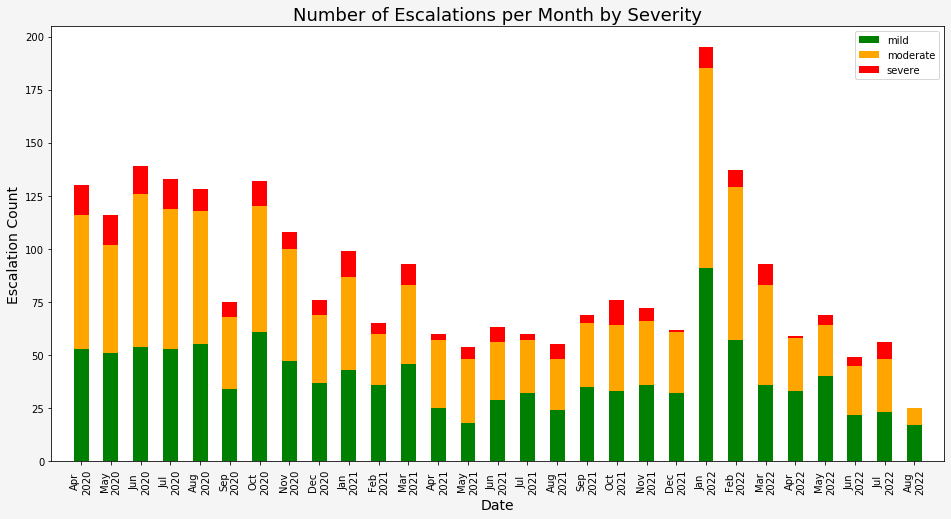

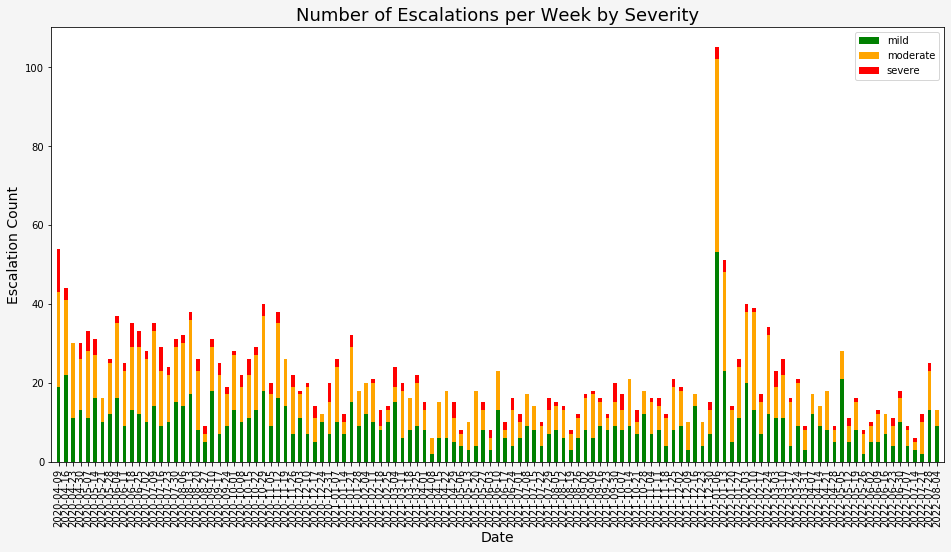

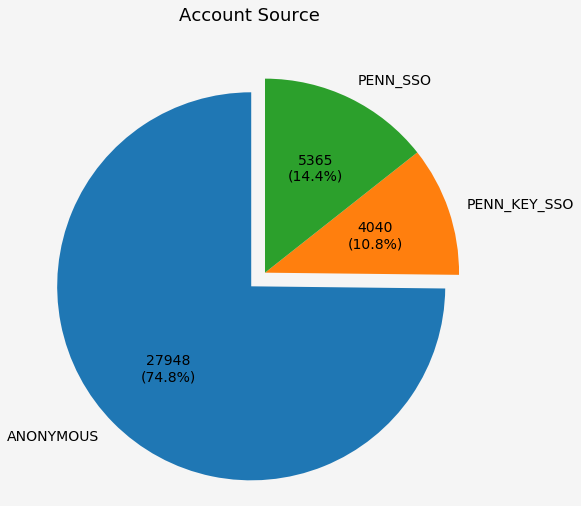

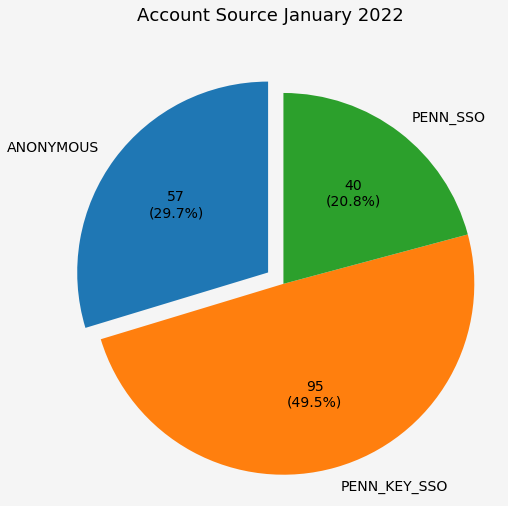

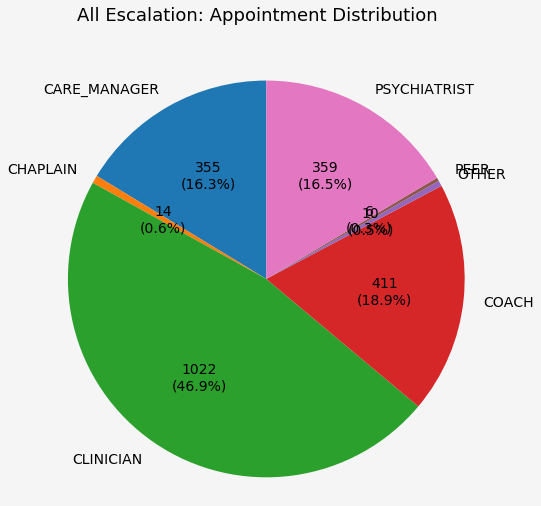

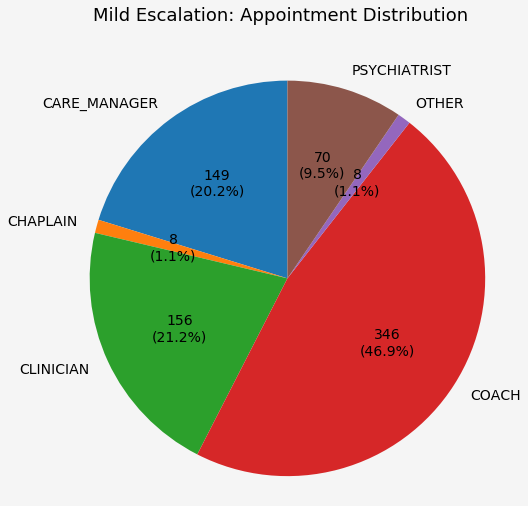

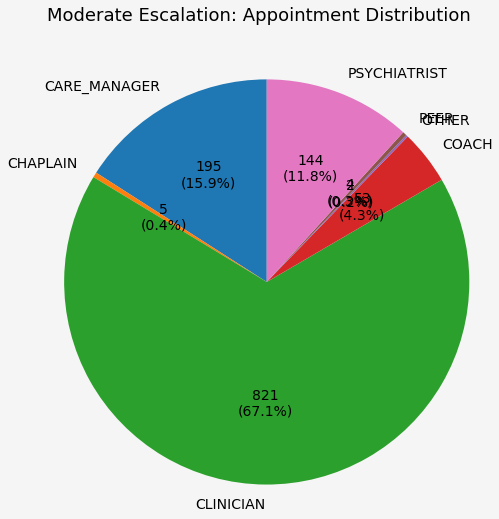

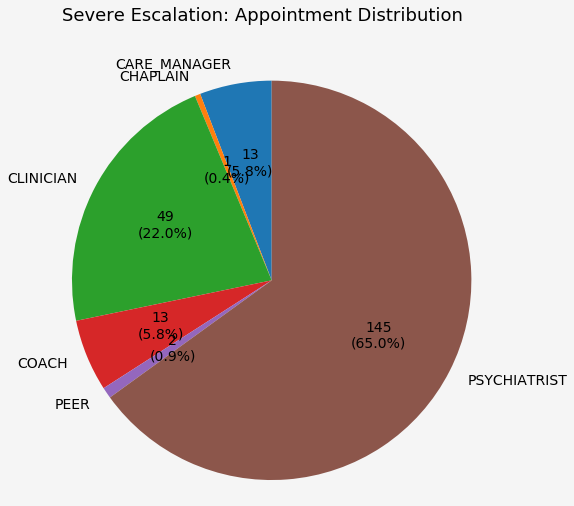

Active Accounts:
13083 unique, active accounts accessed mental health and well-being resources on the Cobalt platform
	8120 distinct accounts attempted assessments
	2448 distinct accounts booked 3825 appointments
	5207 distinct accounts engaged with content

Assessments and Escalations:
2498 unique accounts completed mental health assessments, resulting in 2548 distinct escalations
	Moderate Escalation:
	1156(46.28%) unique accounts met moderate criteria, resulting in 1174(46.08%) moderate escalations
	Severe Escalation:
	220(8.81%) unique accounts met severe criteria, resulting in 221(8.67%) severe escalations

Appointments:
1128/2498(45.16)% accounts with completed mental health assessments booked 2177 appointments with a trained mental health professional


In [1]:
# Modules
from cobalt_reporting_data import *

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from scipy import stats

import re
import datetime
from collections import defaultdict

import glob
import os
import psycopg2

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; 
sns.set()

%matplotlib inline

# Pandas view options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('precision', 4)

# Program Parameters

# Display Data

## Accounts
* Note 08/25/2021: 
    * How many employees at Penn?
    * Are all employees eligible?
    * Other groups (students) eligible in future?

### Account

In [2]:
# Display adjusted data
print(len(account))
print(len(account.columns))
account.head(2)

37442
35


account_id  role_id institution_id  \
0  afe7ff25-775e-4518-822b-a5bb56683d7d  PATIENT           PENN   
1  3115d538-f423-4618-b23b-ec6ac9e554a9  PATIENT           PENN   

  account_source_id sso_id first_name last_name display_name email_address  \
0         ANONYMOUS   None       None      None         None          None   
1         ANONYMOUS   None       None      None         None          None   

  phone_number sso_attributes  consent_form_accepted  \
0         None           None                  False   
1         None           None                  False   

  consent_form_accepted_date locale         time_zone  \
0                        NaT  en-US  America/New_York   
1                        NaT  en-US  America/New_York   

                           created                     last_updated  \
0 2021-04-08 14:08:38.598732+00:00 2021-04-08 14:08:38.598732+00:00   
1 2021-05-18 10:00:00.228881+00:00 2021-05-18 10:00:00.228881+00:00   

  epic_patient_id epic_patient_id_type  epic_patient_created_by_cobalt  \
0            None                 None                           False   
1            None                 None                           False   

  password source_system_id provider_id beta_status_id  \
0     None           COBALT        None        UNKNOWN   
1     None           COBALT        None        UNKNOWN   

   access_token_expiration_in_minutes  \
0                                 NaN   
1                                 NaN   

   access_token_short_expiration_in_minutes metadata  \
0                                       NaN     None   
1                                       NaN     None   

   scheduling_tutorial_viewed  year  month  week  day year_month  \
0                       False  2021      4    14    8 2021-04-01   
1                       False  2021      5    20   18 2021-05-01   

  year_month_week dayofyear  
0      2021-04-08  20210408  
1      2021-05-13  20210518

### Stats Accounts

In [3]:
# Display adjusted data
print(len(accounts_for_stats))
print(len(accounts_for_stats.columns))
accounts_for_stats.head(2)

37490
24


account_id  role_id institution_id  \
0  afe7ff25-775e-4518-822b-a5bb56683d7d  PATIENT           PENN   
1  3115d538-f423-4618-b23b-ec6ac9e554a9  PATIENT           PENN   

  account_source_id sso_id first_name last_name display_name email_address  \
0         ANONYMOUS   None       None      None         None          None   
1         ANONYMOUS   None       None      None         None          None   

  phone_number sso_attributes  consent_form_accepted  \
0         None           None                  False   
1         None           None                  False   

  consent_form_accepted_date locale         time_zone  \
0                        NaT  en-US  America/New_York   
1                        NaT  en-US  America/New_York   

                           created                     last_updated  year  \
0 2021-04-08 14:08:38.598732+00:00 2021-04-08 14:08:38.598732+00:00  2021   
1 2021-05-18 10:00:00.228881+00:00 2021-05-18 10:00:00.228881+00:00  2021   

   month  week  day year_month year_month_week dayofyear  
0      4    14    8 2021-04-01      2021-04-08  20210408  
1      5    20   18 2021-05-01      2021-05-13  20210518

## Providers
* NOTE 08/31/2021: Removing providers with system affinity id PIC changes counts of future appts and appt availability
    * Removing these providers also drastically changes the historic availability counts 4.4k --> 2.7k
    * Why is this? and do we still want to remove these providers?

### Provider

In [4]:
# Display adjusted data
print(len(provider))
print(len(provider.columns))
provider.head(2)

241
34


provider_id institution_id  \
0  521da634-185e-4c1d-b587-cf23e8dfbe69           PENN   
1  688e0886-b776-4b95-89e6-2329a123ccfc           PENN   

                                                name  \
0                               Ayyappan Venkatraman   
1  University of Pennsylvania Employee Assistance...   

                                       title  \
0                        Psychiatry Resident   
1  EAP Intake Counselor from Health Advocate   

                      email_address  \
0  OPCCobalt@pennmedicine.upenn.edu   
1    EAP-Connect@healthadvocate.com   

                                           image_url locale         time_zone  \
0  https://penncobalt.s3.us-east-2.amazonaws.com/...  en-US  America/New_York   
1  https://penncobalt.s3.us-east-2.amazonaws.com/...  en-US  America/New_York   

   acuity_calendar_id  bluejeans_user_id      tags  \
0           3831985.0            3874544  [Year 4]   
1           4248614.0            3874544      None   

                           created                     last_updated  \
0 2020-04-12 14:54:35.680223+00:00 2022-04-20 14:42:43.066088+00:00   
1 2020-07-30 18:05:32.597044+00:00 2022-05-02 16:57:06.508559+00:00   

                                       entity  \
0  Hospital of the University of Pennsylvania   
1                                        None   

                               clinic license specialty intake_assessment_id  \
0  Outpatient Psychiatry Center (OPC)      MD      None                 None   
1                     Health Advocate    None      None                 None   

   active scheduling_system_id epic_provider_id epic_provider_id_type  \
0   False               ACUITY             None                  None   
1    True               ACUITY             None                  None   

  videoconference_platform_id videoconference_url epic_appointment_filter_id  \
0                   BLUEJEANS                None                       NONE   
1                   TELEPHONE          8667992329                       NONE   

  system_affinity_id   bio bio_url  year  month  day year_month  \
0             COBALT  None    None  2020      4   12 2020-04-01   
1             COBALT  None    None  2020      7   30 2020-07-01   

  year_month_week dayofyear  
0      2020-04-09  20200412  
1      2020-07-30  20200730

### Provider Support Role

In [5]:
# Display adjusted data
print(len(provider_support_role))
print(len(provider_support_role.columns))
provider_support_role.head(2)

247
2


provider_id support_role_id
0  38e2bbb1-7930-40b3-ab7c-dc87eadf6444    PSYCHIATRIST
1  8f3f7c98-ce1c-42b3-9840-1b49ff83a4ce            PEER

### Provider Appointment Type

In [6]:
# Display adjusted data
print(len(provider_appointment_type))
print(len(provider_appointment_type.columns))
provider_appointment_type.head(2)

321
6


provider_appointment_type_id                           provider_id  \
0  02f452b0-d150-4c89-8ee7-f6600727be60  38e2bbb1-7930-40b3-ab7c-dc87eadf6444   
1  85e6ce45-07ea-4729-b7ca-c799790a246f  38e2bbb1-7930-40b3-ab7c-dc87eadf6444   

   display_order                          created  \
0              1 2020-07-18 01:38:53.757424+00:00   
1              2 2020-07-18 01:38:53.757424+00:00   

                      last_updated                   appointment_type_id  
0 2020-07-18 01:38:53.757424+00:00  367d33ad-2aad-4fea-a2a1-ea397e18fe43  
1 2020-07-18 01:38:53.757424+00:00  86b14268-96d9-45e9-9867-677b3d010385

## Appointments

### Appointment Type

In [7]:
# Display adjusted data
print(len(appointment_type))
print(len(appointment_type.columns))
appointment_type.head(2)

83
13


appointment_type_id  acuity_appointment_type_id  \
0  2294b4f1-7fad-454f-a118-06b479356d7d                  1.3870e+07   
1  a2cab967-9dc1-4327-94dd-da4be7652542                  2.1475e+07   

                                   name description  duration_in_minutes  \
0  1:1 Appointment with Psychotherapist        None                   60   
1           1:1 CTSA Intake Appointment        None                   45   

   deleted                          created                     last_updated  \
0    False 2020-04-29 22:49:45.585841+00:00 2021-02-05 22:32:12.739208+00:00   
1    False 2021-03-23 20:43:48.450351+00:00 2021-03-23 20:58:49.167044+00:00   

  scheduling_system_id epic_visit_type_id epic_visit_type_id_type  \
0               ACUITY               None                    None   
1               ACUITY               None                    None   

  visit_type_id  hex_color  
0         OTHER    3692510  
1         OTHER    3692510

### Booked Appointments

In [8]:
# Display adjusted data
print(len(appointment))
print(len(appointment.columns))
appointment.head(2)

3825
48


appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
0  8e52c173-f3d4-4b9d-913c-32a5679e2387  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9             8.0982e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
0                         NaN              NaN            1.0305e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
0  https://bluejeans.com/166022552/0525                 1:1 with Care Manager   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
0 2022-04-22 11:00:00-04:00 2022-04-22 11:30:00                   30   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
0  America/New_York     False         NaT 2022-04-20 11:32:48.204541-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
0 2022-04-20 15:32:48.204541+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
0  aef3538a-73fa-40cf-8d3f-367022913b9c         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
0                           0525  20290377-2978-4472-b00c-6f604f25ee58   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
0               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  created_year  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None          2022   
0  08048f29-035c-4341-82fd-b41406303114                    None          2022   

   created_month  created_day created_year_month created_year_month_week  \
0              6           22         2022-06-01              2022-06-16   
0              4           20         2022-04-01              2022-04-14   

  created_dayofyear  apt_year  apt_month  apt_day apt_year_month  \
0          20220622      2022          7        6     2022-07-01   
0          20220420      2022          4       22     2022-04-01   

  apt_year_month_week apt_dayofyear  created_completed_time  \
0          2022-06-30      20220706                    14.0   
0          2022-04-21      20220422                     2.0   

                  appointment_type_name support_role_id  
0  1:1 Appointment with Psychotherapist       CLINICIAN  
0                 1:1 with Care Manager    CARE_MANAGER

In [9]:
# Display adjusted data
print(len(appointment_future))
print(len(appointment_future.columns))
appointment_future.head(2)

16
48


appointment_id  \
65  f8118f5e-37d4-486b-a44c-70af428bfe27   
68  a185df93-327b-456c-9138-39513b274943   

                             provider_id  \
65  c236acc5-9473-457a-af51-de57bddcb8a3   
68  c236acc5-9473-457a-af51-de57bddcb8a3   

                              account_id  acuity_appointment_id  \
65  3db6521e-7680-4537-b2db-feeef69e2325             8.7553e+08   
68  19839613-485d-48df-8db2-66a0b5b2699b             8.7575e+08   

    acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
65                         NaN              NaN            1.0655e+08   
68                         NaN              NaN            1.0656e+08   

                     videoconference_url  \
65  https://bluejeans.com/840765765/9363   
68  https://bluejeans.com/570738957/0968   

                                   title                start_time  \
65  1:1 Appointment with Psychotherapist 2022-08-17 19:00:00-04:00   
68  1:1 Appointment with Psychotherapist 2022-08-24 17:00:00-04:00   

              end_time  duration_in_minutes         time_zone  canceled  \
65 2022-08-17 20:00:00                   60  America/New_York      True   
68 2022-08-24 18:00:00                   60  America/New_York     False   

                        canceled_at                          created  \
65 2022-08-13 02:47:37.870571+00:00 2022-08-08 10:04:35.749101-04:00   
68                              NaT 2022-08-08 14:36:52.625088-04:00   

                       last_updated epic_contact_id epic_contact_id_type  \
65 2022-08-13 02:47:37.870571+00:00            None                 None   
68 2022-08-08 18:36:52.625088+00:00            None                 None   

                     appointment_type_id phone_number  \
65  2294b4f1-7fad-454f-a118-06b479356d7d         None   
68  2294b4f1-7fad-454f-a118-06b479356d7d         None   

   videoconference_platform_id                 appointment_reason_id  \
65                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
68                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                   created_by_account_id comment attendance_status_id  \
65  3db6521e-7680-4537-b2db-feeef69e2325    None             CANCELED   
68  19839613-485d-48df-8db2-66a0b5b2699b    None              UNKNOWN   

   bluejeans_participant_passcode                  intake_assessment_id  \
65                           9363  5929588e-ee53-4df5-9c62-1656a43ff4cd   
68                           0968  5929588e-ee53-4df5-9c62-1656a43ff4cd   

   scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
65               ACUITY                    False                       None   
68               ACUITY                    False                       None   

               intake_account_session_id interaction_instance_id  \
65  2fa088fe-9234-4465-91b1-a15928b6a5f4                    None   
68  fc4a990b-58af-49d8-b217-1b31842b274e                    None   

    created_year  created_month  created_day created_year_month  \
65          2022              8            8         2022-08-01   
68          2022              8            8         2022-08-01   

   created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
65              2022-08-04          20220808      2022          8       17   
68              2022-08-04          20220808      2022          8       24   

   apt_year_month apt_year_month_week apt_dayofyear  created_completed_time  \
65     2022-08-01          2022-08-11      20220817                     9.0   
68     2022-08-01          2022-08-18      20220824                    16.0   

                   appointment_type_name support_role_id  
65  1:1 Appointment with Psychotherapist       CLINICIAN  
68  1:1 Appointment with Psychotherapist       CLINICIAN

### Available Appointments

In [10]:
# Display adjusted data
print(len(provider_availability))
print(len(provider_availability.columns))
provider_availability.head(2)

1492
22


provider_availability_id                           provider_id  \
0  886ecd56-4527-4fc7-ae27-91d2b5875d6b  00e1f7e0-cb78-420c-aac8-9c841081c542   
1  3d8209cd-7c3e-4a68-85d4-43daecc63ffb  00e1f7e0-cb78-420c-aac8-9c841081c542   

                  date_time                          created  \
0 2020-10-08 08:00:00-04:00 2021-10-04 15:28:37.192211-04:00   
1 2020-10-15 08:00:00-04:00 2021-10-04 15:28:37.787609-04:00   

                      last_updated                   appointment_type_id  \
0 2021-10-04 19:28:37.192211+00:00  bc57f5ef-12ec-4298-9438-01791b0b3f00   
1 2021-10-04 19:28:37.787609+00:00  bc57f5ef-12ec-4298-9438-01791b0b3f00   

                     epic_department_id logical_availability_id  created_year  \
0  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None          2021   
1  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None          2021   

   created_month  created_day created_year_month created_year_month_week  \
0             10            4         2021-10-01              2021-09-30   
1             10            4         2021-10-01              2021-09-30   

  created_dayofyear  apt_year  apt_month  apt_day apt_year_month  \
0          20211004      2020         10        8     2020-10-01   
1          20211004      2020         10       15     2020-10-01   

  apt_year_month_week apt_dayofyear appointment_type_name support_role_id  
0          2020-10-08      20201008         Initial Visit       CLINICIAN  
1          2020-10-15      20201015         Initial Visit       CLINICIAN

In [11]:
provider_availability.sort_values('date_time').head(2)

provider_availability_id  \
812  7180d236-88db-4fa5-a799-84cca44f65d1   
813  8b80732d-020d-487d-b392-ed7d3010da56   

                              provider_id                 date_time  \
812  8d75eca5-615b-4e92-82b0-3c6bb93fa168 2020-05-15 10:00:00-04:00   
813  8d75eca5-615b-4e92-82b0-3c6bb93fa168 2020-05-15 13:00:00-04:00   

                             created                     last_updated  \
812 2021-10-04 12:44:08.524178-04:00 2021-10-04 16:44:08.524178+00:00   
813 2021-10-04 12:44:08.524178-04:00 2021-10-04 16:44:08.524178+00:00   

                      appointment_type_id  \
812  71757e56-3a81-4053-b9ca-a97879ace957   
813  71757e56-3a81-4053-b9ca-a97879ace957   

                       epic_department_id logical_availability_id  \
812  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None   
813  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None   

     created_year  created_month  created_day created_year_month  \
812          2021             10            4         2021-10-01   
813          2021             10            4         2021-10-01   

    created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
812              2021-09-30          20211004      2020          5       15   
813              2021-09-30          20211004      2020          5       15   

    apt_year_month apt_year_month_week apt_dayofyear appointment_type_name  \
812     2020-05-01          2020-05-14      20200515         Initial Visit   
813     2020-05-01          2020-05-14      20200515         Initial Visit   

    support_role_id  
812    PSYCHIATRIST  
813    PSYCHIATRIST

In [12]:
# Display adjusted data
print(len(provider_availability_future))
print(len(provider_availability_future.columns))
provider_availability_future.head(2)

553
22


provider_availability_id  \
49  0dee8c85-ab75-4675-9b0e-744c3a4c4b78   
55  c17bcc36-757a-4f56-bbed-771807ded195   

                             provider_id                 date_time  \
49  9eb160cb-9db6-4a79-a3c1-83ac6a403db9 2022-08-22 10:00:00-04:00   
55  9eb160cb-9db6-4a79-a3c1-83ac6a403db9 2022-08-22 11:00:00-04:00   

                            created                     last_updated  \
49 2022-08-17 16:46:56.207179-04:00 2022-08-17 20:46:56.207179+00:00   
55 2022-08-17 16:46:56.207179-04:00 2022-08-17 20:46:56.207179+00:00   

                     appointment_type_id epic_department_id  \
49  aef3538a-73fa-40cf-8d3f-367022913b9c               None   
55  aef3538a-73fa-40cf-8d3f-367022913b9c               None   

   logical_availability_id  created_year  created_month  created_day  \
49                    None          2022              8           17   
55                    None          2022              8           17   

   created_year_month created_year_month_week created_dayofyear  apt_year  \
49         2022-08-01              2022-08-11          20220817      2022   
55         2022-08-01              2022-08-11          20220817      2022   

    apt_month  apt_day apt_year_month apt_year_month_week apt_dayofyear  \
49          8       22     2022-08-01          2022-08-18      20220822   
55          8       22     2022-08-01          2022-08-18      20220822   

    appointment_type_name support_role_id  
49  1:1 with Care Manager    CARE_MANAGER  
55  1:1 with Care Manager    CARE_MANAGER

## Assessments

### Assessment

In [13]:
print(len(assessment))
print(len(assessment.columns))
assessment.head(2)

163
9


assessment_id assessment_type_id  \
0  8f977685-236c-4bdc-b28d-4f34167a2f1d               GAD7   
1  97d1e727-7ba2-47f9-8662-ed8b40cf69d0               PHQ9   

                                       base_question  \
0  Over the last two weeks, how often have you be...   
1  Over the last two weeks, how often have you be...   

                     next_assessment_id                          created  \
0  35efce12-dac3-4b4e-9207-84ecba44d2a4 2020-04-12 14:54:27.650335+00:00   
1  8f977685-236c-4bdc-b28d-4f34167a2f1d 2020-04-12 14:54:28.879192+00:00   

                      last_updated  minimum_eligibility_score  \
0 2020-04-12 14:54:27.650335+00:00                          0   
1 2020-04-12 14:54:28.879192+00:00                          0   

  ineligible_message  answers_may_contain_pii  
0               None                    False  
1               None                    False

### Assessment Type

In [14]:
print(len(assessment_type))
print(len(assessment_type.columns))
assessment_type.head(2)

6
2


assessment_type_id                description
0              INTRO        Introductory Survey
1               PHQ4  Evidence-Based Assessment

### Answer

In [15]:
print(len(answer))
print(len(answer.columns))
answer.head(2)

781
10


answer_id                           question_id  \
0  b3c8131a-c27f-4e1e-a028-ce605c321fc2  152784db-0962-4eaa-9e51-f54027f8b7ff   
1  0f7c098d-8b35-4ab1-819d-7cbaa86c2216  152784db-0962-4eaa-9e51-f54027f8b7ff   

  answer_text  display_order  answer_value  crisis  \
0         yes              1             0   False   
1          no              2             1   False   

                           created                     last_updated   call  \
0 2020-06-02 12:30:32.107099+00:00 2020-06-02 12:30:32.107099+00:00  False   
1 2020-06-02 12:30:32.107099+00:00 2020-06-02 12:30:32.107099+00:00  False   

  next_question_id  
0             None  
1             None

### Answer Category

In [16]:
print(len(answer_category))
print(len(answer_category.columns))
answer_category.head(2)

520
5


answer_category_id                             answer_id  \
0  3fd34678-0612-40b1-9c9d-73e964d26b15  439285ca-45c9-4ca7-85b1-cbc0d73ea131   
1  5a4e6386-18aa-4560-a0df-a90eb2bf595c  439285ca-45c9-4ca7-85b1-cbc0d73ea131   

  category_id                          created  \
0         1.1 2020-04-12 14:54:32.764931+00:00   
1         1.7 2020-04-12 14:54:32.764931+00:00   

                      last_updated  
0 2020-04-12 14:54:32.764931+00:00  
1 2020-04-12 14:54:32.764931+00:00

### Category

In [17]:
print(len(category))
print(len(category.columns))
category.head(2)

72
2


category_id                description
0         1.1  1.1 My mood on covid unit
1         1.2    1.2 My mood in hospital

### Question
* overlapping phq4 questions excluded from phq9 and gad7

In [18]:
print(len(question))
print(len(question.columns))
question.head(2)

292
14


question_id                         assessment_id  \
0  cbdc2009-51d5-4935-921c-d68f82ba7370  35efce12-dac3-4b4e-9207-84ecba44d2a4   
1  7f570aa2-e4af-48d3-9707-c26f20c261f9  35efce12-dac3-4b4e-9207-84ecba44d2a4   

  question_type_id                                      question_text  \
0             QUAD  had nightmares about the events related to cov...   
1             QUAD  tried hard not to think about  events related ...   

   answer_column_count  display_order                          created  \
0                    1              1 2020-04-12 14:54:26.638161+00:00   
1                    1              2 2020-04-12 14:54:26.638161+00:00   

                      last_updated  is_root_question  answer_required  \
0 2020-04-12 14:54:26.638161+00:00             False             True   
1 2020-04-12 14:54:26.638161+00:00             False             True   

  cms_question_text font_size_id question_content_hint_id assessment_name  
0              None      DEFAULT                     NONE          PCPTSD  
1              None      DEFAULT                     NONE          PCPTSD

### Question Type

In [19]:
print(len(question_type))
print(len(question_type.columns))
question_type.head(2)

9
4


question_type_id  description  allow_multiple_answers  \
0            RADIO  Radio Group                   False   
1         DROPDOWN     Dropdown                   False   

   requires_text_response  
0                   False  
1                   False

## Engagment

### Content

In [20]:
print(len(content))
print(len(content.columns))
content.head(2)

302
18


content_id content_type_id  \
54  5f04272d-3f05-42c2-9535-dab5b60629ff         PODCAST   
69  a55a0b39-328e-4ccf-a8ca-ed94d1d42140           VIDEO   

                                                title  \
54  Wellfocused Podcast: Season 1, Episode 8 - Wor...   
69             Unpacking Emotions around the Holidays   

                             url               date_created  \
54  https://youtu.be/iQQcAe3vyHY  2021-08-20 00:00:00+00:00   
69   https://vimeo.com/483787244                       None   

                                            image_url  \
54  https://penncobalt.s3.us-east-2.amazonaws.com/...   
69  https://penncobalt.s3.us-east-2.amazonaws.com/...   

                                          description  \
54  This episode of The Wellfocused Podcast featur...   
69  Cobalt’s Innovation Associate, Avanti Rangneka...   

                      author                          created  \
54          Mitchell Sherman 2021-08-20 13:59:44.246723+00:00   
69  Dr. Thea Gallagher, PsyD 2020-11-25 14:26:58.779670+00:00   

                       last_updated owner_institution_id  deleted_flag  \
54 2021-08-20 14:03:31.516023+00:00                 PENN         False   
69 2021-01-21 17:13:42.753936+00:00                 PENN         False   

    archived_flag owner_institution_approval_status_id  \
54          False                             APPROVED   
69           True                             APPROVED   

   other_institution_approval_status_id visibility_id  duration_in_minutes  \
54                              PENDING       PRIVATE                 24.0   
69                             APPROVED       PRIVATE                 15.0   

   content_type_label_id  
54               PODCAST  
69                 VIDEO

### Activity Tracking

In [21]:
print(len(activity_tracking))
print(len(activity_tracking.columns))
activity_tracking.head(2)

25916
9


activity_tracking_id                            account_id  \
0  1d373d36-07a5-4646-a97b-ff5010e29d0a  a924fd84-57c5-465a-8343-b4708535ba48   
1  57732d9a-f8df-4baf-a85e-86a6c66626fb  312aeafc-dcaf-4a1b-bf92-b3fe64328f14   

  activity_type_id activity_action_id                          created  \
0          ACCOUNT             CREATE 2021-12-14 23:51:39.516663+00:00   
1          ACCOUNT             CREATE 2021-12-14 23:52:08.878310+00:00   

                      last_updated session_tracking_id  \
0 2021-12-14 23:51:39.516663+00:00                None   
1 2021-12-14 23:52:08.878310+00:00                None   

                                             context activity_key  
0  {'accountId': 'a924fd84-57c5-465a-8343-b470853...         None  
1  {'accountId': '312aeafc-dcaf-4a1b-bf92-b3fe643...         None

### Popular Content

In [22]:
print(len(popular_content_past_30day))
print(len(popular_content_past_30day.columns))
popular_content_past_30day.head(2)

64
8


content_id                          created  \
0  84ee5ddb-4acd-4d9c-bd80-37329feb1cea 2020-04-24 16:09:47.814598+00:00   
1  f7a6f530-cc51-4fad-9d62-b75aafbc9f52 2022-07-06 19:28:57.538055+00:00   

  content_type_id                                          title  \
0           VIDEO                          Ways to be Resilient    
1         PODCAST  What is the Best Diet for Your Mental Health?   

                                         description  \
0  Video-based tools to help build personal and p...   
1  In this second episode focusing on nutrition a...   

                      author  duration_in_minutes  view_count  
0  UPENN Positive Psychology                  NaN          68  
1      Mind on Mental Health                 18.0          63

#### Content Summary

In [23]:
print(len(popular_content_past_30day_summary))
print(len(popular_content_past_30day_summary.columns))
popular_content_past_30day_summary.head(2)

4
3


content_count  view_count  views_per_content
content_type_id                                              
ARTICLE                     13          81             6.2308
INT_BLOG                     6          33             5.5000

## Sessions

### Account Session

In [24]:
print(len(account_session))
print(len(account_session.columns))
account_session.head(2)

32199
8


account_session_id                            account_id  \
0  bc04a78f-88f2-47e5-9a10-da9218783ef0  009bc0c1-4b47-4c45-9087-a3318eb2d82e   
1  ca5a03c2-d92c-4a8c-aa37-06b66ded0b7b  69760d0b-3fd3-4194-876e-998802f36482   

                          assessment_id  current_flag  complete_flag  \
0  5fd4d04b-a121-4b47-8743-27f4400c3593         False           True   
1  5fd4d04b-a121-4b47-8743-27f4400c3593          True          False   

                           created                     last_updated  \
0 2020-04-12 14:59:19.380639+00:00 2020-04-12 21:54:03.888699+00:00   
1 2020-04-14 13:05:49.342533+00:00 2020-04-14 13:05:49.342533+00:00   

  assessment_name  
0           INTRO  
1           INTRO

#### Account Session Summary

In [25]:
session_name_dict = dict(zip(instance_session_ids,instance_session_names))
temp_session = account_instance_session_update[account_instance_session_update['assessment_id'].isin(instance_session_ids)]
print(len(temp_session))
print(len(temp_session.account_id.unique()))
temp_session.head(2)

17530
8120


account_session_id                            account_id  \
0  68c9f147-0c12-4162-8ec9-1b7277319a1d  24878dea-5e70-472d-822b-5ffb0aefc123   
1  246f3d34-e076-4669-af05-b0c21fc5c68b  aa69663a-971b-4045-9b8b-8bb4cc12ef99   

                          assessment_id  current_flag  complete_flag  \
0  de8a8ec0-6d4a-4609-9d1f-594853de9cc5          True          False   
1  de8a8ec0-6d4a-4609-9d1f-594853de9cc5          True          False   

                           created                     last_updated  \
0 2022-02-24 18:47:05.980506+00:00 2022-02-24 18:47:05.980506+00:00   
1 2022-02-24 18:47:46.793340+00:00 2022-02-24 18:47:46.793340+00:00   

  assessment_name                             instance_id  num_questions  \
0            PHQ4  24878dea-5e70-472d-822b-5ffb0aefc123_0              4   
1            PHQ4  aa69663a-971b-4045-9b8b-8bb4cc12ef99_0              4   

   num_questions_answered  outcome_complete  score      severity  
0                       0                 0     -1  inconclusive  
1                       0                 0     -1  inconclusive

In [26]:
temp_session_counts = temp_session.groupby(['assessment_id','outcome_complete'])[['account_session_id']].count()
temp_session_counts = temp_session_counts.rename(index=session_name_dict)
temp_session_counts.columns = ['count']
temp_session_counts.index.names = ['assessment', 'complete']

temp_session_counts['group_pct'] = temp_session_counts['count'].groupby(level=0).apply(lambda x: x/x.sum())
temp_session_counts['total_pct'] = temp_session_counts['count']/len(temp_session)
temp_session_counts

count  group_pct  total_pct
assessment complete                             
PCPTSD     0            79     0.0384     0.0045
           1          1977     0.9616     0.1128
GAD7       0           192     0.0868     0.0110
           1          2019     0.9132     0.1152
PHQ9       0           194     0.0845     0.0111
           1          2103     0.9155     0.1200
PHQ4       0          8201     0.7479     0.4678
           1          2765     0.2521     0.1577

In [27]:
temp_session_counts = temp_session.groupby(['assessment_id'])[['account_session_id']].count()
temp_session_counts = temp_session_counts.rename(index=session_name_dict)
temp_session_counts.columns = ['count']
temp_session_counts.index.name = 'assessment'
temp_session_counts['pct'] = temp_session_counts['count']/len(temp_session)
temp_session_counts

count     pct
assessment               
PCPTSD       2056  0.1173
GAD7         2211  0.1261
PHQ9         2297  0.1310
PHQ4        10966  0.6256

### Account Session Answer

In [28]:
print(len(account_session_answer))
print(len(account_session_answer.columns))
account_session_answer.head(2)

103187
22


account_session_answer_id                    account_session_id  \
0  ee5fa883-b0db-4200-8f5a-cfb0135f0828  bc04a78f-88f2-47e5-9a10-da9218783ef0   
1  794ab759-7e3d-4e65-bf18-1c362767d97b  7e19eda4-9c50-44ea-b4b5-624e97eef865   

                             account_id                         assessment_id  \
0  009bc0c1-4b47-4c45-9087-a3318eb2d82e  5fd4d04b-a121-4b47-8743-27f4400c3593   
1  7ec85f85-83c9-4baf-907e-dd291bfea29f  5fd4d04b-a121-4b47-8743-27f4400c3593   

                              answer_id  complete_flag  \
0  6fbf8008-ef92-4ca5-bc77-ed4566eb6003           True   
1  6fbf8008-ef92-4ca5-bc77-ed4566eb6003           True   

            created_session_answer                  created_session  \
0 2020-04-12 14:59:22.704883+00:00 2020-04-12 14:59:19.380639+00:00   
1 2020-04-12 15:16:02.977962+00:00 2020-04-12 15:15:51.085916+00:00   

  assessment_name account_source_id sso_id first_name last_name  \
0           INTRO         ANONYMOUS   None       None      None   
1           INTRO         ANONYMOUS   None       None      None   

      email_address  phone_number                  created_account  \
0      maa@xmog.com  +12156207765 2020-04-12 14:59:18.092897+00:00   
1  sataylor@mit.edu  +16128608622 2020-04-12 15:15:40.142013+00:00   

                            question_id           answer_text  display_order  \
0  1daf61cc-20e0-4aaf-81f8-6d05a84f7fa6  virtual support role              6   
1  1daf61cc-20e0-4aaf-81f8-6d05a84f7fa6  virtual support role              6   

   answer_value  crisis   call  
0             0   False  False  
1             0   False  False

## Account Instances

In [29]:
print(len(account_instance))
account_instance.head(2)

10966


instance_id  \
0  000df8c8-7a8b-4060-a06a-27f65d2d2fd9_0   
1  002272e8-329d-4674-836b-c550ada83eda_0   

                             account_id  num_instance_sessions  PHQ4_attempts  \
0  000df8c8-7a8b-4060-a06a-27f65d2d2fd9                      5              1   
1  002272e8-329d-4674-836b-c550ada83eda                      1              1   

   PHQ9_attempts  GAD7_attempts  PCPTSD_attempts  PHQ4_complete  \
0              2              1                1              1   
1              0              0                0              0   

   PHQ9_complete  GAD7_complete  PCPTSD_complete  PHQ4_score  PHQ9_score  \
0              1              1                1          10          12   
1              0              0                0          -1          -1   

   GAD7_score  PCPTSD_score PHQ4_severity PHQ9_severity GAD7_severity  \
0          16             2        severe      moderate        severe   
1          -1            -1  inconclusive  inconclusive  inconclusive   

  PCPTSD_severity  crisis crisis_text  crisis_value  instance_complete  \
0     no_symptoms       0                         0                  1   
1    inconclusive       0                         0                  0   

     escalation escalation_provider                       start_time  \
0      moderate     psychotherapist 2022-02-20 01:52:12.942990+00:00   
1  inconclusive        inconclusive 2021-07-21 10:15:01.319903+00:00   

                     complete_time                     last_updated  
0 2022-02-20 01:58:59.671561+00:00 2022-02-20 01:58:59.671561+00:00  
1                              NaT 2021-07-21 10:15:01.319903+00:00

In [30]:
print(len(account_update))
account_update.head(2)

8120


account_id  role_id institution_id  \
0  afe7ff25-775e-4518-822b-a5bb56683d7d  PATIENT           PENN   
1  3115d538-f423-4618-b23b-ec6ac9e554a9  PATIENT           PENN   

  account_source_id sso_id first_name last_name display_name email_address  \
0         ANONYMOUS   None       None      None         None          None   
1         ANONYMOUS   None       None      None         None          None   

  phone_number sso_attributes  consent_form_accepted  \
0         None           None                  False   
1         None           None                  False   

  consent_form_accepted_date locale         time_zone  \
0                        NaT  en-US  America/New_York   
1                        NaT  en-US  America/New_York   

                           created                     last_updated  \
0 2021-04-08 14:08:38.598732+00:00 2021-04-08 14:08:38.598732+00:00   
1 2021-05-18 10:00:00.228881+00:00 2021-05-18 10:00:00.228881+00:00   

  epic_patient_id epic_patient_id_type  epic_patient_created_by_cobalt  \
0            None                 None                           False   
1            None                 None                           False   

  password source_system_id provider_id beta_status_id  \
0     None           COBALT        None        UNKNOWN   
1     None           COBALT        None        UNKNOWN   

   access_token_expiration_in_minutes  \
0                                 NaN   
1                                 NaN   

   access_token_short_expiration_in_minutes metadata  \
0                                       NaN     None   
1                                       NaN     None   

   scheduling_tutorial_viewed  year  month  week  day year_month  \
0                       False  2021      4    14    8 2021-04-01   
1                       False  2021      5    20   18 2021-05-01   

  year_month_week dayofyear  num_instances  num_sessions  
0      2021-04-08  20210408              1             1  
1      2021-05-13  20210518              1             1

In [31]:
print(len(account_instance_session_update))
account_instance_session_update.head(2)

17530


account_session_id                            account_id  \
0  68c9f147-0c12-4162-8ec9-1b7277319a1d  24878dea-5e70-472d-822b-5ffb0aefc123   
1  246f3d34-e076-4669-af05-b0c21fc5c68b  aa69663a-971b-4045-9b8b-8bb4cc12ef99   

                          assessment_id  current_flag  complete_flag  \
0  de8a8ec0-6d4a-4609-9d1f-594853de9cc5          True          False   
1  de8a8ec0-6d4a-4609-9d1f-594853de9cc5          True          False   

                           created                     last_updated  \
0 2022-02-24 18:47:05.980506+00:00 2022-02-24 18:47:05.980506+00:00   
1 2022-02-24 18:47:46.793340+00:00 2022-02-24 18:47:46.793340+00:00   

  assessment_name                             instance_id  num_questions  \
0            PHQ4  24878dea-5e70-472d-822b-5ffb0aefc123_0              4   
1            PHQ4  aa69663a-971b-4045-9b8b-8bb4cc12ef99_0              4   

   num_questions_answered  outcome_complete  score      severity  
0                       0                 0     -1  inconclusive  
1                       0                 0     -1  inconclusive

In [32]:
print(len(account_session_anomalies))
account_session_anomalies.head(2)

7


account_id                    account_session_id  \
0  103d2a3a-f819-47a3-8e21-fa97c5b67db1  967e72fe-d157-495b-944e-5a112558fe94   
1  137eb919-d3f7-4561-bc9a-3e701aec8d98  421acf97-0125-4429-b171-56733d54bf58   

  assessment_name  complete_flag                          created  
0            PHQ9          False 2020-08-05 20:44:01.922354+00:00  
1            PHQ9          False 2020-08-11 20:32:50.923475+00:00

## Instance Flow

In [33]:
print(len(instance_flow))
print(instance_flow[['count','crisis']].sum())
instance_flow.head()

173
count     10966
crisis      346
dtype: int64


count  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation          
no_symptoms   mild              inconclusive  inconclusive         mild            1   
              moderately_severe inconclusive  inconclusive         mild            1   
              inconclusive      inconclusive  inconclusive         mild          573   
mild          no_symptoms       no_symptoms   no_symptoms          mild           47   
                                              followup_sensitivity moderate        2   

                                                                               crisis  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation           
no_symptoms   mild              inconclusive  inconclusive         mild             1   
              moderately_severe inconclusive  inconclusive         mild             0   
              inconclusive      inconclusive  inconclusive         mild             0   
mild          no_symptoms       no_symptoms   no_symptoms          mild             2   
                                              followup_sensitivity moderate         0   

                                                                               crisis_value_sum  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation                     
no_symptoms   mild              inconclusive  inconclusive         mild                       1   
              moderately_severe inconclusive  inconclusive         mild                       0   
              inconclusive      inconclusive  inconclusive         mild                       0   
mild          no_symptoms       no_symptoms   no_symptoms          mild                       2   
                                              followup_sensitivity moderate                   0   

                                                                               crisis_value_group_mean  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation                            
no_symptoms   mild              inconclusive  inconclusive         mild                         1.0000   
              moderately_severe inconclusive  inconclusive         mild                         0.0000   
              inconclusive      inconclusive  inconclusive         mild                         0.0000   
mild          no_symptoms       no_symptoms   no_symptoms          mild                         0.0426   
                                              followup_sensitivity moderate                     0.0000   

                                                                               crisis_value_flag_mean  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation                           
no_symptoms   mild              inconclusive  inconclusive         mild                           1.0   
              moderately_severe inconclusive  inconclusive         mild                           NaN   
              inconclusive      inconclusive  inconclusive         mild                           NaN   
mild          no_symptoms       no_symptoms   no_symptoms          mild                           1.0   
                                              followup_sensitivity moderate                       NaN   

                                                                               crisis_ratio  
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation                
no_symptoms   mild              inconclusive  inconclusive         mild              1.0000  
              moderately_severe inconclusive  inconclusive         mild              0.0000  
              inconclusive      inconclusive  inconclusive         mild              0.0000  
mild          no_symptoms       no_symptoms   no_symptoms          mild              0.0426  
                                              followup_sensitivity moderate          0.0000

## Sankey

In [34]:
nodes,links = get_sankey_data(instance_flow,complete_PHQ4=True,link_label='path',link_color='target')

In [35]:
print(len(nodes))
nodes.head(2)

25


severity              label                  color  idx  level
0        start   Assessment Start  rgba(192,192,192,0.8)    0      0
1  no_symptoms  PHQ4: no_symptoms      rgba(0,0,255,0.8)    1      0

In [36]:
print(len(links))
links.head(2)

851


source  target              color  \
0       0       1  rgba(0,0,255,0.2)   
1       0       1  rgba(0,0,255,0.2)   

                                                path  \
0  no_symptoms-->mild-->inconclusive-->inconclusi...   
1  no_symptoms-->moderately_severe-->inconclusive...   

                                               label  value  level  
0  no_symptoms-->mild-->inconclusive-->inconclusi...      1      0  
1  no_symptoms-->moderately_severe-->inconclusive...      1      0

## Session Outcomes

### PHQ4

In [37]:
print(len(PHQ4_data))
PHQ4_data.head(2)

13


0    150
1    164
Name: PHQ4_score, dtype: int64

In [38]:
print(len(PHQ4_ts_data))
PHQ4_ts_data.head(2)

29


PHQ4_score_count  PHQ4_score_mean  PHQ4_score_median  \
year month                                                         
2020 4                   153           5.3791                5.0   
     5                   130           5.7615                5.0   

            PHQ4_crisis_count  
year month                     
2020 4                     23  
     5                     12

In [39]:
print(len(PHQ4_weekly_ts_data))
PHQ4_weekly_ts_data.head(2)

121


PHQ4_score_count  PHQ4_score_mean  PHQ4_score_median  \
Year Month Week                                                         
2020 4     9                   70           5.4571                6.0   
           16                  49           5.2857                5.0   

                 PHQ4_crisis_count  
Year Month Week                     
2020 4     9                    16  
           16                    6

### PHQ9

In [40]:
print(len(PHQ9_data))
PHQ9_data.head(2)

28


0     8
1    16
Name: PHQ9_score, dtype: int64

In [41]:
print(len(PHQ9_ts_data))
PHQ9_ts_data.head(2)

29


PHQ9_score_count  PHQ9_score_mean  PHQ9_score_median  \
year month                                                         
2020 4                   109          11.2661               10.0   
     5                    93          11.5914               10.0   

            PHQ9_crisis_count  
year month                     
2020 4                     23  
     5                     12

In [42]:
print(len(PHQ9_weekly_ts_data))
PHQ9_weekly_ts_data.head(2)

121


PHQ9_score_count  PHQ9_score_mean  PHQ9_score_median  \
Year Month Week                                                         
2020 4     9                   49          12.3265               10.0   
           16                  37          10.4865                9.0   

                 PHQ9_crisis_count  
Year Month Week                     
2020 4     9                    16  
           16                    6

### GAD7

In [43]:
print(len(GAD7_data))
GAD7_data.head(2)

22


0    1
1    8
Name: GAD7_score, dtype: int64

In [44]:
print(len(GAD7_ts_data))
GAD7_ts_data.head(2)

29


GAD7_score_count  GAD7_score_mean  GAD7_score_median  \
year month                                                         
2020 4                   100          11.3600               12.0   
     5                    90          11.6111               11.0   

            GAD7_crisis_count  
year month                     
2020 4                     18  
     5                     11

In [45]:
print(len(GAD7_weekly_ts_data))
GAD7_weekly_ts_data.head(2)

121


GAD7_score_count  GAD7_score_mean  GAD7_score_median  \
Year Month Week                                                         
2020 4     9                   41          12.0000               12.0   
           16                  36           9.8889                9.5   

                 GAD7_crisis_count  
Year Month Week                     
2020 4     9                    12  
           16                    5

### PCPTSD

In [46]:
print(len(PCPTSD_data))
PCPTSD_data.head(2)

6


0    358
1    554
Name: PCPTSD_score, dtype: int64

In [47]:
print(len(PCPTSD_ts_data))
PCPTSD_ts_data.head(2)

29


PCPTSD_score_count  PCPTSD_score_mean  PCPTSD_score_median  \
year month                                                               
2020 4                     100             2.3100                  2.0   
     5                      87             2.3218                  2.0   

            PCPTSD_crisis_count  
year month                       
2020 4                       18  
     5                       11

In [48]:
print(len(PCPTSD_weekly_ts_data))
PCPTSD_weekly_ts_data.head(2)

121


PCPTSD_score_count  PCPTSD_score_mean  PCPTSD_score_median  \
Year Month Week                                                               
2020 4     9                     41             2.1951                  2.0   
           16                    36             2.3056                  2.0   

                 PCPTSD_crisis_count  
Year Month Week                       
2020 4     9                      12  
           16                      5

# Data Analysis and Visualization

## Accounts

In [49]:
# Display data
print(len(account))
print(len(account.columns))
account.head(2)

37442
35


account_id  role_id institution_id  \
0  afe7ff25-775e-4518-822b-a5bb56683d7d  PATIENT           PENN   
1  3115d538-f423-4618-b23b-ec6ac9e554a9  PATIENT           PENN   

  account_source_id sso_id first_name last_name display_name email_address  \
0         ANONYMOUS   None       None      None         None          None   
1         ANONYMOUS   None       None      None         None          None   

  phone_number sso_attributes  consent_form_accepted  \
0         None           None                  False   
1         None           None                  False   

  consent_form_accepted_date locale         time_zone  \
0                        NaT  en-US  America/New_York   
1                        NaT  en-US  America/New_York   

                           created                     last_updated  \
0 2021-04-08 14:08:38.598732+00:00 2021-04-08 14:08:38.598732+00:00   
1 2021-05-18 10:00:00.228881+00:00 2021-05-18 10:00:00.228881+00:00   

  epic_patient_id epic_patient_id_type  epic_patient_created_by_cobalt  \
0            None                 None                           False   
1            None                 None                           False   

  password source_system_id provider_id beta_status_id  \
0     None           COBALT        None        UNKNOWN   
1     None           COBALT        None        UNKNOWN   

   access_token_expiration_in_minutes  \
0                                 NaN   
1                                 NaN   

   access_token_short_expiration_in_minutes metadata  \
0                                       NaN     None   
1                                       NaN     None   

   scheduling_tutorial_viewed  year  month  week  day year_month  \
0                       False  2021      4    14    8 2021-04-01   
1                       False  2021      5    20   18 2021-05-01   

  year_month_week dayofyear  
0      2021-04-08  20210408  
1      2021-05-13  20210518

### Account Temporal Trends

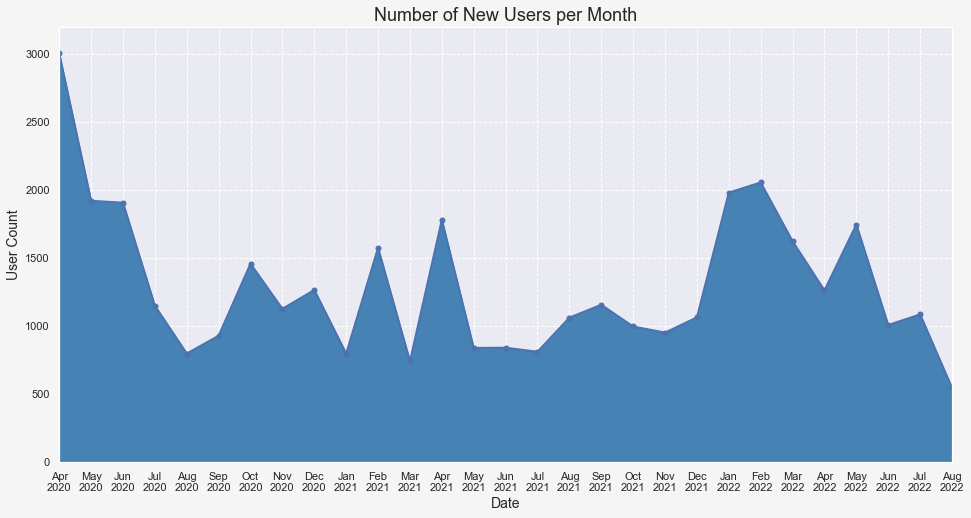

In [50]:
# New accounts by month
xlabels = get_ts_xlabels(index=acct_monthly_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(acct_monthly_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of New Users per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(acct_monthly_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('User Count', fontsize=14)
ax.set_xlim(0,len(acct_monthly_ts_data)-1)
ax.set_ylim(0,3200)
ax.fill_between(np.arange(len(acct_monthly_ts_data)), 0, acct_monthly_ts_data['account_id'], color='steelblue')

In [51]:
# Save figure
name = FIGURE_PATH + 'account_monthly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

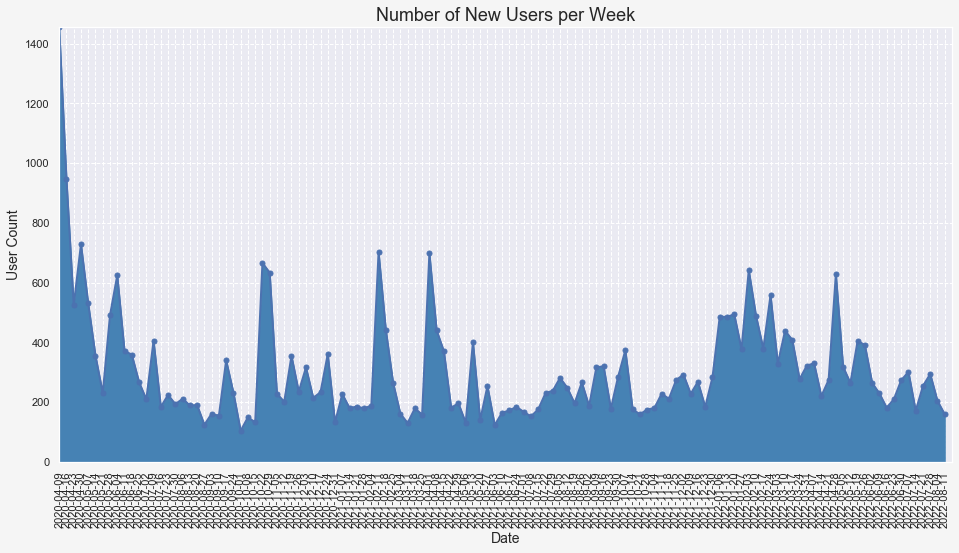

In [52]:
# New accounts by week
xlabels = get_ts_xlabels(index=acct_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(acct_weekly_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of New Users per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(acct_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('User Count', fontsize=14)
ax.set_xlim(0,len(acct_weekly_ts_data)-0)
ax.set_ylim(0,max(acct_weekly_ts_data.values))
ax.fill_between(np.arange(len(acct_weekly_ts_data)), 0, acct_weekly_ts_data['account_id'], color='steelblue')

In [53]:
# Save figure
name = FIGURE_PATH + 'account_weekly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

### Account Source

In [54]:
# Account source data
account_source = pd.concat([account['account_source_id'].value_counts(0), 
                            account['account_source_id'].value_counts(1)], axis=1)
account_source.columns = ['user_count', 'user_pct']
account_source = account_source.rename(index={'PENN_SSO':'UPHS_KEY','PENN_KEY_SSO':'PENN_KEY'})
account_source['user_pct'] = account_source['user_pct'].round(3)

In [55]:
# save chart
name = CHART_PATH + 'account_source_summary_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
account_source.to_csv(name)

In [56]:
account_source.head()
print(account_source.iloc[:].sum())
print(account_source.iloc[1:].sum())

user_count    37442.000
user_pct          0.999
dtype: float64
user_count    9494.000
user_pct         0.253
dtype: float64


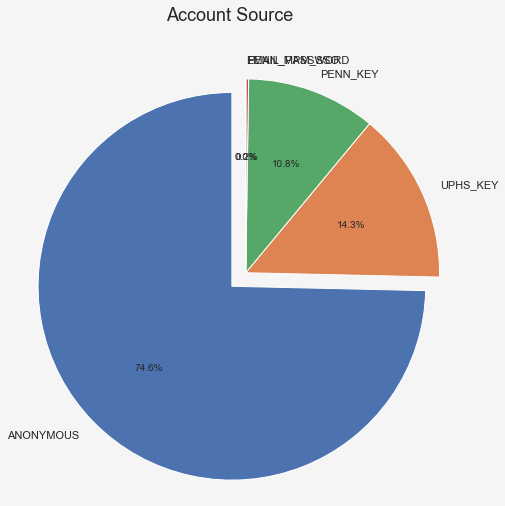

In [57]:
# Pie chart
labels = account_source.index
pie_data = account_source.user_count
explode = [0.1,0,0,0,0]

fig, ax = plt.subplots(figsize=(8,8), facecolor='whitesmoke')
ax.pie(pie_data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.suptitle('Account Source', fontsize=18)

plt.show()

In [58]:
# Save figure
name = FIGURE_PATH + 'account_source_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

In [59]:
print(len(acct_src_ts_data))
acct_src_ts_data.head(2)

29


account_source_id  ANONYMOUS  EMAIL_PASSWORD  PENN_KEY_SSO  PENN_MPM_SSO  \
year month                                                                 
2020 4                1670.0             0.0           5.0           0.0   
     5                1345.0             0.0          67.0           0.0   

account_source_id  PENN_SSO  
year month                   
2020 4               1330.0  
     5                508.0

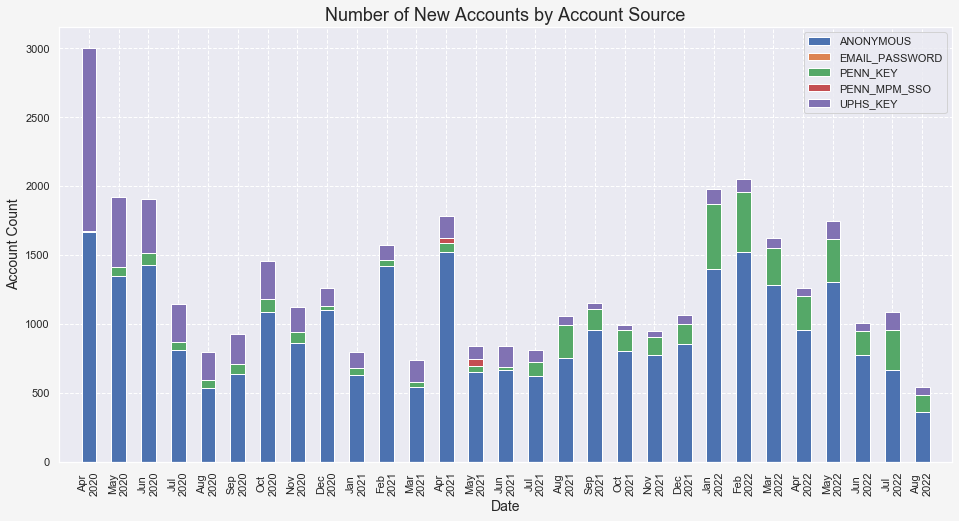

In [60]:
acct_src_ts_data = acct_src_ts_data.rename(columns={'PENN_SSO':'UPHS_KEY','PENN_KEY_SSO':'PENN_KEY'})
xlabels = get_ts_xlabels(index=acct_src_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
acct_src_ts_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Number of New Accounts by Account Source', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(acct_src_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Account Count', fontsize=14)
ax.set_xlim(-1,len(acct_src_ts_data))
#ax.set_ylim(0,APT_WEEKLY_YMAX)
ax.legend(acct_src_ts_data.columns)

save_figure(fig,FIGURE_PATH,'account_source_monthly_')

## Providers

In [61]:
# Display data
print(len(provider))
print(len(provider.columns))
provider.head(2)

241
34


provider_id institution_id  \
0  521da634-185e-4c1d-b587-cf23e8dfbe69           PENN   
1  688e0886-b776-4b95-89e6-2329a123ccfc           PENN   

                                                name  \
0                               Ayyappan Venkatraman   
1  University of Pennsylvania Employee Assistance...   

                                       title  \
0                        Psychiatry Resident   
1  EAP Intake Counselor from Health Advocate   

                      email_address  \
0  OPCCobalt@pennmedicine.upenn.edu   
1    EAP-Connect@healthadvocate.com   

                                           image_url locale         time_zone  \
0  https://penncobalt.s3.us-east-2.amazonaws.com/...  en-US  America/New_York   
1  https://penncobalt.s3.us-east-2.amazonaws.com/...  en-US  America/New_York   

   acuity_calendar_id  bluejeans_user_id      tags  \
0           3831985.0            3874544  [Year 4]   
1           4248614.0            3874544      None   

                           created                     last_updated  \
0 2020-04-12 14:54:35.680223+00:00 2022-04-20 14:42:43.066088+00:00   
1 2020-07-30 18:05:32.597044+00:00 2022-05-02 16:57:06.508559+00:00   

                                       entity  \
0  Hospital of the University of Pennsylvania   
1                                        None   

                               clinic license specialty intake_assessment_id  \
0  Outpatient Psychiatry Center (OPC)      MD      None                 None   
1                     Health Advocate    None      None                 None   

   active scheduling_system_id epic_provider_id epic_provider_id_type  \
0   False               ACUITY             None                  None   
1    True               ACUITY             None                  None   

  videoconference_platform_id videoconference_url epic_appointment_filter_id  \
0                   BLUEJEANS                None                       NONE   
1                   TELEPHONE          8667992329                       NONE   

  system_affinity_id   bio bio_url  year  month  day year_month  \
0             COBALT  None    None  2020      4   12 2020-04-01   
1             COBALT  None    None  2020      7   30 2020-07-01   

  year_month_week dayofyear  
0      2020-04-09  20200412  
1      2020-07-30  20200730

### Provider Temporal Trends

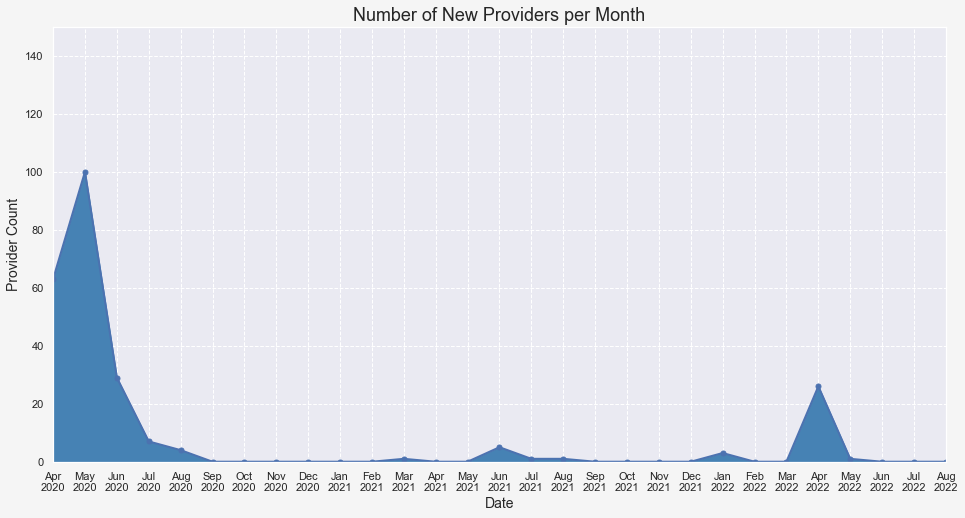

In [62]:
xlabels = get_ts_xlabels(index=prov_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(prov_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of New Providers per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(prov_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Provider Count', fontsize=14)
ax.set_xlim(0,len(prov_ts_data)-1)
ax.set_ylim(0,150)
ax.fill_between(np.arange(len(prov_ts_data)), 0, prov_ts_data['provider_id'], color='steelblue')

In [63]:
# Save figure
name = FIGURE_PATH + 'provider_monthly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

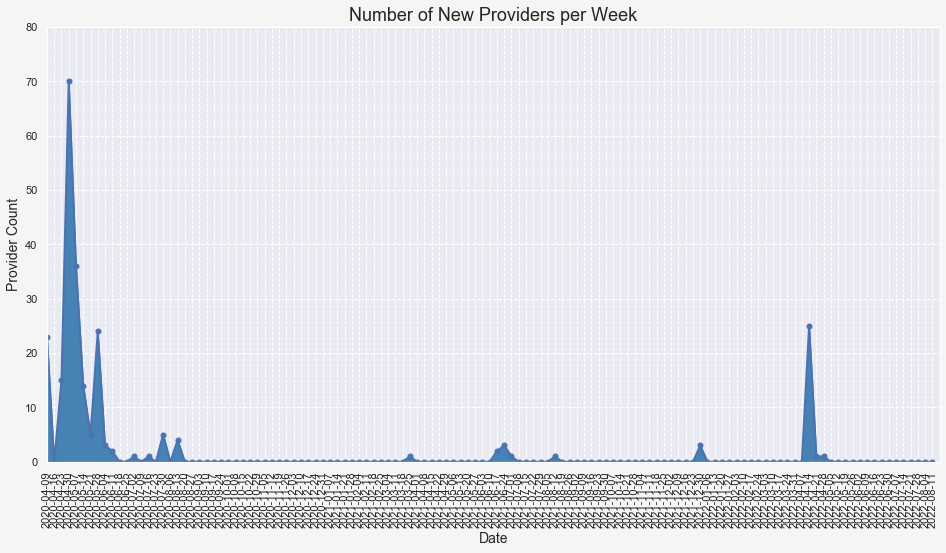

In [64]:
xlabels = get_ts_xlabels(index=prov_weekly_ts_data.index, time='weekly')

# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(prov_weekly_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of New Providers per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(prov_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Provider Count', fontsize=14)
ax.set_xlim(0,len(prov_weekly_ts_data)-0)
ax.set_ylim(0,80)
ax.fill_between(np.arange(len(prov_weekly_ts_data)), 0, prov_weekly_ts_data['provider_id'], color='steelblue')

In [65]:
# Save figure
name = FIGURE_PATH + 'provider_weekly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

### Provider Roles

In [66]:
print(len(provider_support_role))
print(len(provider_support_role.columns))
provider_support_role.head()

247
2


provider_id support_role_id
0  38e2bbb1-7930-40b3-ab7c-dc87eadf6444    PSYCHIATRIST
1  8f3f7c98-ce1c-42b3-9840-1b49ff83a4ce            PEER
2  8f3f7c98-ce1c-42b3-9840-1b49ff83a4ce    PSYCHIATRIST
3  a3e66e45-1c8a-485c-9e6c-76a1f46cbb2b       CLINICIAN
4  521da634-185e-4c1d-b587-cf23e8dfbe69    PSYCHIATRIST

In [67]:
provider_role = pd.concat([provider_support_role['support_role_id'].value_counts(0),
                           provider_support_role['support_role_id'].value_counts(1)], axis=1)
provider_role.columns = ['provider_count', 'provider_pct']

In [68]:
name = CHART_PATH + 'provider_role_summary_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
provider_role.to_csv(name)

In [69]:
print(len(provider_role))
provider_role.head(10)

7


provider_count  provider_pct
CLINICIAN                 86        0.3482
PSYCHIATRIST              64        0.2591
COACH                     51        0.2065
PEER                      34        0.1377
CARE_MANAGER               6        0.0243
OTHER                      4        0.0162
CHAPLAIN                   2        0.0081

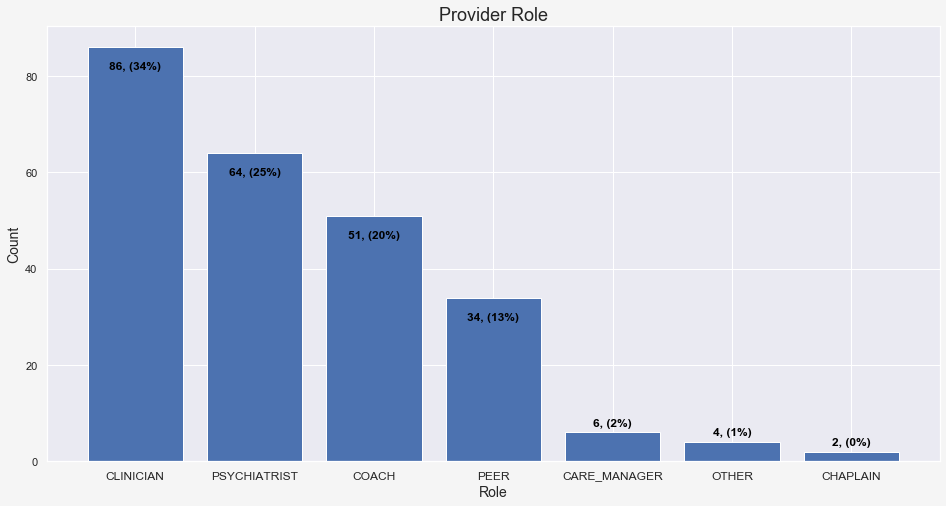

In [70]:
# Bar chart
bar_width = 0.4
xlabels = provider_role.index
index = np.arange(len(provider_role))
bar_data = provider_role.provider_count
percent_data = provider_role.provider_pct


fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
ax.bar(x=bar_data.index, height=bar_data)
ax.set_title('Provider Role', fontsize=18)
ax.set_xlabel('Role', fontsize=14)
ax.set_xticklabels(xlabels, fontsize=12, ha='center')
ax.set_ylabel('Count', fontsize=14)

for bar in ax.patches:
    text = str(int(bar.get_height())) + ', (' + str(int((bar.get_height()/bar_data.sum())*100)) + '%)'
    if bar.get_height() > 10:
        height = bar.get_height()-3
    else:
        height = bar.get_height()+3
    ax.text(bar.get_x()+bar.get_width()/2, height, text, rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')

In [71]:
# Save figure
name = FIGURE_PATH + 'provider_role_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

In [72]:
# Provider scheduling systems
pd.concat([provider['scheduling_system_id'].value_counts(0), provider['scheduling_system_id'].value_counts(1)], axis=1)

scheduling_system_id  scheduling_system_id
ACUITY                   190                0.7884
COBALT                    30                0.1245
EPIC                      21                0.0871

## Appointments

In [73]:
# Display data
print(len(appointment))
print(len(appointment.columns))
appointment.head(2)

3825
48


appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
0  8e52c173-f3d4-4b9d-913c-32a5679e2387  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9             8.0982e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
0                         NaN              NaN            1.0305e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
0  https://bluejeans.com/166022552/0525                 1:1 with Care Manager   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
0 2022-04-22 11:00:00-04:00 2022-04-22 11:30:00                   30   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
0  America/New_York     False         NaT 2022-04-20 11:32:48.204541-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
0 2022-04-20 15:32:48.204541+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
0  aef3538a-73fa-40cf-8d3f-367022913b9c         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
0                           0525  20290377-2978-4472-b00c-6f604f25ee58   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
0               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  created_year  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None          2022   
0  08048f29-035c-4341-82fd-b41406303114                    None          2022   

   created_month  created_day created_year_month created_year_month_week  \
0              6           22         2022-06-01              2022-06-16   
0              4           20         2022-04-01              2022-04-14   

  created_dayofyear  apt_year  apt_month  apt_day apt_year_month  \
0          20220622      2022          7        6     2022-07-01   
0          20220420      2022          4       22     2022-04-01   

  apt_year_month_week apt_dayofyear  created_completed_time  \
0          2022-06-30      20220706                    14.0   
0          2022-04-21      20220422                     2.0   

                  appointment_type_name support_role_id  
0  1:1 Appointment with Psychotherapist       CLINICIAN  
0                 1:1 with Care Manager    CARE_MANAGER

### Available Appointments

#### Future Availability

In [74]:
available_future = pd.DataFrame(provider_availability_future.groupby(['provider_id']).count()['provider_availability_id'])
print(f'Number of providers with future appointments available: {len(available_future)} ({(len(available_future)/len(provider)*100):.2f}% of total)')
print(f'Number of future appointments available: {available_future.sum().values[0]}')
print(f'Mean number of future available appointments per provider: {available_future.mean().values[0]:.2f}')
print(f'Median number of future available appointments per provider: {available_future.median().values[0]:.2f}')

Number of providers with future appointments available: 14 (5.81% of total)
Number of future appointments available: 553
Mean number of future available appointments per provider: 39.50
Median number of future available appointments per provider: 25.50


In [75]:
availabile_role_future = pd.concat([provider_availability_future.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    provider_availability_future.groupby(['support_role_id']).agg({'provider_availability_id':'nunique'}),
                                    provider_availability_future_90day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    provider_availability_future_90day.groupby(['support_role_id']).agg({'provider_availability_id':'nunique'}),
                                    provider_availability_future_30day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    provider_availability_future_30day.groupby(['support_role_id']).agg({'provider_availability_id':'nunique'})],
           axis=1)
availabile_role_future.columns = ['providers_future_all', 'appts_future_all', 'providers_future_90day', 
                                  'appts_future_90day', 'providers_future_30day', 'appts_future_30day']
availabile_role_future = availabile_role_future.fillna(0)
availabile_role_future.to_csv(CHART_PATH + 'availabile_role_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

availabile_role_future

providers_future_all  appts_future_all  \
support_role_id                                           
CARE_MANAGER                        6               194   
CHAPLAIN                            1               140   
CLINICIAN                           1                39   
COACH                               5                76   
OTHER                               1               104   

                 providers_future_90day  appts_future_90day  \
support_role_id                                               
CARE_MANAGER                          6                 194   
CHAPLAIN                              1                 140   
CLINICIAN                             1                  39   
COACH                                 5                  76   
OTHER                                 1                 104   

                 providers_future_30day  appts_future_30day  
support_role_id                                              
CARE_MANAGER                          6                 120  
CHAPLAIN                              1                  90  
CLINICIAN                             1                  21  
COACH                                 5                  51  
OTHER                                 1                  64

In [76]:
available_provider_future_all = provider_availability_future.groupby(['support_role_id','provider_id']).agg({'provider_availability_id':'nunique'})
available_provider_future_90day = provider_availability_future_90day.groupby(['support_role_id','provider_id']).agg({'provider_availability_id':'nunique'})
available_provider_future_30day = provider_availability_future_30day.groupby(['support_role_id','provider_id']).agg({'provider_availability_id':'nunique'})

available_provider_future = available_provider_future_all.merge(available_provider_future_90day, how='outer', left_index=True, right_index=True)
available_provider_future = available_provider_future.merge(available_provider_future_30day, how='outer', left_index=True, right_index=True)
available_provider_future = available_provider_future.fillna(0)
available_provider_future.columns = ['appts_future_all','appts_future_90day','appts_future_30day']
available_provider_future.to_csv(CHART_PATH + 'available_provider_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

available_provider_future

appts_future_all  \
support_role_id provider_id                                              
CARE_MANAGER    2f2c9927-b0f1-40dc-b94d-a34ffea07f2d                18   
                5920b16c-b123-4280-afa3-82ec582235ed                25   
                5fc46a43-58d1-46fc-bae9-44c65e58388b                 5   
                688e0886-b776-4b95-89e6-2329a123ccfc                95   
                9eb160cb-9db6-4a79-a3c1-83ac6a403db9                27   
                ffb76abc-3cfe-4482-9b01-4e496823d193                24   
CHAPLAIN        d78e6c6b-2932-40af-b50c-5a356a7abe96               140   
CLINICIAN       c236acc5-9473-457a-af51-de57bddcb8a3                39   
COACH           2a4c1df9-af13-4fce-b4fa-e55a7729addb                10   
                3d781e2d-3726-480a-9070-bbe2bd4851ef                27   
                9629851e-7644-48fb-bc83-90162e543e96                 6   
                a8b8eb8a-6335-49fa-b46c-2b0483abcde2                 7   
                fa7d89ad-a40f-480c-8b09-d11877a3477a                26   
OTHER           3f240a79-498c-4009-b40f-23fc4cba0c2d               104   

                                                      appts_future_90day  \
support_role_id provider_id                                                
CARE_MANAGER    2f2c9927-b0f1-40dc-b94d-a34ffea07f2d                  18   
                5920b16c-b123-4280-afa3-82ec582235ed                  25   
                5fc46a43-58d1-46fc-bae9-44c65e58388b                   5   
                688e0886-b776-4b95-89e6-2329a123ccfc                  95   
                9eb160cb-9db6-4a79-a3c1-83ac6a403db9                  27   
                ffb76abc-3cfe-4482-9b01-4e496823d193                  24   
CHAPLAIN        d78e6c6b-2932-40af-b50c-5a356a7abe96                 140   
CLINICIAN       c236acc5-9473-457a-af51-de57bddcb8a3                  39   
COACH           2a4c1df9-af13-4fce-b4fa-e55a7729addb                  10   
                3d781e2d-3726-480a-9070-bbe2bd4851ef                  27   
                9629851e-7644-48fb-bc83-90162e543e96                   6   
                a8b8eb8a-6335-49fa-b46c-2b0483abcde2                   7   
                fa7d89ad-a40f-480c-8b09-d11877a3477a                  26   
OTHER           3f240a79-498c-4009-b40f-23fc4cba0c2d                 104   

                                                      appts_future_30day  
support_role_id provider_id                                               
CARE_MANAGER    2f2c9927-b0f1-40dc-b94d-a34ffea07f2d                  12  
                5920b16c-b123-4280-afa3-82ec582235ed                  16  
                5fc46a43-58d1-46fc-bae9-44c65e58388b                   5  
                688e0886-b776-4b95-89e6-2329a123ccfc                  59  
                9eb160cb-9db6-4a79-a3c1-83ac6a403db9                  16  
                ffb76abc-3cfe-4482-9b01-4e496823d193                  12  
CHAPLAIN        d78e6c6b-2932-40af-b50c-5a356a7abe96                  90  
CLINICIAN       c236acc5-9473-457a-af51-de57bddcb8a3                  21  
COACH           2a4c1df9-af13-4fce-b4fa-e55a7729addb                   6  
                3d781e2d-3726-480a-9070-bbe2bd4851ef                  16  
                9629851e-7644-48fb-bc83-90162e543e96                   6  
                a8b8eb8a-6335-49fa-b46c-2b0483abcde2                   7  
                fa7d89ad-a40f-480c-8b09-d11877a3477a                  16  
OTHER           3f240a79-498c-4009-b40f-23fc4cba0c2d                  64

In [77]:
available_type_future_all = pd.DataFrame(provider_availability_future['appointment_type_name'].value_counts())
available_type_future_90day = pd.DataFrame(provider_availability_future_90day['appointment_type_name'].value_counts())
available_type_future_30day = pd.DataFrame(provider_availability_future_30day['appointment_type_name'].value_counts())

available_type_future = available_type_future_all.merge(available_type_future_90day, how='outer', left_index=True, right_index=True)
available_type_future = available_type_future.merge(available_type_future_30day, how='outer', left_index=True, right_index=True)
available_type_future = available_type_future.fillna(0)
available_type_future.columns = ['appts_future_all','appts_future_90day','appts_future_30day']
available_type_future.index.name = 'appointment_type_name'
available_type_future.to_csv(CHART_PATH + 'available_type_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

available_type_future

appts_future_all  appts_future_90day  \
appointment_type_name                                                        
1:1 with Care Manager                              194                 194   
The Chaplain is In - for You                       140                 140   
1:1 Strength and Training Specialist               104                 104   
1:1 Session with Resilience Coach                   76                  76   
1:1 Appointment with Psychotherapist                39                  39   

                                      appts_future_30day  
appointment_type_name                                     
1:1 with Care Manager                                120  
The Chaplain is In - for You                          90  
1:1 Strength and Training Specialist                  64  
1:1 Session with Resilience Coach                     51  
1:1 Appointment with Psychotherapist                  21

### Booked Appointments

#### Future Bookings

In [78]:
booked_future = pd.DataFrame(appointment_future.groupby(['provider_id']).count()['appointment_id'])
print(f'Number of providers with future appointments booked: {len(booked_future)} ({(len(booked_future)/len(provider)*100):.2f}% of total)')
print(f'Number of future appointments booked: {booked_future.sum().values[0]}')
print(f'Mean number of future booked appointments per provider: {booked_future.mean().values[0]:.2f}')
print(f'Median number of future booked appointments per provider: {booked_future.median().values[0]:.2f}')

Number of providers with future appointments booked: 6 (2.49% of total)
Number of future appointments booked: 16
Mean number of future booked appointments per provider: 2.67
Median number of future booked appointments per provider: 3.00


In [79]:
appointment_role_future = pd.concat([appointment_future.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_future.groupby(['support_role_id']).agg({'appointment_id':'nunique'}),
                                    appointment_future_90day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_future_90day.groupby(['support_role_id']).agg({'appointment_id':'nunique'}),
                                    appointment_future_30day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_future_30day.groupby(['support_role_id']).agg({'appointment_id':'nunique'})],
           axis=1)
appointment_role_future.columns = ['providers_future_all', 'appts_future_all', 'providers_future_90day', 
                                  'appts_future_90day', 'providers_future_30day', 'appts_future_30day']
appointment_role_future.to_csv(CHART_PATH + 'appointment_role_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_role_future

providers_future_all  appts_future_all  \
support_role_id                                           
CARE_MANAGER                        5                12   
CLINICIAN                           1                 4   

                 providers_future_90day  appts_future_90day  \
support_role_id                                               
CARE_MANAGER                          5                  12   
CLINICIAN                             1                   4   

                 providers_future_30day  appts_future_30day  
support_role_id                                              
CARE_MANAGER                          5                  11  
CLINICIAN                             1                   4

In [80]:
appointment_provider_future_all = appointment_future.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})
appointment_provider_future_90day = appointment_future_90day.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})
appointment_provider_future_30day = appointment_future_30day.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})

appointment_provider_future = appointment_provider_future_all.merge(appointment_provider_future_90day, how='outer', left_index=True, right_index=True)
appointment_provider_future = appointment_provider_future.merge(appointment_provider_future_30day, how='outer', left_index=True, right_index=True)
appointment_provider_future = appointment_provider_future.fillna(0)
appointment_provider_future.columns = ['appts_future_all','appts_future_90day','appts_future_30day']
appointment_provider_future.to_csv(CHART_PATH + 'appointment_provider_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_provider_future

appts_future_all  \
support_role_id provider_id                                              
CARE_MANAGER    5920b16c-b123-4280-afa3-82ec582235ed                 3   
                5fc46a43-58d1-46fc-bae9-44c65e58388b                 3   
                688e0886-b776-4b95-89e6-2329a123ccfc                 3   
                9eb160cb-9db6-4a79-a3c1-83ac6a403db9                 1   
                ffb76abc-3cfe-4482-9b01-4e496823d193                 2   
CLINICIAN       c236acc5-9473-457a-af51-de57bddcb8a3                 4   

                                                      appts_future_90day  \
support_role_id provider_id                                                
CARE_MANAGER    5920b16c-b123-4280-afa3-82ec582235ed                   3   
                5fc46a43-58d1-46fc-bae9-44c65e58388b                   3   
                688e0886-b776-4b95-89e6-2329a123ccfc                   3   
                9eb160cb-9db6-4a79-a3c1-83ac6a403db9                   1   
                ffb76abc-3cfe-4482-9b01-4e496823d193                   2   
CLINICIAN       c236acc5-9473-457a-af51-de57bddcb8a3                   4   

                                                      appts_future_30day  
support_role_id provider_id                                               
CARE_MANAGER    5920b16c-b123-4280-afa3-82ec582235ed                   2  
                5fc46a43-58d1-46fc-bae9-44c65e58388b                   3  
                688e0886-b776-4b95-89e6-2329a123ccfc                   3  
                9eb160cb-9db6-4a79-a3c1-83ac6a403db9                   1  
                ffb76abc-3cfe-4482-9b01-4e496823d193                   2  
CLINICIAN       c236acc5-9473-457a-af51-de57bddcb8a3                   4

In [81]:
appointment_type_future_all = pd.DataFrame(appointment_future['appointment_type_name'].value_counts())
appointment_type_future_90day = pd.DataFrame(appointment_future_90day['appointment_type_name'].value_counts())
appointment_type_future_30day = pd.DataFrame(appointment_future_30day['appointment_type_name'].value_counts())

appointment_type_future = appointment_type_future_all.merge(appointment_type_future_90day, how='outer', left_index=True, right_index=True)
appointment_type_future = appointment_type_future.merge(appointment_type_future_30day, how='outer', left_index=True, right_index=True)
appointment_type_future = appointment_type_future.fillna(0)
appointment_type_future.columns = ['appts_future_all','appts_future_90day','appts_future_30day']
appointment_type_future.index.name = 'appointment_type_name'
appointment_type_future.to_csv(CHART_PATH + 'appointment_type_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_type_future

appts_future_all  appts_future_90day  \
appointment_type_name                                                        
1:1 with Care Manager                               12                  12   
1:1 Appointment with Psychotherapist                 4                   4   

                                      appts_future_30day  
appointment_type_name                                     
1:1 with Care Manager                                 11  
1:1 Appointment with Psychotherapist                   4

#### Past Bookings

In [82]:
booked_past = pd.DataFrame(appointment_past.groupby(['provider_id']).count()['appointment_id'])
print(f'Number of providers with past appointments booked: {len(booked_past)} ({(len(booked_past)/len(provider)*100):.2f}% of total)')
print(f'Number of past appointments booked: {booked_past.sum().values[0]}')
print(f'Mean number of past booked appointments per provider: {booked_past.mean().values[0]:.2f}')
print(f'Median number of past booked appointments per provider: {booked_past.median().values[0]:.2f}')

Number of providers with past appointments booked: 133 (55.19% of total)
Number of past appointments booked: 3809
Mean number of past booked appointments per provider: 28.64
Median number of past booked appointments per provider: 7.00


In [83]:
appointment_role_past = pd.concat([appointment_past.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_past.groupby(['support_role_id']).agg({'appointment_id':'nunique'}),
                                    appointment_past_90day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_past_90day.groupby(['support_role_id']).agg({'appointment_id':'nunique'}),
                                    appointment_past_30day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_past_30day.groupby(['support_role_id']).agg({'appointment_id':'nunique'})],
           axis=1)
appointment_role_past.columns = ['providers_past_all', 'appts_past_all', 'providers_past_90day', 
                                  'appts_past_90day', 'providers_past_30day', 'appts_past_30day']
appointment_role_past.to_csv(CHART_PATH + 'appointment_role_past_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_role_past
print(len(appointment_past.appointment_id.unique()))
print(len(appointment_past.account_id.unique()))

3809
2439


In [84]:
appointment_provider_past_all = appointment_past.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})
appointment_provider_past_90day = appointment_past_90day.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})
appointment_provider_past_30day = appointment_past_30day.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})

appointment_provider_past = appointment_provider_past_all.merge(appointment_provider_past_90day, how='outer', left_index=True, right_index=True)
appointment_provider_past = appointment_provider_past.merge(appointment_provider_past_30day, how='outer', left_index=True, right_index=True)
appointment_provider_past = appointment_provider_past.fillna(0)
appointment_provider_past.columns = ['appts_past_all','appts_past_90day','appts_past_30day']
appointment_provider_past.to_csv(CHART_PATH + 'appointment_provider_past_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_provider_past

appts_past_all  \
support_role_id provider_id                                            
CARE_MANAGER    2f2c9927-b0f1-40dc-b94d-a34ffea07f2d              51   
                5920b16c-b123-4280-afa3-82ec582235ed             134   
                5fc46a43-58d1-46fc-bae9-44c65e58388b             118   
                688e0886-b776-4b95-89e6-2329a123ccfc             778   
                9eb160cb-9db6-4a79-a3c1-83ac6a403db9              36   
                ffb76abc-3cfe-4482-9b01-4e496823d193              68   
CHAPLAIN        2255031c-5e82-413a-bc86-989b669a79af              11   
                d78e6c6b-2932-40af-b50c-5a356a7abe96              20   
CLINICIAN       004622a2-efc0-48f7-9986-e6bf91bc4ea6               5   
                00e1f7e0-cb78-420c-aac8-9c841081c542               3   
                0566172c-6777-4a5a-9a42-df990105856d               2   
                0ff9e768-6c00-4cf9-98e1-2f62d708b8c0               4   
                10ec8e30-8b43-4c8a-99cd-b201f0f3c28e               7   
                112c2381-3758-4e37-ae31-d3b09056dff8               5   
                13213a19-5c8c-4112-a29a-b13441ca8064              22   
                18e446ec-7271-4bd6-871a-b1c24291cc8e               6   
                1a6c1b83-ec0a-4631-84fe-b1f6252fc583               2   
                1c6bddc4-ce3d-4e61-ae53-1764621f0378               6   
                1d16ccf0-771e-4523-be55-3e198d081e05               1   
                2dbcc4bf-8579-48cd-9df4-76ce2f3f3808               3   
                39d99057-5bff-471f-b615-510934a0a7d4               4   
                3cd67143-6ebe-4645-924d-972982b1c88a               1   
                3d87af96-3000-4ffb-9dc9-de02c80e302b               4   
                40d9e4cd-7038-4505-8601-0eddffdc946a               1   
                41f94bfc-acbc-4eaf-856f-2f71b8e9b2a9              58   
                4256b49e-1829-413f-b905-f769312bdb93              43   
                46a04a43-a3b4-4c83-ad24-0c984e9ff69f              12   
                4a1f76a1-b9be-4e3c-9a6d-4658971081d6               3   
                4fc4a9cd-f540-4d28-aa34-fe2788273dc3              22   
                508d6c25-3c8f-4618-a6d5-979165279b28               1   
                52d9872f-545a-45af-b7a7-2e85c5f666e4             211   
                5a4b1dba-68cf-4304-8bfa-56003a293ceb               1   
                67d89b78-9ab9-441b-8c9e-638283084fa1               2   
                6943ca36-2b20-47f9-834d-440581217207              61   
                69479187-94ae-4fef-98f7-cf198111bc9c               3   
                780448ac-96e2-4190-a14d-63376a11eefd              20   
                789b363c-124a-4438-833e-9c196d35e3b9               7   
                88c44ffb-a54a-4740-9022-9440435fbe42               4   
                8ac08a6d-7585-4cd3-b951-9fa439071470              36   
                8fe52ee6-9331-4ca5-850e-a1a4afbb4258              12   
                92411954-1f61-4765-8fb9-df622828bdd6              33   
                9a9ff2c6-b71d-42c4-8624-b3a7957a5d57              50   
                a0000511-ad21-4266-9af3-6e17d4d1f8f4               7   
                a025b6bf-4277-4316-a195-7d1e48907c27              19   
                a3e66e45-1c8a-485c-9e6c-76a1f46cbb2b               3   
                a6d27bea-f834-4214-9aa2-782feb165887              38   
                aa7843a9-6c61-4dfe-b1d8-8e4fdb07662b               2   
                ad541065-dfac-478a-8224-2309ef896495              29   
                ae540851-f9f0-458e-a8eb-c10477a7fb58              11   
                bd7385cc-bdc7-4d24-b9ef-1a5973c98b48               4   
                c236acc5-9473-457a-af51-de57bddcb8a3             489   
                c4dbf734-f2fb-49b5-92fb-09d46897a359              18   
                c6efb615-14b2-43f2-8b1e-d94313822ffc               1   
                cbbb66f2-acae-48b7-8a91-a7000aea3efa               7   
                ce67e0

In [85]:
appointment_type_past_all = pd.DataFrame(appointment_past['appointment_type_name'].value_counts())
appointment_type_past_90day = pd.DataFrame(appointment_past_90day['appointment_type_name'].value_counts())
appointment_type_past_30day = pd.DataFrame(appointment_past_30day['appointment_type_name'].value_counts())

appointment_type_past = appointment_type_past_all.merge(appointment_type_past_90day, how='outer', left_index=True, right_index=True)
appointment_type_past = appointment_type_past.merge(appointment_type_past_30day, how='outer', left_index=True, right_index=True)
appointment_type_past = appointment_type_past.fillna(0)
appointment_type_past.columns = ['appts_past_all','appts_past_90day','appts_past_30day']
appointment_type_past.index.name = 'appointment_type_name'
appointment_type_past.to_csv(CHART_PATH + 'appointment_type_past_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_type_past

appts_past_all  \
appointment_type_name                                          
1:1 Appointment with Psychotherapist                    1127   
1:1 CTSA Intake Appointment                                4   
1:1 Initial Appointment with Psychotherapist               7   
1:1 Psychiatrist Follow-ups                               19   
1:1 Session with Chaplain                                 11   
1:1 Session with Psychiatrist                             82   
1:1 Session with Resilience Coach                        795   
1:1 Strength and Training Specialist                      20   
1:1 with Care Manager                                   1303   
1:1 with Dietitian                                         1   
1:1 with Pain Specialist                                   1   
1:1 with Peer                                             23   
1:1 with Psychiatric Nurse Practitioner                   15   
CCT Intake Appointment                                     1   
Coaching Visit                                             3   
Followup Visit                                           162   
Initial Visit                                            215   
The Chaplain is In - for You                              20   

                                              appts_past_90day  \
appointment_type_name                                            
1:1 Appointment with Psychotherapist                      51.0   
1:1 CTSA Intake Appointment                                0.0   
1:1 Initial Appointment with Psychotherapist               0.0   
1:1 Psychiatrist Follow-ups                                0.0   
1:1 Session with Chaplain                                  0.0   
1:1 Session with Psychiatrist                              0.0   
1:1 Session with Resilience Coach                         47.0   
1:1 Strength and Training Specialist                       1.0   
1:1 with Care Manager                                    162.0   
1:1 with Dietitian                                         0.0   
1:1 with Pain Specialist                                   0.0   
1:1 with Peer                                              0.0   
1:1 with Psychiatric Nurse Practitioner                    0.0   
CCT Intake Appointment                                     0.0   
Coaching Visit                                             3.0   
Followup Visit                                             0.0   
Initial Visit                                              2.0   
The Chaplain is In - for You                               0.0   

                                              appts_past_30day  
appointment_type_name                                           
1:1 Appointment with Psychotherapist                      23.0  
1:1 CTSA Intake Appointment                                0.0  
1:1 Initial Appointment with Psychotherapist               0.0  
1:1 Psychiatrist Follow-ups                                0.0  
1:1 Session with Chaplain                                  0.0  
1:1 Session with Psychiatrist                              0.0  
1:1 Session with Resilience Coach                         14.0  
1:1 Strength and Training Specialist                       0.0  
1:1 with Care Manager                                     57.0  
1:1 with Dietitian                                         0.0  
1:1 with Pain Specialist                                   0.0  
1:1 with Peer                                              0.0  
1:1 with Psychiatric Nurse Practitioner                    0.0  
CCT Intake Appointment                                     0.0  
Coaching Visit                                             3.0  
Followup Visit                                             0.0  
Initial Visit                                              0.0  
The Chaplain is In - for You                               0.0

### Appointment Types by Provider Role

In [86]:
# Appointment types by role
for role in provider_support_role.support_role_id.unique():
    prov_ids = provider_support_role[provider_support_role['support_role_id']==role].provider_id
    print(color.BOLD + role + color.END)
    print(color.BOLD + 'All Time' + color.END)
    print(appointment[appointment['provider_id'].isin(prov_ids)].appointment_type_name.value_counts())
    print(color.BOLD + 'Last 90 Days:' + color.END)
    print(appointment[(appointment['provider_id'].isin(prov_ids)) & 
                      (appointment['created'] > pd.to_datetime(datetime.datetime.now() - pd.Timedelta(days=90)).tz_localize(tz='US/Eastern'))].appointment_type_name.value_counts())
    print()

PSYCHIATRIST
All Time
Initial Visit                              199
Followup Visit                             116
1:1 Session with Psychiatrist               82
1:1 Psychiatrist Follow-ups                 19
1:1 with Peer                               18
1:1 with Psychiatric Nurse Practitioner     15
Name: appointment_type_name, dtype: int64
Last 90 Days:
Series([], Name: appointment_type_name, dtype: int64)

PEER
All Time
1:1 with Peer    11
Name: appointment_type_name, dtype: int64
Last 90 Days:
Series([], Name: appointment_type_name, dtype: int64)

CLINICIAN
All Time
1:1 Appointment with Psychotherapist            1131
1:1 with Care Manager                            534
Followup Visit                                    46
Initial Visit                                     16
1:1 Initial Appointment with Psychotherapist       7
1:1 CTSA Intake Appointment                        4
CCT Intake Appointment                             1
Name: appointment_type_name, dtype: int64
Last 90 

### Appointment Temporal Trends 

#### Booked, Completed, and Canceled Appointments

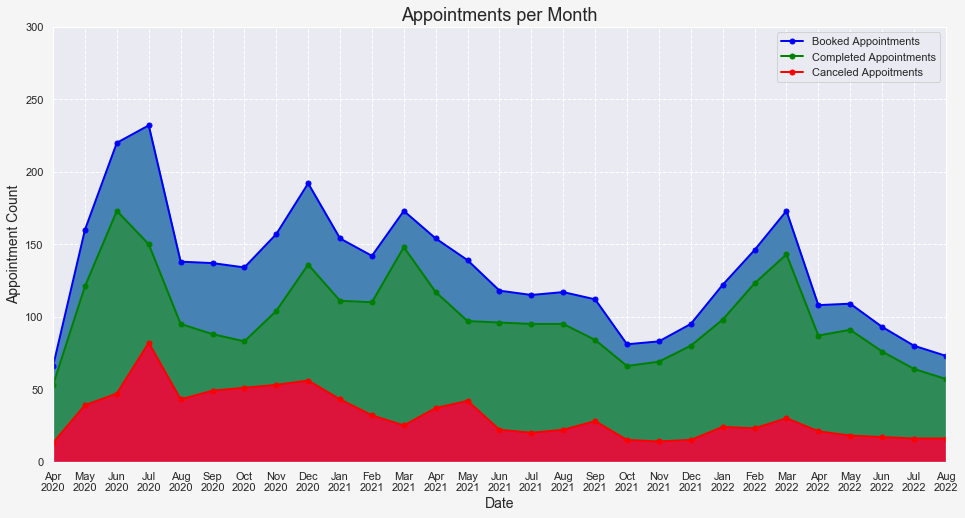

In [87]:
# Combined appointments over time: monthly
xlabels = get_ts_xlabels(index=apt_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')

ax.plot(apt_ts_data.values, linewidth=2, marker='.', markersize=10, color='blue')
ax.plot(apt_completed_ts_data.values, linewidth=2, marker='.', markersize=10, color='green')
ax.plot(apt_canceled_ts_data.values, linewidth=2, marker='.', markersize=10, color='red')

ax.set_title('Appointments per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(apt_ts_data)-2)
ax.set_ylim(0,APT_MONTHLY_YMAX)

ax.fill_between(np.arange(len(apt_ts_data)), 0, apt_ts_data['appointment_id'], color='steelblue')
ax.fill_between(np.arange(len(apt_completed_ts_data)), 0, apt_completed_ts_data['appointment_id'], color='seagreen')
ax.fill_between(np.arange(len(apt_canceled_ts_data)), 0, apt_canceled_ts_data['appointment_id'], color='crimson')

ax.legend(['Booked Appointments', 'Completed Appointments', 'Canceled Appoitments'])

In [88]:
# Save figure
name = FIGURE_PATH + 'appointment_monthly_combined_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

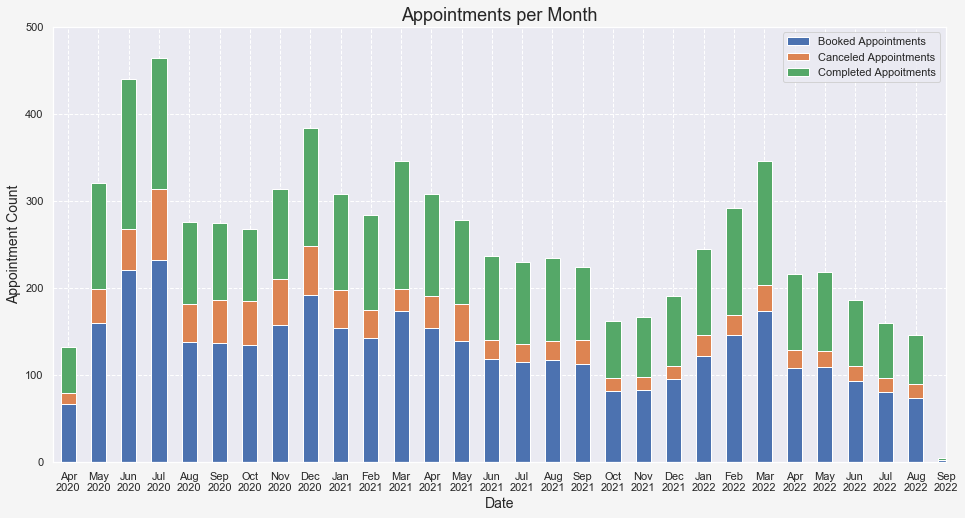

In [89]:
# Combined appointments over time: monthly
apt_combined_ts_data = pd.concat([apt_ts_data,apt_canceled_ts_data,apt_completed_ts_data], axis=1)
xlabels = get_ts_xlabels(index=apt_combined_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
apt_combined_ts_data.plot(ax=ax, kind='bar', stacked=True)

ax.set_title('Appointments per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(-0.5,len(apt_ts_data)-1)
ax.set_ylim(0,500)

ax.legend(['Booked Appointments', 'Canceled Appointments', 'Completed Appoitments'])

In [90]:
# Save figure
name = FIGURE_PATH + 'appointment_monthly_stacked_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

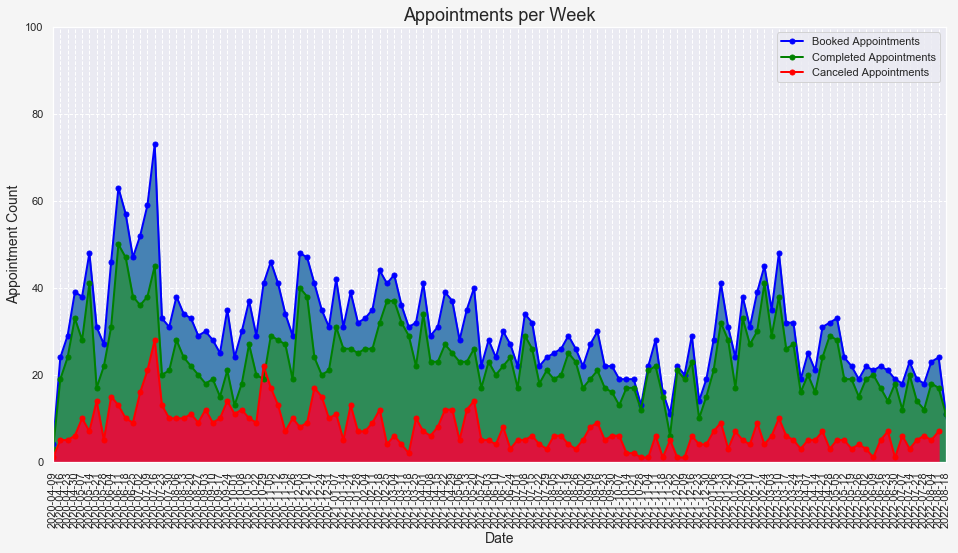

In [91]:
# Combined appointments over time: weekly
xlabels = get_ts_xlabels(index=apt_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')

ax.plot(apt_weekly_ts_data.values, linewidth=2, marker='.', markersize=10, color='blue')
ax.plot(apt_weekly_completed_ts_data.values, linewidth=2, marker='.', markersize=10, color='green')
ax.plot(apt_weekly_canceled_ts_data.values, linewidth=2, marker='.', markersize=10, color='red')

ax.set_title('Appointments per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(apt_weekly_ts_data)-4)
ax.set_ylim(0,APT_WEEKLY_YMAX)

ax.fill_between(np.arange(len(apt_weekly_ts_data)), 0, apt_weekly_ts_data['appointment_id'], color='steelblue')
ax.fill_between(np.arange(len(apt_weekly_completed_ts_data)), 0, apt_weekly_completed_ts_data['appointment_id'], color='seagreen')
ax.fill_between(np.arange(len(apt_weekly_canceled_ts_data)), 0, apt_weekly_canceled_ts_data['appointment_id'], color='crimson')

ax.legend(['Booked Appointments', 'Completed Appointments', 'Canceled Appointments'])

In [92]:
# Save figure
name = FIGURE_PATH + 'appointment_weekly_combined_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

#### Booked Appointments by Provider Role

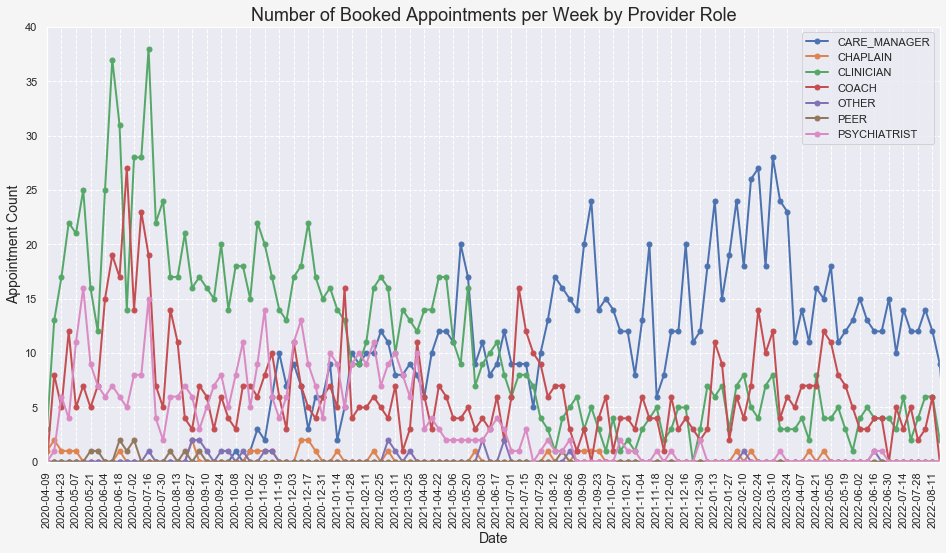

In [93]:
# Plot
xlabels = get_ts_xlabels(index=aptRole_weekly_ts_data.index, time='weekly')
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(aptRole_weekly_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of Booked Appointments per Week by Provider Role', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(0,len(aptRole_weekly_ts_data),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(aptRole_weekly_ts_data)-4)
ax.set_ylim(0,40)

ax.legend(aptRole_weekly_ts_data.columns)

In [94]:
save_figure(fig,FIGURE_PATH,'appointment_provRole_weekly_line_')

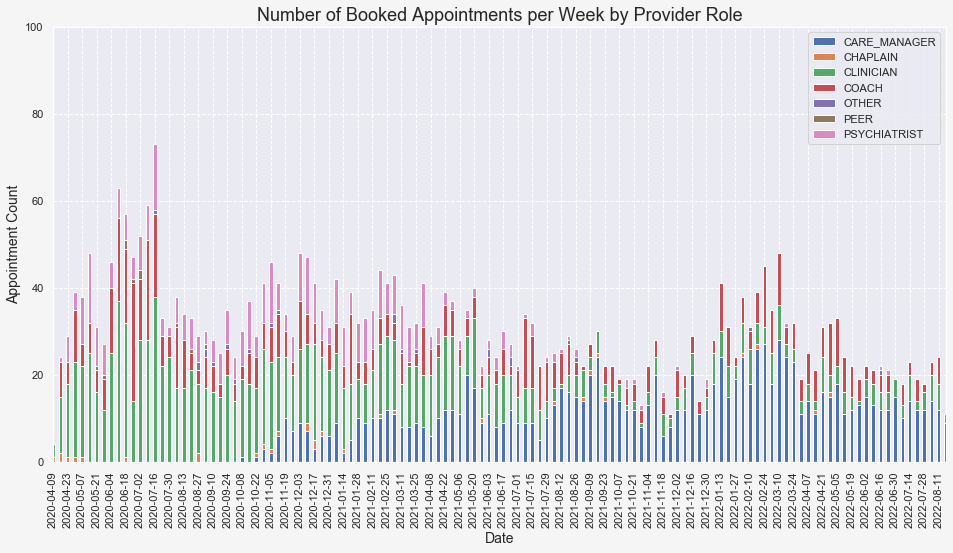

In [95]:
# Plot
xlabels = get_ts_xlabels(index=aptRole_weekly_ts_data.index, time='weekly')
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
aptRole_weekly_ts_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Number of Booked Appointments per Week by Provider Role', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(0,len(aptRole_weekly_ts_data),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(aptRole_weekly_ts_data)-4)
ax.set_ylim(0,APT_WEEKLY_YMAX)

ax.legend(aptRole_weekly_ts_data.columns)

In [96]:
save_figure(fig,FIGURE_PATH,'appointment_provRole_weekly_stacked_')

#### Booked Appointments by Provider Role - Cobalt RCT

In [97]:
# Filter for rct start date - will need to add end date upon completion 
appointment_rct = appointment[appointment['start_time'] >= pd.to_datetime(datetime.datetime(2022,1,31)).tz_localize(tz='US/Eastern')]

# Aggregate for weekly ts
aptRole_weekly_ts_rct = pd.DataFrame(appointment_rct.groupby(['apt_year_month_week', 'support_role_id']).count()).appointment_id
aptRole_weekly_ts_rct = aptRole_weekly_ts_rct.unstack().fillna(0)
aptRole_weekly_ts_rct.index = pd.MultiIndex.from_arrays([aptRole_weekly_ts_rct.index.year, 
                                                      aptRole_weekly_ts_rct.index.month, 
                                                      aptRole_weekly_ts_rct.index.day], 
                                                      names=['Year','Month','Week'])

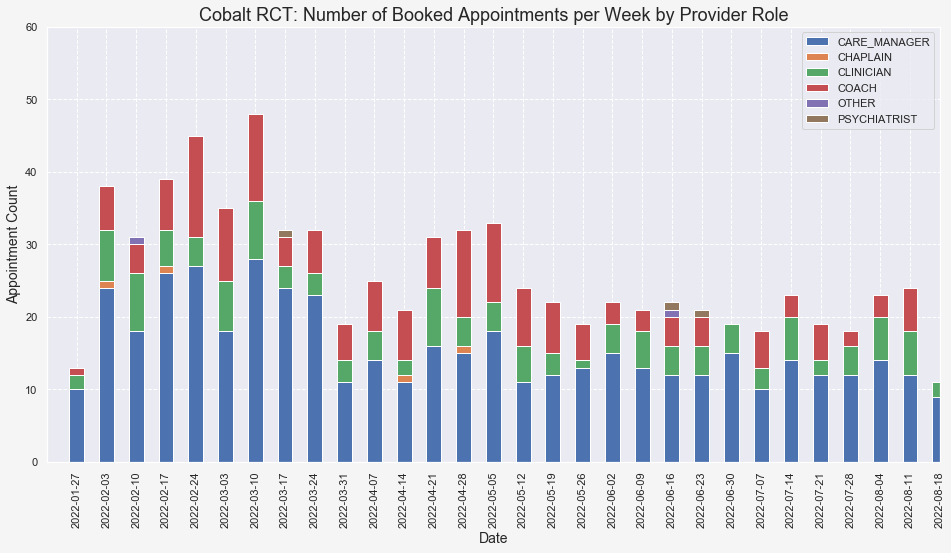

In [98]:
# Plot
xlabels = get_ts_xlabels(index=aptRole_weekly_ts_rct.index, time='weekly')
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
aptRole_weekly_ts_rct.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Cobalt RCT: Number of Booked Appointments per Week by Provider Role', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(aptRole_weekly_ts_rct)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(-1,len(aptRole_weekly_ts_rct)-4)
ax.set_ylim(0,APT_WEEKLY_YMAX-40)

ax.legend(aptRole_weekly_ts_rct.columns)

In [99]:
save_figure(fig,FIGURE_PATH,'rctAppt_provRole_weekly_stacked_')

#### Booked Appointments by Provider Role - Summary Table

In [100]:
# Can create this chart for last 30 days or weekly (will be messy as weekly but possible); also save to charts folder
apt_role_summary = pd.concat([aptRole_weekly_ts_data.sum(),aptRole_weekly_ts_data.mean(),
                              aptRole_weekly_ts_data.median(),aptRole_weekly_ts_data.std()], axis=1)
apt_role_summary.columns = ['apt_total','apt_mean_week','apt_median_week', 'apt_stddev_week']
apt_role_summary.to_csv(CHART_PATH + 'aptRole_weekly_summary_allTime_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

apt_role_summary

apt_total  apt_mean_week  apt_median_week  apt_stddev_week
support_role_id                                                            
CARE_MANAGER        1197.0         9.4252             10.0           7.2095
CHAPLAIN              31.0         0.2441              0.0           0.4995
CLINICIAN           1323.0        10.4173              8.0           7.9686
COACH                798.0         6.2835              5.0           4.6117
OTHER                 22.0         0.1732              0.0           0.4730
PEER                  11.0         0.0866              0.0           0.3339
PSYCHIATRIST         443.0         3.4882              2.0           4.0057

### Appointment Histograms

#### Appointments per Account

In [101]:
# Histogram data
data = appointment.groupby(['account_id']).count()['appointment_id'].value_counts().sort_index()
apt_by_acct = pd.DataFrame(list(zip(data.index.values, data.values)), columns=['num_apts', 'num_accts'])
apt_by_acct.head()

num_apts  num_accts
0         1       1891
1         2        301
2         3        104
3         4         54
4         5         31

In [102]:
# Save chart
name = CHART_PATH + 'appointment_account_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
apt_by_acct.to_csv(name)

Text(0, 0.5, 'User Count')

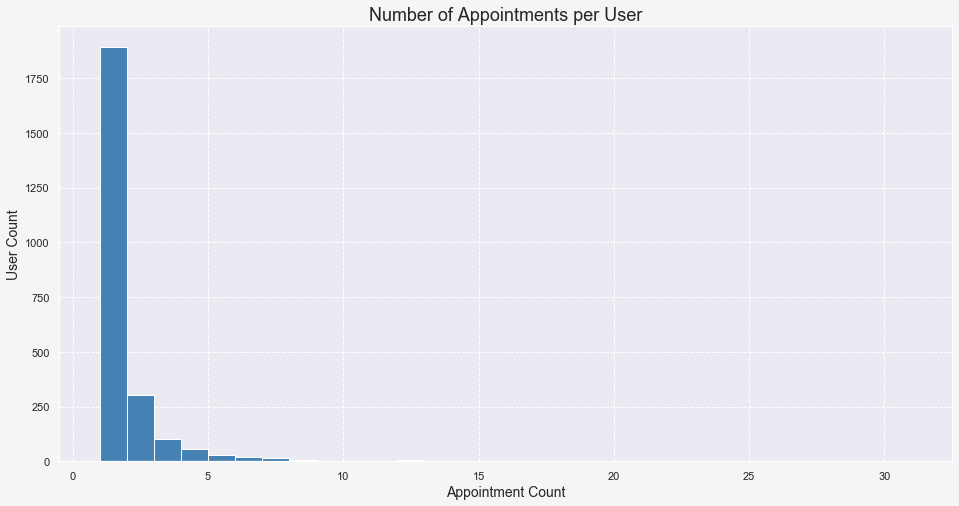

In [103]:
# Plot histogram
data = appointment.groupby(['account_id']).count()['appointment_id']
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.hist(data, bins=30, color='steelblue')
ax.set_title('Number of Appointments per User', fontsize=18)
ax.set_xlabel('Appointment Count', fontsize=14)
ax.set_ylabel('User Count', fontsize=14)

In [104]:
# Save figure
name = FIGURE_PATH + 'appointment_account_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

#### Followup Appointments per Account

In [105]:
# Histogram data
apt_followup = appointment.groupby(['account_id']).filter(lambda x: len(x)>1)
apt_followup = apt_followup.groupby(['account_id']).count()['appointment_id']
apt_followup = pd.concat([apt_followup.value_counts(0), apt_followup.value_counts(1)], axis=1)
apt_followup.columns = ['user_count', 'user_pct']

apt_followup_blank = pd.DataFrame(index=np.arange(0, max(apt_followup.index)+1))
apt_followup = apt_followup_blank.merge(apt_followup, how='outer', left_index=True, right_index=True).fillna(0)
apt_followup.head()

user_count  user_pct
0         0.0    0.0000
1         0.0    0.0000
2       301.0    0.5404
3       104.0    0.1867
4        54.0    0.0969

In [106]:
# Save chart
name = CHART_PATH + 'appointment_account_followup_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
apt_by_acct.to_csv(name)

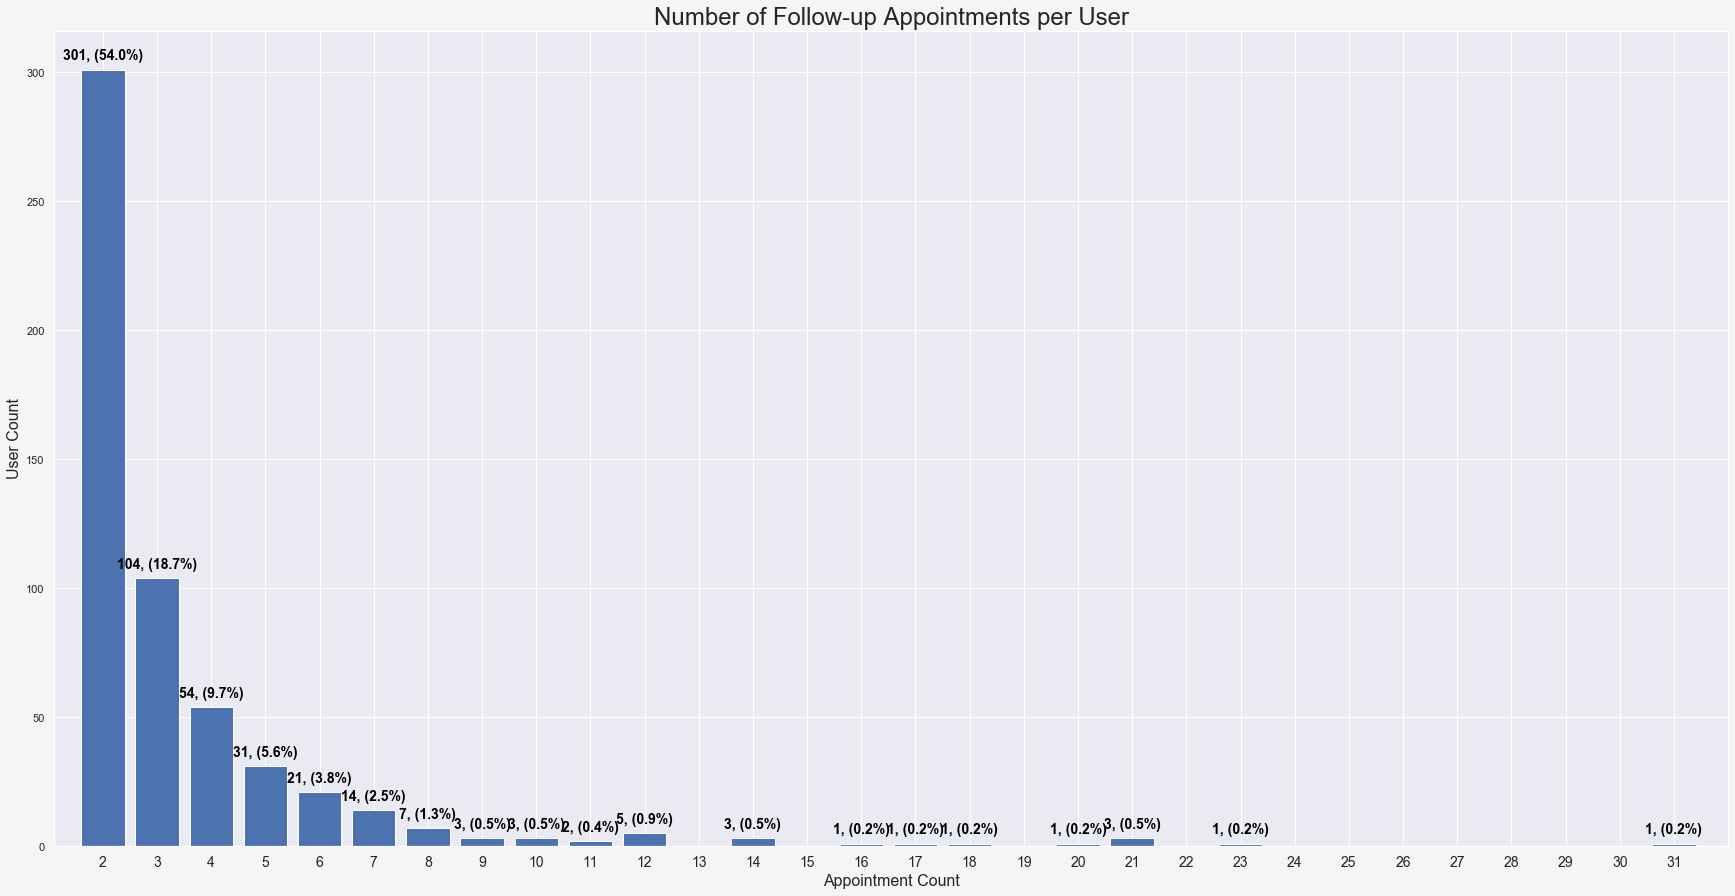

In [107]:
# Plot bar chart (histogram)
bar_width = 0.4
text_height = 8
xlabels = apt_followup.index
index = np.arange(len(apt_followup))
bar_data = apt_followup.user_count
percent_data = apt_followup.user_pct


fig, ax = plt.subplots(figsize=(30,15), facecolor='whitesmoke')
ax.bar(x=index, height=bar_data)
ax.set_title('Number of Follow-up Appointments per User', fontsize=24)
ax.set_xlabel('Appointment Count', fontsize=16)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, fontsize=14, ha='center')
ax.set_xlim(1.1,len(apt_followup))
ax.set_ylabel('User Count', fontsize=16)
#ax.set_yticklabels(np.arange(0,300,50) ,fontsize=14, ha='right')

for bar in ax.patches:
    text = str(int(bar.get_height())) + ', (' + str("{:.1f}".format(float((bar.get_height()/bar_data.sum())*100))) + '%)'
    height = bar.get_height()+text_height
    if height > text_height:
        ax.text(bar.get_x()+bar.get_width()/2, height, text, rotation=0, va='top', ha='center', color='black', fontsize=14, fontweight='bold')

In [108]:
# NOTE 12/06/2021: Recreate broken down by provider role

In [109]:
# Save figure
name = FIGURE_PATH + 'appointment_account_followup_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

#### Appointments per Provider

In [110]:
# Histogram data
data = appointment.groupby(['provider_id']).count()['appointment_id'].value_counts().sort_index()
apt_by_prov = pd.DataFrame(list(zip(data.index.values, data.values)), columns=['num_apts', 'num_providers'])
apt_by_prov.head()

num_apts  num_providers
0         1             21
1         2             11
2         3             11
3         4              9
4         5              6

In [111]:
# Save chart
name = CHART_PATH + 'appointment_provider_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
apt_by_prov.to_csv(name)

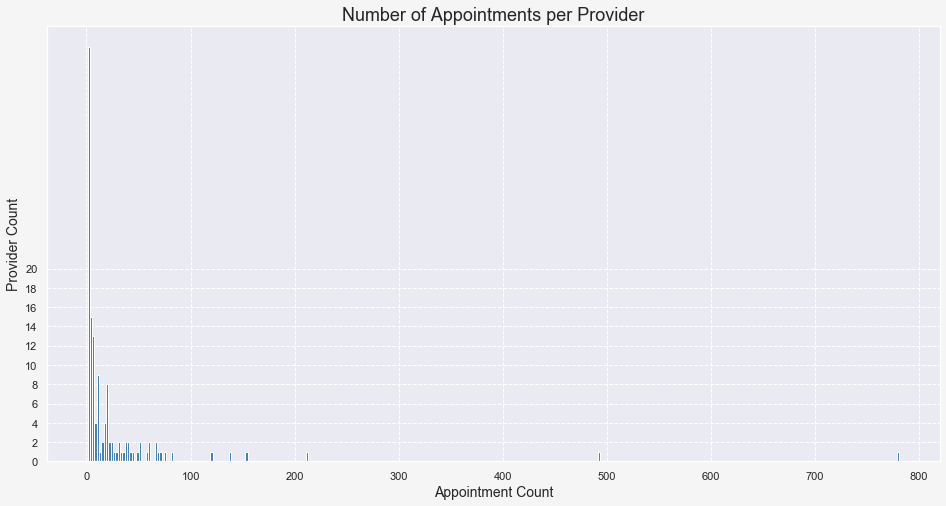

In [112]:
data = appointment.groupby(['provider_id']).count()['appointment_id']
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.hist(data, bins=350, color='steelblue')
ax.set_title('Number of Appointments per Provider', fontsize=18)
ax.set_xlabel('Appointment Count', fontsize=14)
ax.set_ylabel('Provider Count', fontsize=14)
ax.set_yticks(np.arange(0,22,2))

In [113]:
# Save figure
name = FIGURE_PATH + 'appointment_provider_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

### Active providers by appointment
* Active providers are those with >= 25 appointments for all time
* Can consider a metric for recent active providers

In [114]:
prov_active_ids = appointment.groupby(['provider_id']).filter(lambda x: len(x)>=25)['provider_id'].unique()
prov_active_data = provider[provider['provider_id'].isin(prov_active_ids)]

In [115]:
# Save chart
name = CHART_PATH + 'provider_active_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
prov_active_data.to_csv(name)

In [116]:
print('Number of active providers:', len(prov_active_data))
prov_active_data.head(2)

Number of active providers: 31


provider_id institution_id  \
1   688e0886-b776-4b95-89e6-2329a123ccfc           PENN   
24  a6d27bea-f834-4214-9aa2-782feb165887           PENN   

                                                 name  \
1   University of Pennsylvania Employee Assistance...   
24                                Catherine Stieglitz   

                                        title  \
1   EAP Intake Counselor from Health Advocate   
24                            Psychotherapist   

                                 email_address  \
1               EAP-Connect@healthadvocate.com   
24  catherine.stieglitz@pennmedicine.upenn.edu   

                                            image_url locale  \
1   https://penncobalt.s3.us-east-2.amazonaws.com/...  en-US   
24  https://penncobalt.s3.us-east-2.amazonaws.com/...  en-US   

           time_zone  acuity_calendar_id  bluejeans_user_id  tags  \
1   America/New_York           4248614.0            3874544  None   
24  America/New_York           3833681.0            3874544    []   

                            created                     last_updated entity  \
1  2020-07-30 18:05:32.597044+00:00 2022-05-02 16:57:06.508559+00:00   None   
24 2020-04-12 19:26:35.458963+00:00 2022-05-02 16:57:06.508559+00:00   None   

             clinic license specialty intake_assessment_id  active  \
1   Health Advocate    None      None                 None    True   
24             None    LCSW      None                 None    True   

   scheduling_system_id epic_provider_id epic_provider_id_type  \
1                ACUITY             None                  None   
24               ACUITY             None                  None   

   videoconference_platform_id videoconference_url epic_appointment_filter_id  \
1                    TELEPHONE          8667992329                       NONE   
24                   BLUEJEANS                None                       NONE   

   system_affinity_id   bio bio_url  year  month  day year_month  \
1              COBALT  None    None  2020      7   30 2020-07-01   
24             COBALT  None    None  2020      4   12 2020-04-01   

   year_month_week dayofyear  
1       2020-07-30  20200730  
24      2020-04-09  20200412

## Availability: Appointments and Providers

In [117]:
print('Number of completed appointments:',len(appointment[appointment['canceled']==False]))
print('Number of available appointments:',len(provider_availability))

Number of completed appointments: 2912
Number of available appointments: 1492


In [118]:
# Display data
print(len(provider_availability))
print(len(provider_availability.columns))
provider_availability.head(2)

1492
22


provider_availability_id                           provider_id  \
0  886ecd56-4527-4fc7-ae27-91d2b5875d6b  00e1f7e0-cb78-420c-aac8-9c841081c542   
1  3d8209cd-7c3e-4a68-85d4-43daecc63ffb  00e1f7e0-cb78-420c-aac8-9c841081c542   

                  date_time                          created  \
0 2020-10-08 08:00:00-04:00 2021-10-04 15:28:37.192211-04:00   
1 2020-10-15 08:00:00-04:00 2021-10-04 15:28:37.787609-04:00   

                      last_updated                   appointment_type_id  \
0 2021-10-04 19:28:37.192211+00:00  bc57f5ef-12ec-4298-9438-01791b0b3f00   
1 2021-10-04 19:28:37.787609+00:00  bc57f5ef-12ec-4298-9438-01791b0b3f00   

                     epic_department_id logical_availability_id  created_year  \
0  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None          2021   
1  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None          2021   

   created_month  created_day created_year_month created_year_month_week  \
0             10            4         2021-10-01              2021-09-30   
1             10            4         2021-10-01              2021-09-30   

  created_dayofyear  apt_year  apt_month  apt_day apt_year_month  \
0          20211004      2020         10        8     2020-10-01   
1          20211004      2020         10       15     2020-10-01   

  apt_year_month_week apt_dayofyear appointment_type_name support_role_id  
0          2020-10-08      20201008         Initial Visit       CLINICIAN  
1          2020-10-15      20201015         Initial Visit       CLINICIAN

### Availability Temporal Trends

#### Available vs Completed Appointments - Supply vs "Demand"

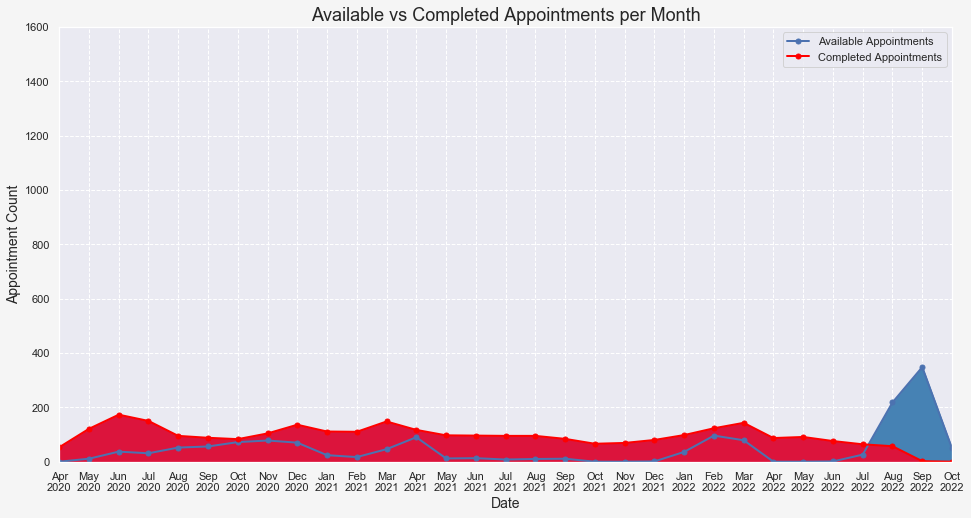

In [119]:
# Appointment supply and demand over time: monthly
apt_supply_demand = apt_avail_ts_data.merge(apt_completed_ts_data, how='outer', left_index=True, right_index=True)
apt_supply_demand = apt_supply_demand.fillna(0)
apt_supply_demand.columns = ['Available Appointments', 'Completed Appointments']

xlabels = get_ts_xlabels(index=apt_supply_demand.index, time='monthly')

# Plot data
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(apt_supply_demand['Available Appointments'].values, linewidth=2, marker='.', markersize=10)
ax.plot(apt_supply_demand['Completed Appointments'].values, linewidth=2, marker='.', markersize=10, color='red')
ax.set_title('Available vs Completed Appointments per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_supply_demand)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(apt_supply_demand)-1)
ax.set_ylim(0,1600)
ax.legend(['Available Appointments', 'Completed Appointments'])

# Fill between: between lines, between x-axis and lines
ax.fill_between(np.arange(len(apt_supply_demand)), 0, apt_supply_demand['Available Appointments'],
                interpolate=True, color='steelblue')
ax.fill_between(np.arange(len(apt_supply_demand)), 0, apt_supply_demand['Completed Appointments'],
                interpolate=True, color='crimson')

In [120]:
# Save figure
name = FIGURE_PATH + 'availability_appointment_monthly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

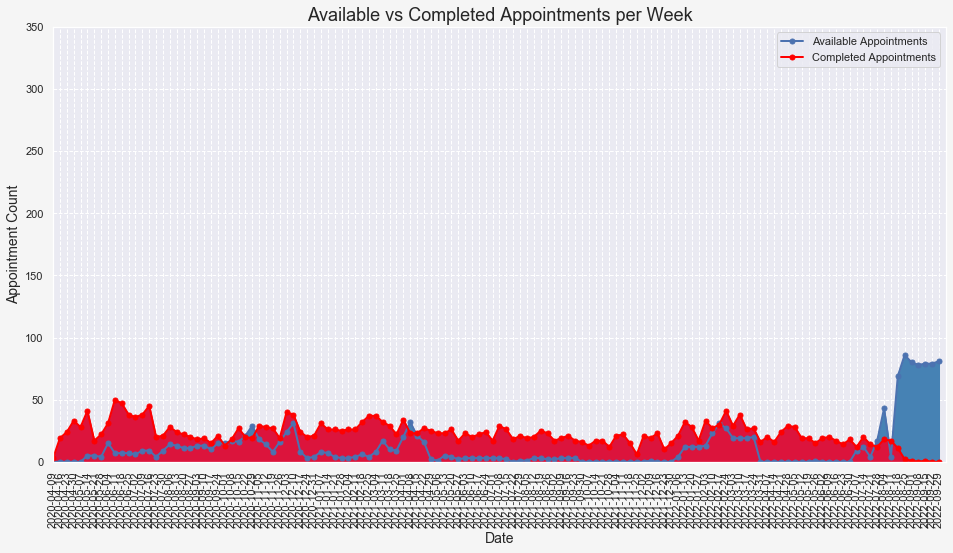

In [121]:
# Appointment supply and demand over time: weekly
apt_weekly_supply_demand = apt_avail_weekly_ts_data.merge(apt_weekly_completed_ts_data, how='outer', left_index=True, right_index=True)
apt_weekly_supply_demand = apt_weekly_supply_demand.fillna(0)
apt_weekly_supply_demand.columns = ['Available Appointments', 'Completed Appointments']

xlabels = get_ts_xlabels(index=apt_weekly_supply_demand.index, time='weekly')

# Plot data
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(apt_weekly_supply_demand['Available Appointments'].values, linewidth=2, marker='.', markersize=10)
ax.plot(apt_weekly_supply_demand['Completed Appointments'].values, linewidth=2, marker='.', markersize=10, color='red')
ax.set_title('Available vs Completed Appointments per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_weekly_supply_demand)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(apt_weekly_supply_demand)-0)
ax.set_ylim(0,350)
ax.legend(['Available Appointments', 'Completed Appointments'])

# Fill between: between lines, between x-axis and lines (WILL NEED TO SWITCH WHEN HISTORIC AVAILABILITY DATA IS READY)
ax.fill_between(np.arange(len(apt_weekly_supply_demand)), 0, apt_weekly_supply_demand['Available Appointments'],
                interpolate=True, color='steelblue')
ax.fill_between(np.arange(len(apt_weekly_supply_demand)), 0, apt_weekly_supply_demand['Completed Appointments'],
                interpolate=True, color='crimson')

In [122]:
# Save figure
name = FIGURE_PATH + 'availability_appointment_weekly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

### Availability by Day of Week and Hour of Day
* Remake for last 3,6,9 months

#### Booked Appointments

In [123]:
appointment_times = appointment[['appointment_id', 'provider_id', 'start_time', 'created', 'support_role_id']].copy()
appointment_times['dayofweek'] = appointment_times['start_time'].dt.dayofweek
appointment_times['hourofday'] = appointment_times['start_time'].dt.hour

In [124]:
print(len(appointment_times))
print(len(appointment_times.columns))
appointment_times.head(2)

3825
7


appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
0  8e52c173-f3d4-4b9d-913c-32a5679e2387  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                 start_time                          created support_role_id  \
0 2022-07-06 16:00:00-04:00 2022-06-22 16:25:35.721374-04:00       CLINICIAN   
0 2022-04-22 11:00:00-04:00 2022-04-20 11:32:48.204541-04:00    CARE_MANAGER   

   dayofweek  hourofday  
0          2         16  
0          4         11

##### Day of Week

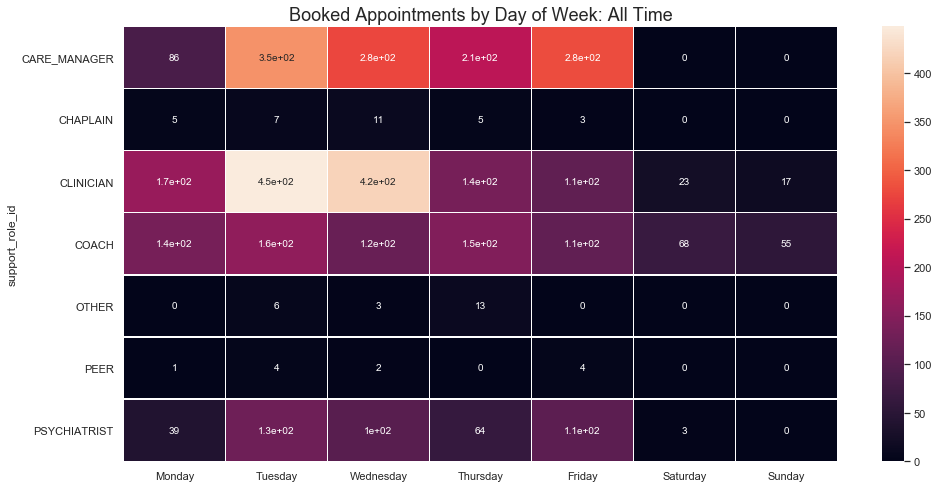

In [125]:
# Booked appointments by day of week
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='dayofweek', date_col='start_time', 
                        id_col='appointment_id', date_offset=0, save_fig=True, save_path=FIGURE_PATH)

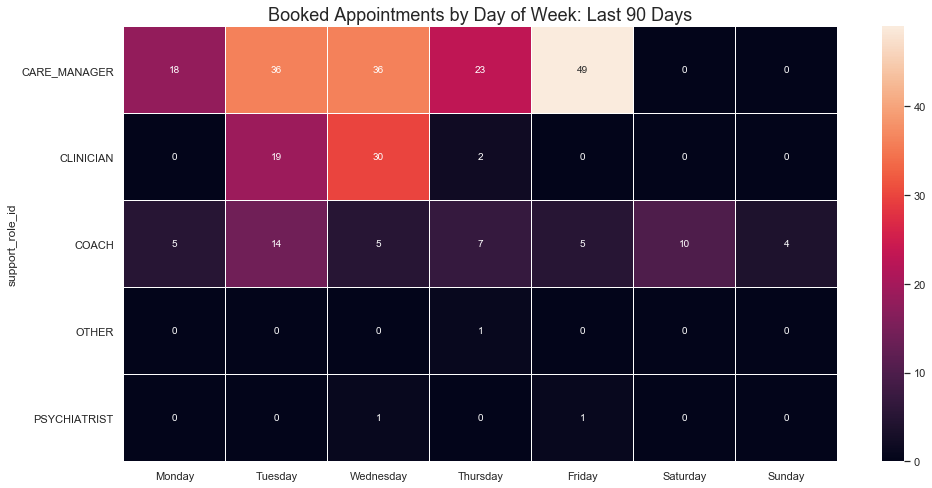

In [126]:
# Booked appointments by day of week
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='dayofweek', date_col='start_time', 
                        id_col='appointment_id', date_offset=-90, save_fig=True, save_path=FIGURE_PATH)

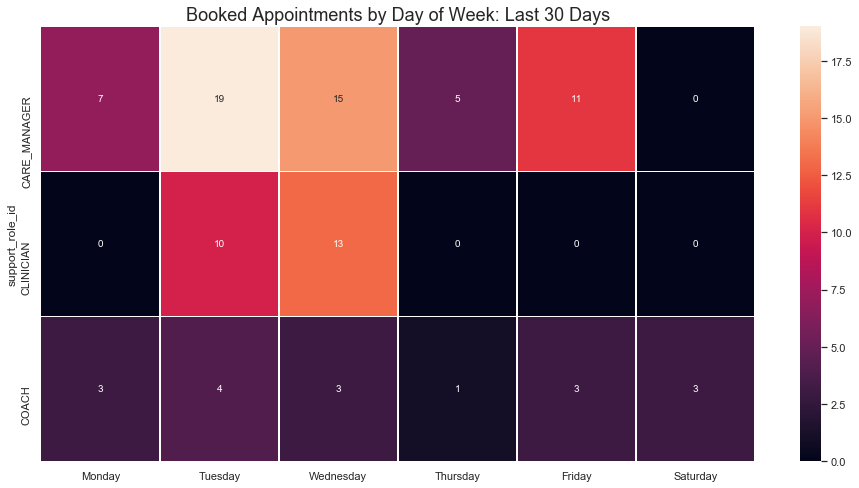

In [127]:
# Booked appointments by day of week
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='dayofweek', date_col='start_time', 
                        id_col='appointment_id', date_offset=-30, save_fig=True, save_path=FIGURE_PATH)

##### Hour of Day

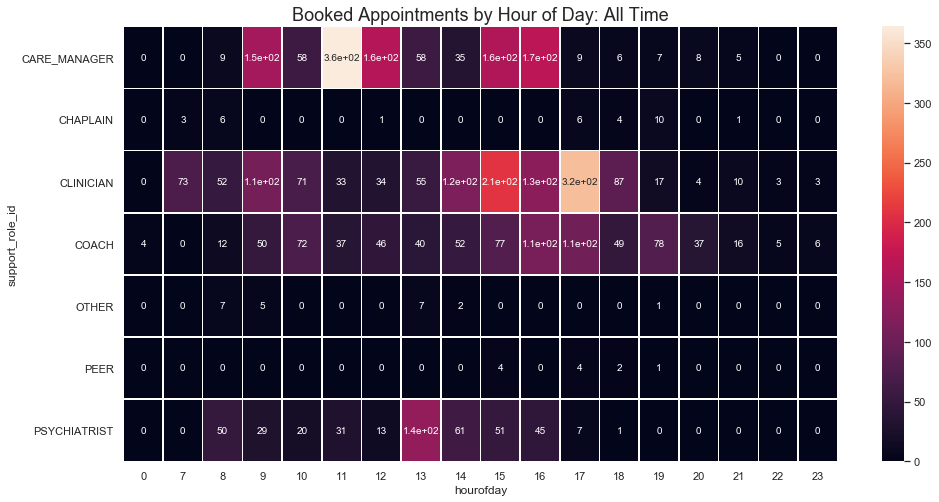

In [128]:
# Booked appointments by hour of day
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='hourofday', date_col='start_time', 
                        id_col='appointment_id', date_offset=0, save_fig=True, save_path=FIGURE_PATH)

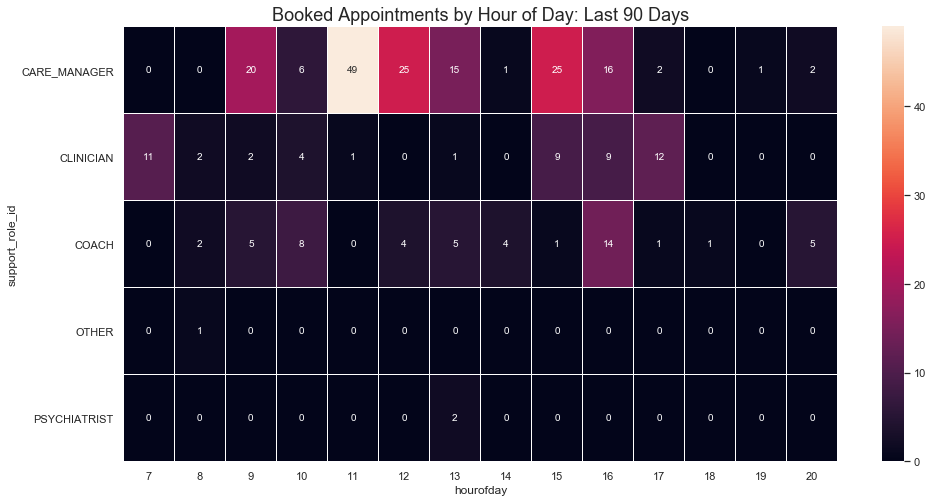

In [129]:
# Booked appointments by hour of day
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='hourofday', date_col='start_time', 
                        id_col='appointment_id', date_offset=-90, save_fig=True, save_path=FIGURE_PATH)

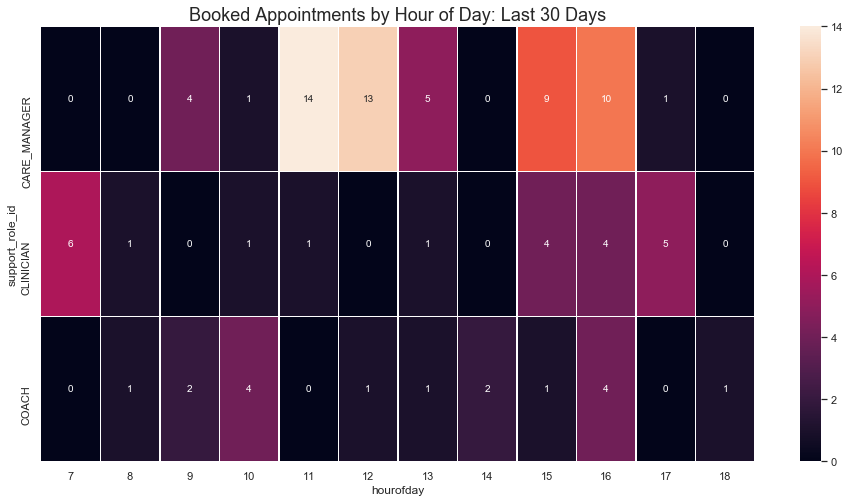

In [130]:
# Booked appointments by hour of day
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='hourofday', date_col='start_time', 
                        id_col='appointment_id', date_offset=-30, save_fig=True, save_path=FIGURE_PATH)

#### Available Appointments

In [131]:
available_times = provider_availability[['provider_availability_id','provider_id','date_time','created','support_role_id']].copy()
available_times['dayofweek'] = available_times['date_time'].dt.dayofweek
available_times['hourofday'] = available_times['date_time'].dt.hour

In [132]:
print(len(available_times))
print(len(available_times.columns))
available_times.head(2)

1492
7


provider_availability_id                           provider_id  \
0  886ecd56-4527-4fc7-ae27-91d2b5875d6b  00e1f7e0-cb78-420c-aac8-9c841081c542   
1  3d8209cd-7c3e-4a68-85d4-43daecc63ffb  00e1f7e0-cb78-420c-aac8-9c841081c542   

                  date_time                          created support_role_id  \
0 2020-10-08 08:00:00-04:00 2021-10-04 15:28:37.192211-04:00       CLINICIAN   
1 2020-10-15 08:00:00-04:00 2021-10-04 15:28:37.787609-04:00       CLINICIAN   

   dayofweek  hourofday  
0          3          8  
1          3          8

##### Day of Week

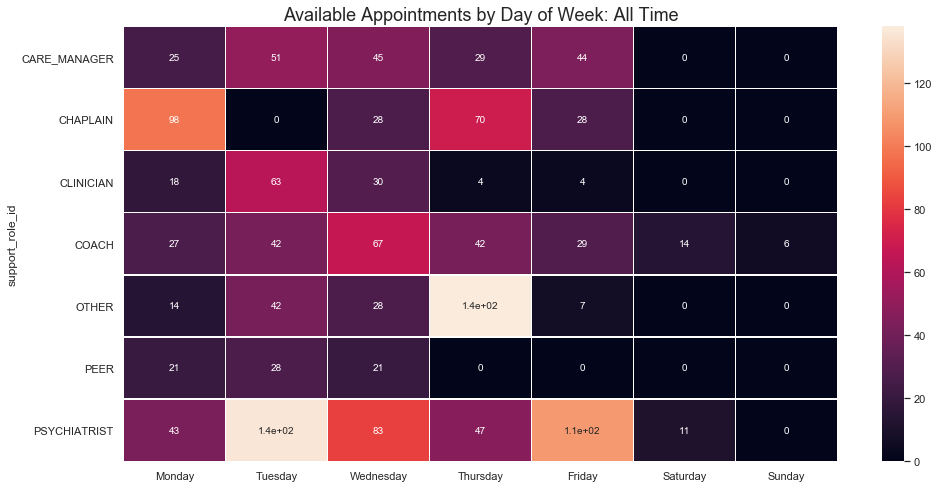

In [133]:
# Booked appointments by day of week
get_appointment_heatmap(available_times, apt_type='available', grouping='dayofweek', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=0, save_fig=True, save_path=FIGURE_PATH)

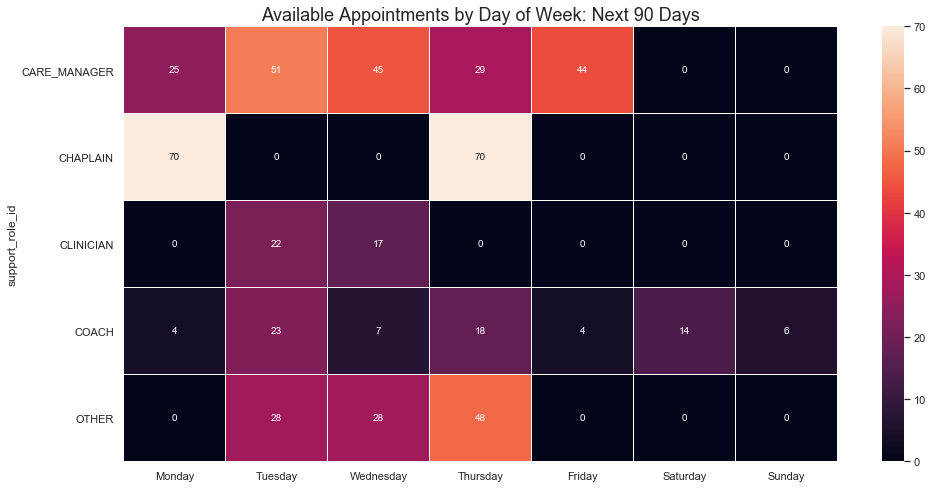

In [134]:
# Booked appointments by day of week
get_appointment_heatmap(available_times, apt_type='available', grouping='dayofweek', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=90, save_fig=True, save_path=FIGURE_PATH)

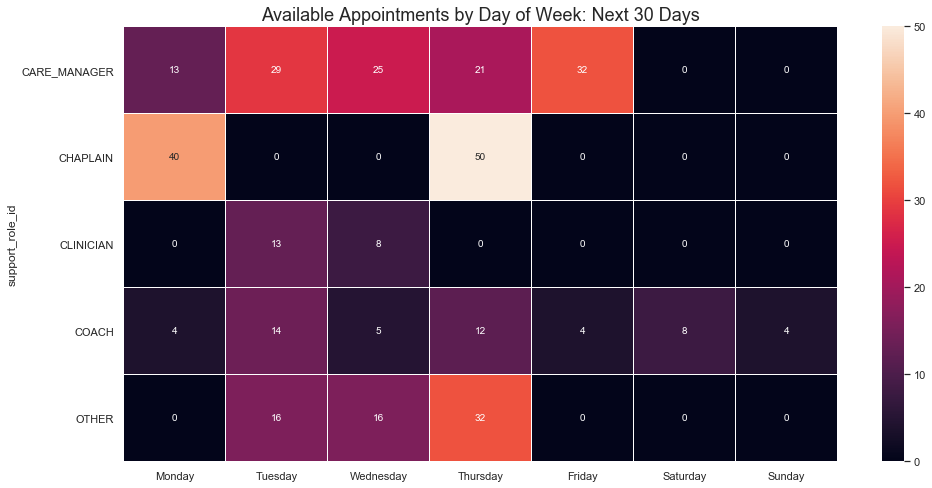

In [135]:
# Booked appointments by day of week
get_appointment_heatmap(available_times, apt_type='available', grouping='dayofweek', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=30, save_fig=True, save_path=FIGURE_PATH)

##### Hour of Day

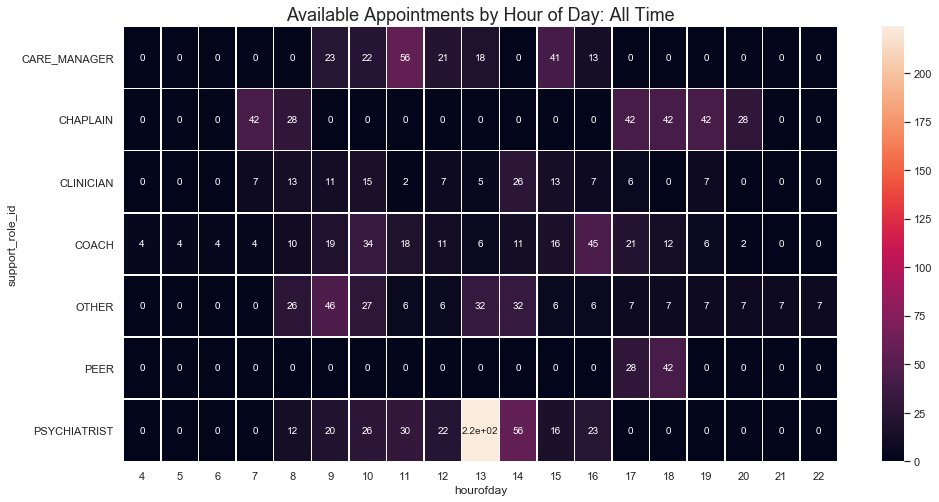

In [136]:
# Booked appointments by hour of day
get_appointment_heatmap(available_times, apt_type='available', grouping='hourofday', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=0, save_fig=True, save_path=FIGURE_PATH)

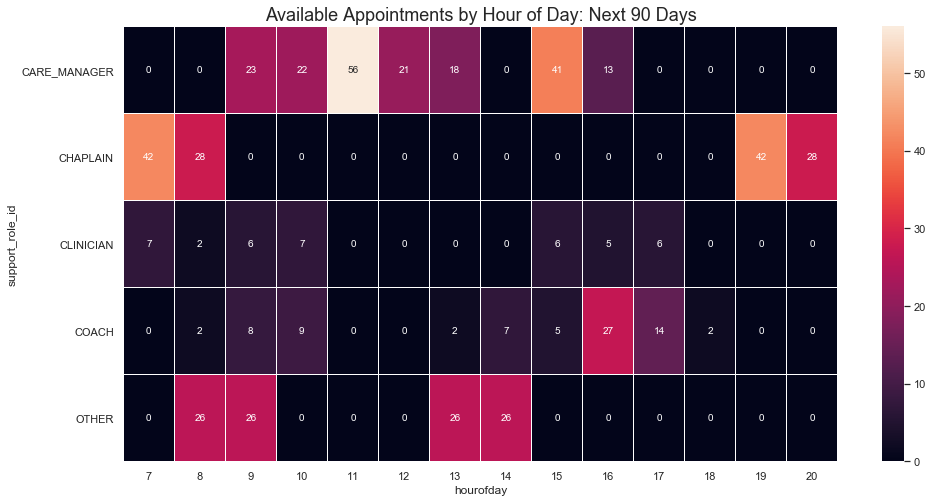

In [137]:
# Booked appointments by hour of day
get_appointment_heatmap(available_times, apt_type='available', grouping='hourofday', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=90, save_fig=True, save_path=FIGURE_PATH)

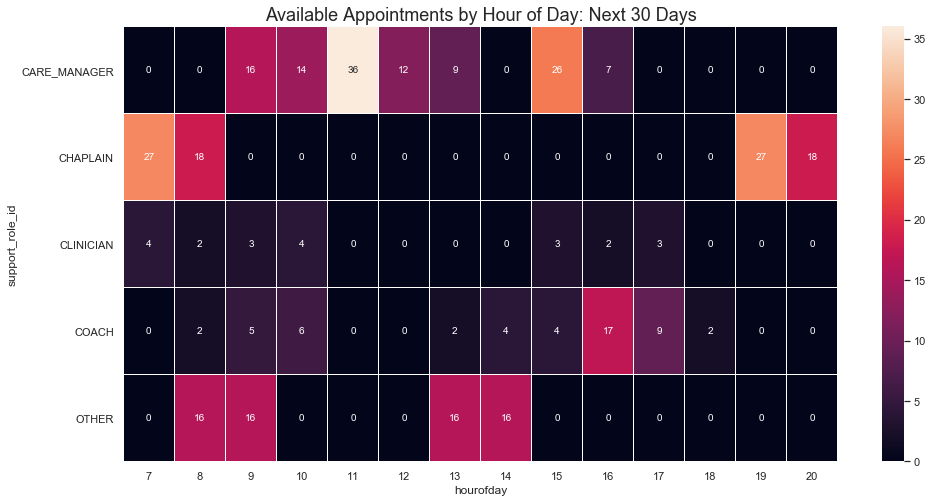

In [138]:
# Booked appointments by hour of day
get_appointment_heatmap(available_times, apt_type='available', grouping='hourofday', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=30, save_fig=True, save_path=FIGURE_PATH)

## Assessments

In [139]:
assessment.assessment_type_id.unique()

array(['GAD7', 'PHQ9', 'INTRO', 'PHQ4', 'PCPTSD', 'INTAKE'], dtype=object)

### PHQ4

#### Score Distribution

In [140]:
PHQ4_data.head()

0    150
1    164
2    261
3    262
4    419
Name: PHQ4_score, dtype: int64

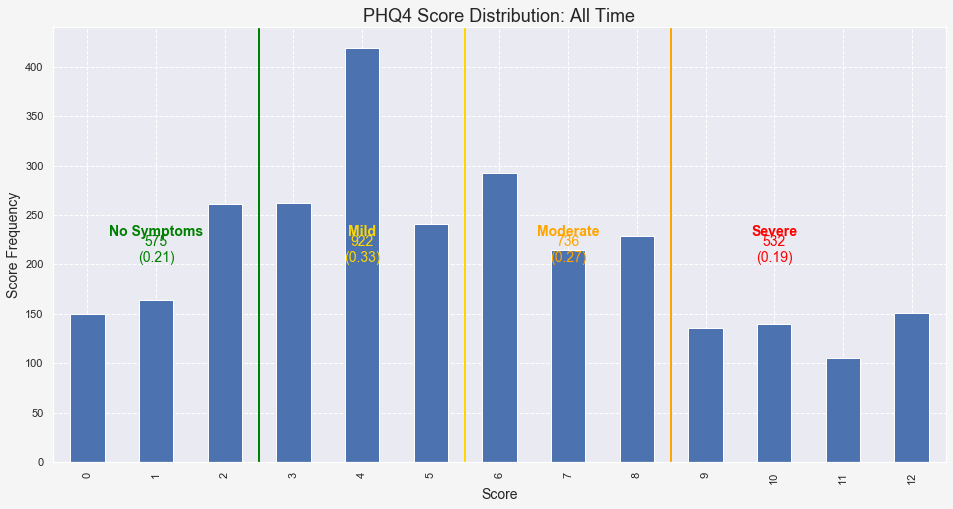

In [141]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
PHQ4_data.plot(ax=ax, kind='bar')
ax.set_title('PHQ4 Score Distribution: All Time', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Frequency', fontsize=14)

ax.axvline(2.5, linewidth=2, color='green')
ax.axvline(5.5, linewidth=2, color='gold')
ax.axvline(8.5, linewidth=2, color='orange')

ax.text(1, 240, 'No Symptoms', va='top', ha='center', color='green', fontsize=14, fontweight='bold')
ax.text(4, 240, 'Mild', va='top', ha='center', color='gold', fontsize=14, fontweight='bold')
ax.text(7, 240, 'Moderate', va='top', ha='center', color='orange', fontsize=14, fontweight='bold')
ax.text(10, 240, 'Severe', va='top', ha='center', color='red', fontsize=14, fontweight='bold')

ax.text(1, 230, str(PHQ4_data.loc[0:2].sum()) + '\n(' + str(round(PHQ4_data.loc[0:2].sum()/PHQ4_data.sum(),2)) + ')', va='top', ha='center', color='green', fontsize=14)
ax.text(4, 230, str(PHQ4_data.loc[3:5].sum()) + '\n(' + str(round(PHQ4_data.loc[3:5].sum()/PHQ4_data.sum(),2)) + ')', va='top', ha='center', color='gold', fontsize=14)
ax.text(7, 230, str(PHQ4_data.loc[6:8].sum()) + '\n(' + str(round(PHQ4_data.loc[6:8].sum()/PHQ4_data.sum(),2)) + ')', va='top', ha='center', color='orange', fontsize=14)
ax.text(10, 230, str(PHQ4_data.loc[9:].sum()) + '\n(' + str(round(PHQ4_data.loc[9:].sum()/PHQ4_data.sum(),2)) + ')', va='top', ha='center', color='red', fontsize=14)

save_figure(fig, FIGURE_PATH, 'PHQ4_hist_allTime_')

#### Time Series

In [142]:
print(len(PHQ4_ts_data))
PHQ4_ts_data.head()

29


PHQ4_score_count  PHQ4_score_mean  PHQ4_score_median  \
year month                                                         
2020 4                   153           5.3791                5.0   
     5                   130           5.7615                5.0   
     6                   156           5.8333                5.0   
     7                   146           6.4658                6.0   
     8                   138           5.4710                5.0   

            PHQ4_crisis_count  
year month                     
2020 4                     23  
     5                     12  
     6                     20  
     7                     26  
     8                     18

In [143]:
print(len(PHQ4_weekly_ts_data))
PHQ4_weekly_ts_data.head()

121


PHQ4_score_count  PHQ4_score_mean  PHQ4_score_median  \
Year Month Week                                                         
2020 4     9                   70           5.4571                6.0   
           16                  49           5.2857                5.0   
           23                  32           5.4062                6.0   
           30                  32           5.0312                4.0   
     5     7                   37           6.2703                6.0   

                 PHQ4_crisis_count  
Year Month Week                     
2020 4     9                    16  
           16                    6  
           23                    1  
           30                    2  
     5     7                     6

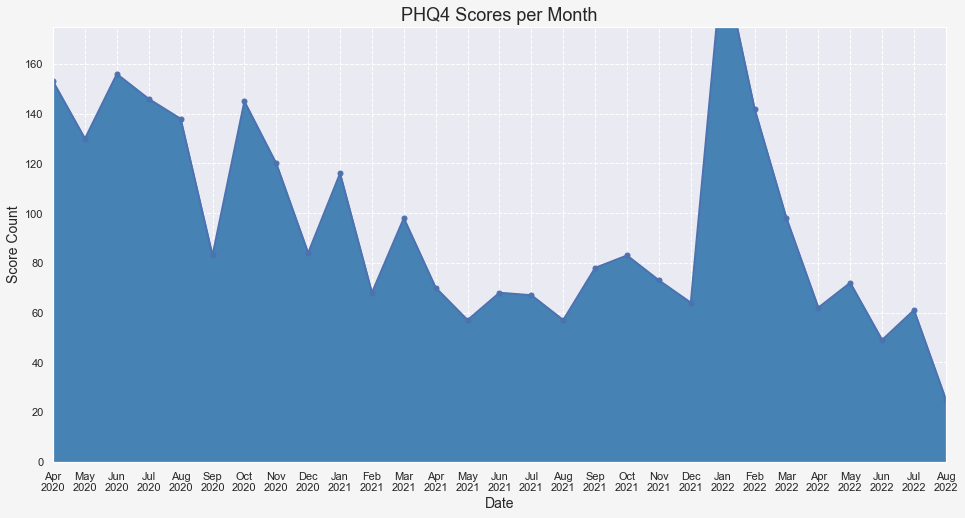

In [144]:
# PHQ4 scores by month
xlabels = get_ts_xlabels(index=PHQ4_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PHQ4_ts_data['PHQ4_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PHQ4 Scores per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PHQ4_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PHQ4_ts_data)-1)
ax.set_ylim(0,175)
ax.fill_between(np.arange(len(PHQ4_ts_data)), 0, PHQ4_ts_data['PHQ4_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PHQ4_monthly_')

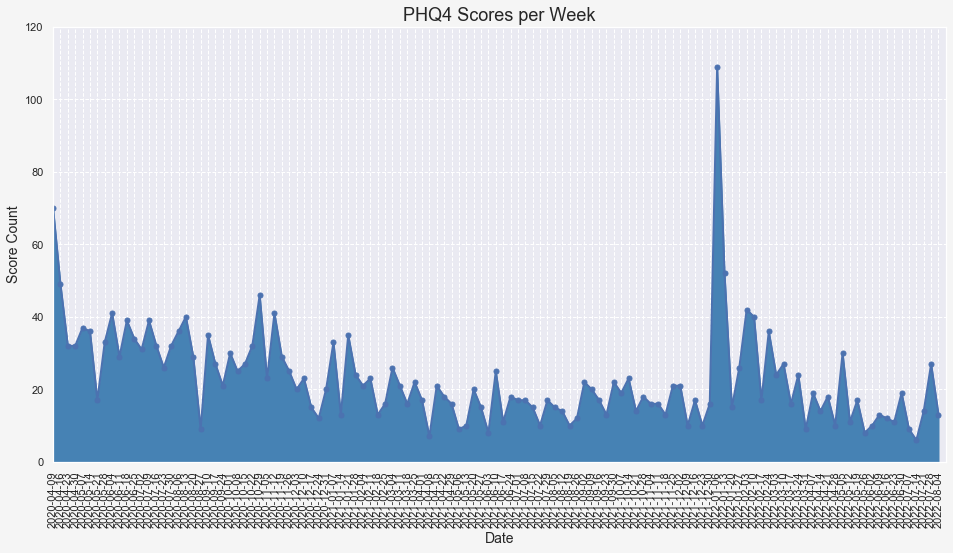

In [145]:
# PHQ4 scores by week
xlabels = get_ts_xlabels(index=PHQ4_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PHQ4_weekly_ts_data['PHQ4_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PHQ4 Scores per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PHQ4_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PHQ4_weekly_ts_data)-0)
ax.set_ylim(0,120)
ax.fill_between(np.arange(len(PHQ4_weekly_ts_data)), 0, PHQ4_weekly_ts_data['PHQ4_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PHQ4_weekly_')

### PHQ9

In [146]:
# Crisis question
PHQ9_crisis_response

several days               257
more than half the days     47
nearly every day            44
Name: answer_text, dtype: int64

#### Score Distribution

In [147]:
PHQ9_data.head()

0      8
1     16
2     46
3     67
4    111
Name: PHQ9_score, dtype: int64

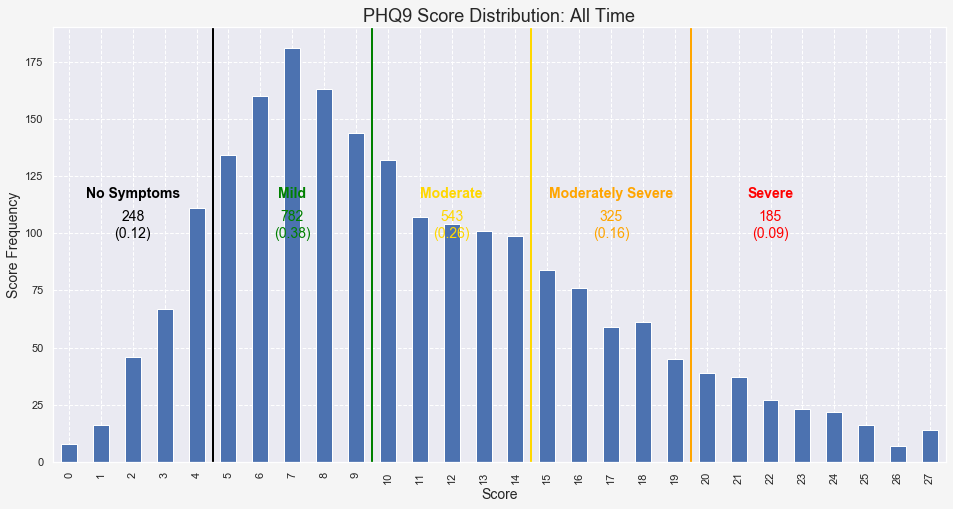

In [148]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
PHQ9_data.plot(ax=ax, kind='bar')
ax.set_title('PHQ9 Score Distribution: All Time', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Frequency', fontsize=14)

ax.axvline(4.5, linewidth=2, color='black')
ax.axvline(9.5, linewidth=2, color='green')
ax.axvline(14.5, linewidth=2, color='gold')
ax.axvline(19.5, linewidth=2, color='orange')

ax.text(2, 120, 'No Symptoms', va='top', ha='center', color='black', fontsize=14, fontweight='bold')
ax.text(7, 120, 'Mild', va='top', ha='center', color='green', fontsize=14, fontweight='bold')
ax.text(12, 120, 'Moderate', va='top', ha='center', color='gold', fontsize=14, fontweight='bold')
ax.text(17, 120, 'Moderately Severe', va='top', ha='center', color='orange', fontsize=14, fontweight='bold')
ax.text(22, 120, 'Severe', va='top', ha='center', color='red', fontsize=14, fontweight='bold')

ax.text(2, 110, str(PHQ9_data.loc[0:4].sum()) + '\n(' + str(round(PHQ9_data.loc[0:4].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='black', fontsize=14)
ax.text(7, 110, str(PHQ9_data.loc[5:9].sum()) + '\n(' + str(round(PHQ9_data.loc[5:9].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='green', fontsize=14)
ax.text(12, 110, str(PHQ9_data.loc[10:14].sum()) + '\n(' + str(round(PHQ9_data.loc[10:14].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='gold', fontsize=14)
ax.text(17, 110, str(PHQ9_data.loc[15:19].sum()) + '\n(' + str(round(PHQ9_data.loc[15:19].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='orange', fontsize=14)
ax.text(22, 110, str(PHQ9_data.loc[20:].sum()) + '\n(' + str(round(PHQ9_data.loc[20:].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='red', fontsize=14)

save_figure(fig, FIGURE_PATH, 'PHQ9_hist_allTime_')

#### Time Series

In [149]:
print(len(PHQ9_ts_data))
PHQ9_ts_data.head()

29


PHQ9_score_count  PHQ9_score_mean  PHQ9_score_median  \
year month                                                         
2020 4                   109          11.2661               10.0   
     5                    93          11.5914               10.0   
     6                   124          10.9355               10.0   
     7                   123          11.3984               11.0   
     8                   104          10.6923                9.0   

            PHQ9_crisis_count  
year month                     
2020 4                     23  
     5                     12  
     6                     20  
     7                     26  
     8                     18

In [150]:
print(len(PHQ9_weekly_ts_data))
PHQ9_weekly_ts_data.head()

121


PHQ9_score_count  PHQ9_score_mean  PHQ9_score_median  \
Year Month Week                                                         
2020 4     9                   49          12.3265               10.0   
           16                  37          10.4865                9.0   
           23                  22           9.9545               11.0   
           30                  22          11.6364                9.5   
     5     7                   28          12.8571               12.5   

                 PHQ9_crisis_count  
Year Month Week                     
2020 4     9                    16  
           16                    6  
           23                    1  
           30                    2  
     5     7                     6

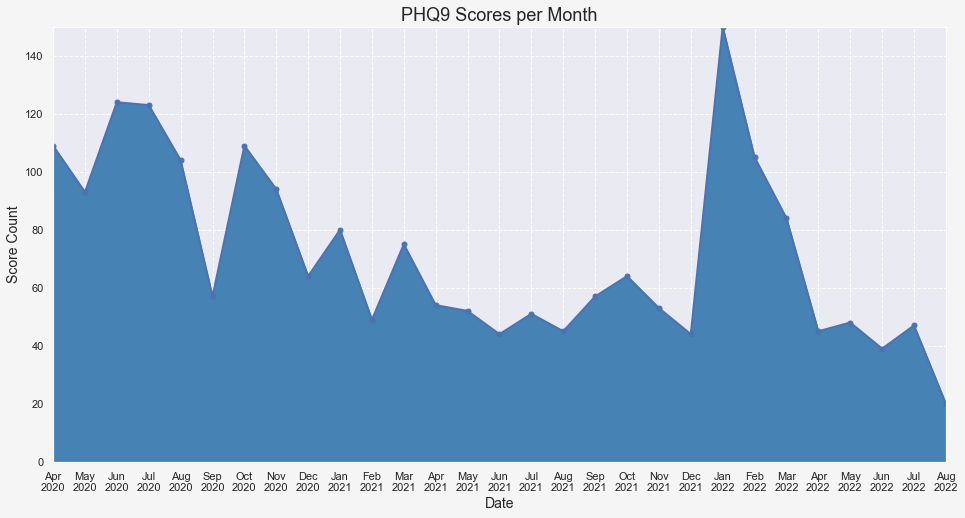

In [151]:
# PHQ9 scores by month
xlabels = get_ts_xlabels(index=PHQ9_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PHQ9_ts_data['PHQ9_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PHQ9 Scores per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PHQ9_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PHQ9_ts_data)-1)
ax.set_ylim(0,150)
ax.fill_between(np.arange(len(PHQ9_ts_data)), 0, PHQ9_ts_data['PHQ9_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PHQ9_monthly_')

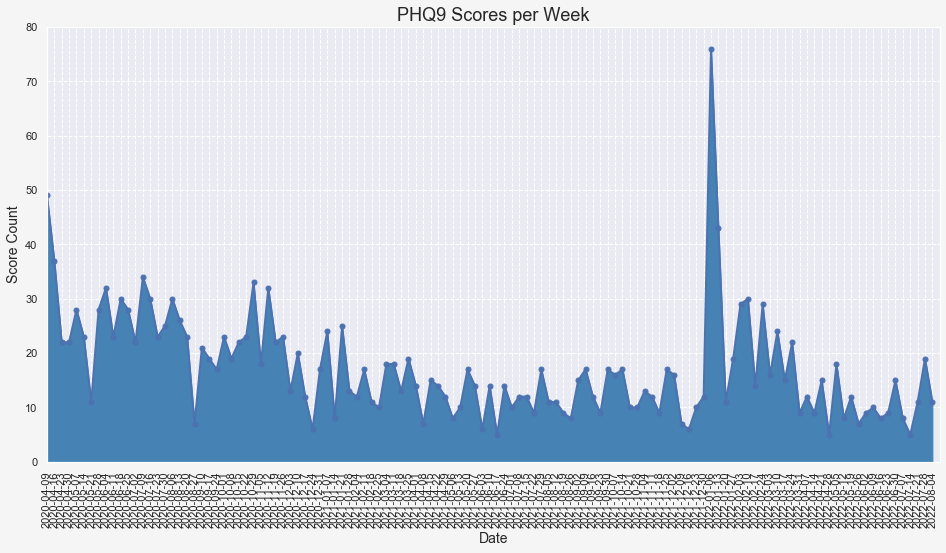

In [152]:
# PHQ9 scores by week
xlabels = get_ts_xlabels(index=PHQ9_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PHQ9_weekly_ts_data['PHQ9_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PHQ9 Scores per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PHQ9_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PHQ9_weekly_ts_data)-0)
ax.set_ylim(0,80)
ax.fill_between(np.arange(len(PHQ9_weekly_ts_data)), 0, PHQ9_weekly_ts_data['PHQ9_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PHQ9_weekly_')

### GAD7

#### Score Distribution

In [153]:
GAD7_data.head()

0     1
1     8
2    28
3    48
4    79
Name: GAD7_score, dtype: int64

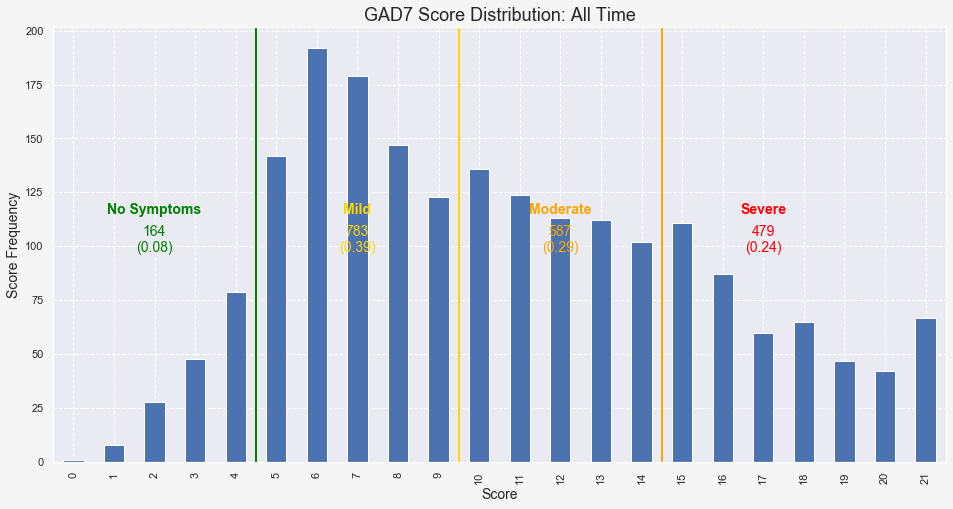

In [154]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
GAD7_data.plot(ax=ax, kind='bar')
ax.set_title('GAD7 Score Distribution: All Time', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Frequency', fontsize=14)

ax.axvline(4.5, linewidth=2, color='green')
ax.axvline(9.5, linewidth=2, color='gold')
ax.axvline(14.5, linewidth=2, color='orange')

ax.text(2, 120, 'No Symptoms', va='top', ha='center', color='green', fontsize=14, fontweight='bold')
ax.text(7, 120, 'Mild', va='top', ha='center', color='gold', fontsize=14, fontweight='bold')
ax.text(12, 120, 'Moderate', va='top', ha='center', color='orange', fontsize=14, fontweight='bold')
ax.text(17, 120, 'Severe', va='top', ha='center', color='red', fontsize=14, fontweight='bold')

ax.text(2, 110, str(GAD7_data.loc[0:4].sum()) + '\n(' + str(round(GAD7_data.loc[0:4].sum()/GAD7_data.sum(),2)) + ')', va='top', ha='center', color='green', fontsize=14)
ax.text(7, 110, str(GAD7_data.loc[5:9].sum()) + '\n(' + str(round(GAD7_data.loc[5:9].sum()/GAD7_data.sum(),2)) + ')', va='top', ha='center', color='gold', fontsize=14)
ax.text(12, 110, str(GAD7_data.loc[10:14].sum()) + '\n(' + str(round(GAD7_data.loc[10:14].sum()/GAD7_data.sum(),2)) + ')', va='top', ha='center', color='orange', fontsize=14)
ax.text(17, 110, str(GAD7_data.loc[15:].sum()) + '\n(' + str(round(GAD7_data.loc[15:].sum()/GAD7_data.sum(),2)) + ')', va='top', ha='center', color='red', fontsize=14)

save_figure(fig, FIGURE_PATH, 'GAD7_hist_allTime_')

#### Time Series

In [155]:
print(len(GAD7_ts_data))
GAD7_ts_data.head()

29


GAD7_score_count  GAD7_score_mean  GAD7_score_median  \
year month                                                         
2020 4                   100          11.3600               12.0   
     5                    90          11.6111               11.0   
     6                   116          10.7845               10.0   
     7                   115          10.9826               10.0   
     8                   102          10.9706               10.5   

            GAD7_crisis_count  
year month                     
2020 4                     18  
     5                     11  
     6                     16  
     7                     20  
     8                     18

In [156]:
print(len(GAD7_weekly_ts_data))
GAD7_weekly_ts_data.head()

121


GAD7_score_count  GAD7_score_mean  GAD7_score_median  \
Year Month Week                                                         
2020 4     9                   41          12.0000               12.0   
           16                  36           9.8889                9.5   
           23                  22          12.4091               13.0   
           30                  22          11.4091               11.5   
     5     7                   27          11.1852               11.0   

                 GAD7_crisis_count  
Year Month Week                     
2020 4     9                    12  
           16                    5  
           23                    1  
           30                    2  
     5     7                     5

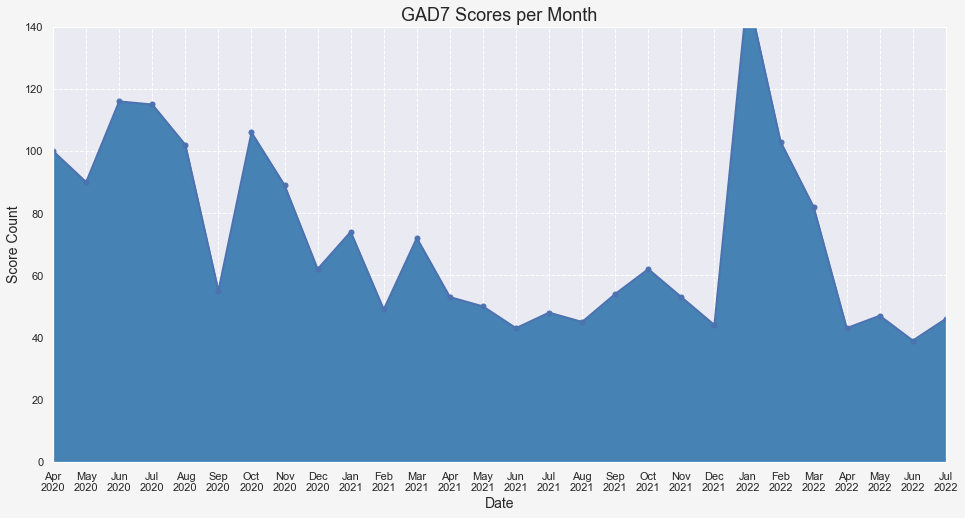

In [157]:
# GAD7 scores by month
xlabels = get_ts_xlabels(index=GAD7_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(GAD7_ts_data['GAD7_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('GAD7 Scores per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(GAD7_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(GAD7_ts_data)-2)
ax.set_ylim(0,140)
ax.fill_between(np.arange(len(GAD7_ts_data)), 0, GAD7_ts_data['GAD7_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'GAD7_monthly_')

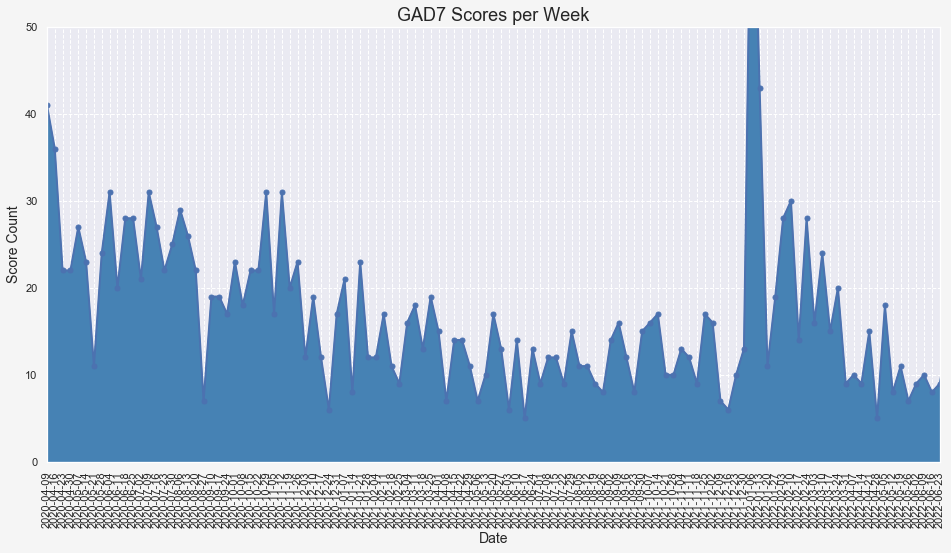

In [158]:
# GAD7 scores by week
xlabels = get_ts_xlabels(index=GAD7_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(GAD7_weekly_ts_data['GAD7_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('GAD7 Scores per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(GAD7_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(GAD7_weekly_ts_data)-7)
ax.set_ylim(0,50)
ax.fill_between(np.arange(len(GAD7_weekly_ts_data)), 0, GAD7_weekly_ts_data['GAD7_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'GAD7_weekly_')

### PC-PTSD

#### Score Distribution

In [159]:
PCPTSD_data.head()

0    358
1    554
2    456
3    300
4    180
Name: PCPTSD_score, dtype: int64

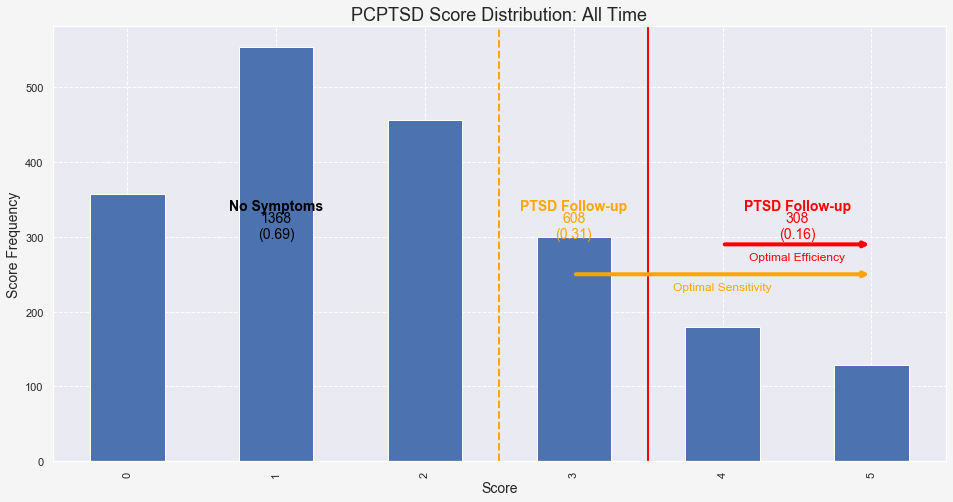

In [160]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
PCPTSD_data.plot(ax=ax, kind='bar')
ax.set_title('PCPTSD Score Distribution: All Time', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Frequency', fontsize=14)

ax.axvline(2.5, linewidth=2, linestyle='--', color='orange')
ax.axvline(3.5, linewidth=2, color='red')

ax.text(1, 350, 'No Symptoms', va='top', ha='center', color='black', fontsize=14, fontweight='bold')
ax.text(3, 350, 'PTSD Follow-up', va='top', ha='center', color='orange', fontsize=14, fontweight='bold')
ax.text(4.5, 350, 'PTSD Follow-up', va='top', ha='center', color='red', fontsize=14, fontweight='bold')

ax.text(1, 335, str(PCPTSD_data.loc[0:2].sum()) + '\n(' + str(round(PCPTSD_data.loc[0:2].sum()/PCPTSD_data.sum(),2)) + ')', va='top', ha='center', color='black', fontsize=14)
ax.text(3, 335, str(PCPTSD_data.loc[3:5].sum()) + '\n(' + str(round(PCPTSD_data.loc[3:5].sum()/PCPTSD_data.sum(),2)) + ')', va='top', ha='center', color='orange', fontsize=14)
ax.text(4.5, 335, str(PCPTSD_data.loc[4:5].sum()) + '\n(' + str(round(PCPTSD_data.loc[4:5].sum()/PCPTSD_data.sum(),2)) + ')', va='top', ha='center', color='red', fontsize=14)


ax.annotate('', xy=(3,250), xytext=(5,250),
            arrowprops={'arrowstyle': '<-', 'lw': 4, 'color': 'orange'},
            va='center', ha='left')
ax.text(4, 240, 'Optimal Sensitivity', va='top', ha='center',color='orange', fontsize=12)

ax.annotate('', xy=(4,290), xytext=(5,290),
            arrowprops={'arrowstyle': '<-', 'lw': 4, 'color': 'red'},
            va='center', ha='left')
ax.text(4.5, 280, 'Optimal Efficiency', va='top', ha='center',color='red', fontsize=12)

save_figure(fig, FIGURE_PATH, 'PCPTSD_hist_allTime_')

#### Time Series

In [161]:
print(len(PCPTSD_ts_data))
PCPTSD_ts_data.head()

29


PCPTSD_score_count  PCPTSD_score_mean  PCPTSD_score_median  \
year month                                                               
2020 4                     100             2.3100                  2.0   
     5                      87             2.3218                  2.0   
     6                     113             2.0000                  2.0   
     7                     115             1.9565                  2.0   
     8                      98             2.1939                  2.0   

            PCPTSD_crisis_count  
year month                       
2020 4                       18  
     5                       11  
     6                       14  
     7                       20  
     8                       17

In [162]:
print(len(PCPTSD_weekly_ts_data))
PCPTSD_weekly_ts_data.head()

121


PCPTSD_score_count  PCPTSD_score_mean  PCPTSD_score_median  \
Year Month Week                                                               
2020 4     9                     41             2.1951                  2.0   
           16                    36             2.3056                  2.0   
           23                    22             2.5000                  3.0   
           30                    22             2.5455                  2.5   
     5     7                     27             2.2222                  2.0   

                 PCPTSD_crisis_count  
Year Month Week                       
2020 4     9                      12  
           16                      5  
           23                      1  
           30                      2  
     5     7                       5

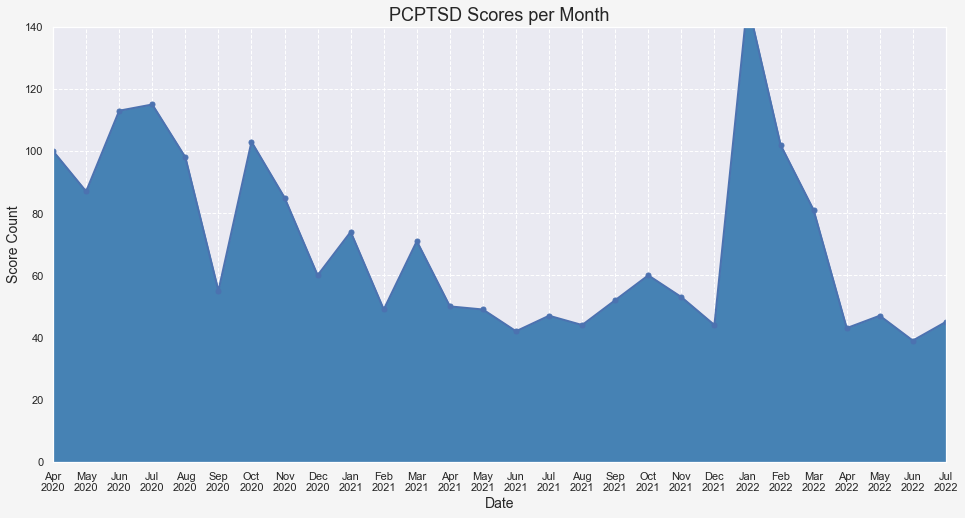

In [163]:
# PCPTSD scores by month
xlabels = get_ts_xlabels(index=PCPTSD_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PCPTSD_ts_data['PCPTSD_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PCPTSD Scores per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PCPTSD_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PCPTSD_ts_data)-2)
ax.set_ylim(0,140)
ax.fill_between(np.arange(len(PCPTSD_ts_data)), 0, PCPTSD_ts_data['PCPTSD_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PCPTSD_monthly_')

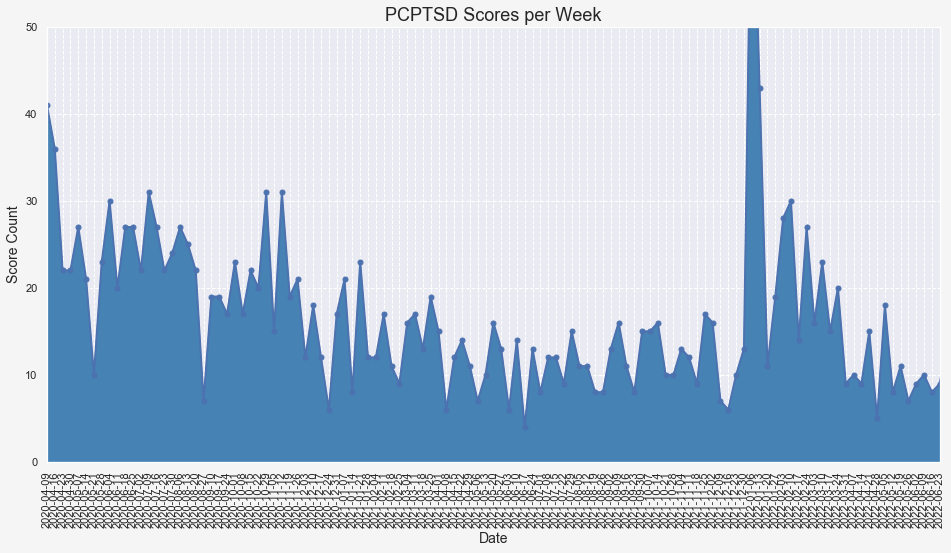

In [164]:
# PCPTSD scores by week
xlabels = get_ts_xlabels(index=PCPTSD_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PCPTSD_weekly_ts_data['PCPTSD_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PCPTSD Scores per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PCPTSD_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PCPTSD_weekly_ts_data)-7)
ax.set_ylim(0,50)
ax.fill_between(np.arange(len(PCPTSD_weekly_ts_data)), 0, PCPTSD_weekly_ts_data['PCPTSD_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PCPTSD_weekly_')

# Dashboard and Reporting Data

## Time Series

### Monthly

In [165]:
# Create time series dataset - can remove multiindex and add datetime index if needed
use_cols = ['user_count','apt_count','apt_completed_count','apt_canceled_count','apt_avail_count','prov_count']

time_series_monthly = acct_monthly_ts_data.merge(apt_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_completed_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_canceled_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_avail_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(prov_ts_data, how='outer', left_index=True, right_index=True)

time_series_monthly.columns = use_cols
time_series_monthly = time_series_monthly.fillna(0)

In [166]:
name = CHART_PATH + 'time_series_monthly_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
time_series_monthly.to_csv(name)

In [167]:
print(len(time_series_monthly))
print(len(time_series_monthly.columns))
time_series_monthly.head(2)

31
6


user_count  apt_count  apt_completed_count  apt_canceled_count  \
year month                                                                   
2020 4          3005.0       66.0                 53.0                13.0   
     5          1920.0      160.0                121.0                39.0   

            apt_avail_count  prov_count  
year month                               
2020 4                  0.0        63.0  
     5                 11.0       100.0

### Weekly

In [168]:
# Create time series dataset - can remove multiindex and add datetime index if needed
use_cols = ['user_count','apt_count','apt_completed_count','apt_canceled_count','apt_avail_count','prov_count']

time_series_weekly = acct_weekly_ts_data.merge(apt_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_weekly_completed_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_weekly_canceled_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_avail_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(prov_weekly_ts_data, how='outer', left_index=True, right_index=True)

time_series_weekly.columns = use_cols
time_series_weekly.index.names = ['year','month','week']
time_series_weekly = time_series_weekly.fillna(0)

In [169]:
name = CHART_PATH + 'time_series_weekly_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
time_series_weekly.to_csv(name)

In [170]:
print(len(time_series_weekly))
print(len(time_series_weekly.columns))
time_series_weekly.head(2)

130
6


user_count  apt_count  apt_completed_count  \
year month week                                               
2020 4     9         1456.0        4.0                  3.0   
           16         947.0       24.0                 19.0   

                 apt_canceled_count  apt_avail_count  prov_count  
year month week                                                   
2020 4     9                    1.0              0.0        23.0  
           16                   5.0              0.0         0.0

# Exploratory

## User Characteristics
* Create user characteristics dataset for summary stats and machine learning applications (clustering, predictive modeling, etc.)

In [171]:
appointment.head(2)

appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
0  8e52c173-f3d4-4b9d-913c-32a5679e2387  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9             8.0982e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
0                         NaN              NaN            1.0305e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
0  https://bluejeans.com/166022552/0525                 1:1 with Care Manager   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
0 2022-04-22 11:00:00-04:00 2022-04-22 11:30:00                   30   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
0  America/New_York     False         NaT 2022-04-20 11:32:48.204541-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
0 2022-04-20 15:32:48.204541+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
0  aef3538a-73fa-40cf-8d3f-367022913b9c         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
0                           0525  20290377-2978-4472-b00c-6f604f25ee58   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
0               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  created_year  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None          2022   
0  08048f29-035c-4341-82fd-b41406303114                    None          2022   

   created_month  created_day created_year_month created_year_month_week  \
0              6           22         2022-06-01              2022-06-16   
0              4           20         2022-04-01              2022-04-14   

  created_dayofyear  apt_year  apt_month  apt_day apt_year_month  \
0          20220622      2022          7        6     2022-07-01   
0          20220420      2022          4       22     2022-04-01   

  apt_year_month_week apt_dayofyear  created_completed_time  \
0          2022-06-30      20220706                    14.0   
0          2022-04-21      20220422                     2.0   

                  appointment_type_name support_role_id  
0  1:1 Appointment with Psychotherapist       CLINICIAN  
0                 1:1 with Care Manager    CARE_MANAGER

In [172]:
# number of apts per account
user_num_apts = appointment.groupby(['account_id']).count()[['appointment_id']]
user_num_apts.columns = ['num_apts']

# number of providers per account
user_num_providers = appointment.groupby(['account_id']).agg({'provider_id':'nunique'})
user_num_providers.columns = ['num_providers']

# mean appointments per provider
user_mean_apt_provider = appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].mean(level=0).round()
user_mean_apt_provider.columns = ['mean_apt_per_provider']

# min appointments per provider
user_min_apt_provider = appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].min(level=0)
user_min_apt_provider.columns = ['min_apt_per_provider']

# max appointments per provider
user_max_apt_provider = appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].max(level=0)
user_max_apt_provider.columns = ['max_apt_per_provider']

# max-min appointments per provider
user_range_apt_provider = appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].max(level=0) - appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].min(level=0)
user_range_apt_provider.columns = ['range_apt_per_provider']

# mean appointment created to completed time
user_mean_created_completed_time = appointment.groupby(['account_id'])[['created_completed_time']].mean().round()
user_mean_created_completed_time.columns = ['mean_created_completed_time']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and wil

In [173]:
user_data = pd.concat([user_num_apts, user_num_providers, user_mean_apt_provider, user_min_apt_provider, 
                       user_max_apt_provider, user_range_apt_provider, user_mean_created_completed_time], axis=1)

In [174]:
print(len(user_data))
print(len(user_data.columns))
user_data.head(20)

2448
7


num_apts  num_providers  \
account_id                                                      
00288a93-7b43-430b-89f5-181d3a1f5664         1              1   
0035c06c-a6c1-4651-b702-8e91828b8c01         1              1   
0066a0b5-8ead-41f5-8b92-377b2250b4c1         1              1   
00896d9e-54f4-49da-8d24-8e970b63f8dc         1              1   
009a8b22-60f7-40cf-9314-6f4a903c0654         1              1   
009bc0c1-4b47-4c45-9087-a3318eb2d82e         1              1   
00a3a735-7ab0-407f-935e-f8e9c65d4af7         1              1   
00b4d050-4c1d-4c81-98c9-55cfc9482207         1              1   
00de2fb4-c9eb-487c-aca3-5f8143ea5446         1              1   
00e09569-d22a-403f-bced-864d3b1c2f2e         1              1   
00f4f773-ad8c-4b12-81e6-d17fdf8f8e14         1              1   
00ffedde-2b2f-440f-aabc-8e18fc14243c         2              1   
013465aa-c8f0-40b3-8691-fb1864b637af         1              1   
01484884-1f70-42ac-a3cb-413aa0b5f987         1              1   
0178ab19-3f24-4d13-8b14-b6fdcbd6b91d         1              1   
018ed96b-54b7-480c-881d-479ccd87ac01         1              1   
019ce6ed-20ef-4fe8-8770-b56bac968d79         2              2   
01a99278-1c20-4cde-a787-c1dda9222709         1              1   
01aa69bd-32c8-49e5-a61b-79dfe0581623         8              1   
01f7e56c-d31c-40c6-8ef5-29e5e52bcf85         1              1   

                                      mean_apt_per_provider  \
account_id                                                    
00288a93-7b43-430b-89f5-181d3a1f5664                    1.0   
0035c06c-a6c1-4651-b702-8e91828b8c01                    1.0   
0066a0b5-8ead-41f5-8b92-377b2250b4c1                    1.0   
00896d9e-54f4-49da-8d24-8e970b63f8dc                    1.0   
009a8b22-60f7-40cf-9314-6f4a903c0654                    1.0   
009bc0c1-4b47-4c45-9087-a3318eb2d82e                    1.0   
00a3a735-7ab0-407f-935e-f8e9c65d4af7                    1.0   
00b4d050-4c1d-4c81-98c9-55cfc9482207                    1.0   
00de2fb4-c9eb-487c-aca3-5f8143ea5446                    1.0   
00e09569-d22a-403f-bced-864d3b1c2f2e                    1.0   
00f4f773-ad8c-4b12-81e6-d17fdf8f8e14                    1.0   
00ffedde-2b2f-440f-aabc-8e18fc14243c                    2.0   
013465aa-c8f0-40b3-8691-fb1864b637af                    1.0   
01484884-1f70-42ac-a3cb-413aa0b5f987                    1.0   
0178ab19-3f24-4d13-8b14-b6fdcbd6b91d                    1.0   
018ed96b-54b7-480c-881d-479ccd87ac01                    1.0   
019ce6ed-20ef-4fe8-8770-b56bac968d79                    1.0   
01a99278-1c20-4cde-a787-c1dda9222709                    1.0   
01aa69bd-32c8-49e5-a61b-79dfe0581623                    8.0   
01f7e56c-d31c-40c6-8ef5-29e5e52bcf85                    1.0   

                                      min_apt_per_provider  \
account_id                                                   
00288a93-7b43-430b-89f5-181d3a1f5664                     1   
0035c06c-a6c1-4651-b702-8e91828b8c01                     1   
0066a0b5-8ead-41f5-8b92-377b2250b4c1                     1   
00896d9e-54f4-49da-8d24-8e970b63f8dc                     1   
009a8b22-60f7-40cf-9314-6f4a903c0654                     1   
009bc0c1-4b47-4c45-9087-a3318eb2d82e                     1   
00a3a735-7ab0-407f-935e-f8e9c65d4af7                     1   
00b4d050-4c1d-4c81-98c9-55cfc9482207                     1   
00de2fb4-c9eb-487c-aca3-5f8143ea5446                     1   
00e09569-d22a-403f-bced-864d3b1c2f2e                     1   
00f4f773-ad8c-4b12-81e6-d17fdf8f8e14                     1   
00ffedde-2b2f-440f-aabc-8e18fc14243c                     2   
013465aa-c8f0-40b3-8691-fb1864b637af                     1   
01484884-1f70-42ac-a3cb-413aa0b5f987                     1   
0178ab19-3f24-4d13-8b14-b6fdcbd6b91d                     1   
018ed96b-54b7-480c-881d-479ccd87ac01                     1   
019ce6ed-20ef-4fe8-8770-b56bac968d79                     1   
01a99278-1c20-4cde-a787-c1dda9222709      

In [175]:
appointment.created_completed_time.mean()

9.089934640522875

In [176]:
appointment.created_completed_time.median()

6.0

In [177]:
((appointment['start_time'] - appointment['created'])/np.timedelta64(1, 'D')).mean()

9.085049933786271

In [178]:
((appointment['start_time'] - appointment['created'])/np.timedelta64(1, 'D')).median()

5.893887482905092

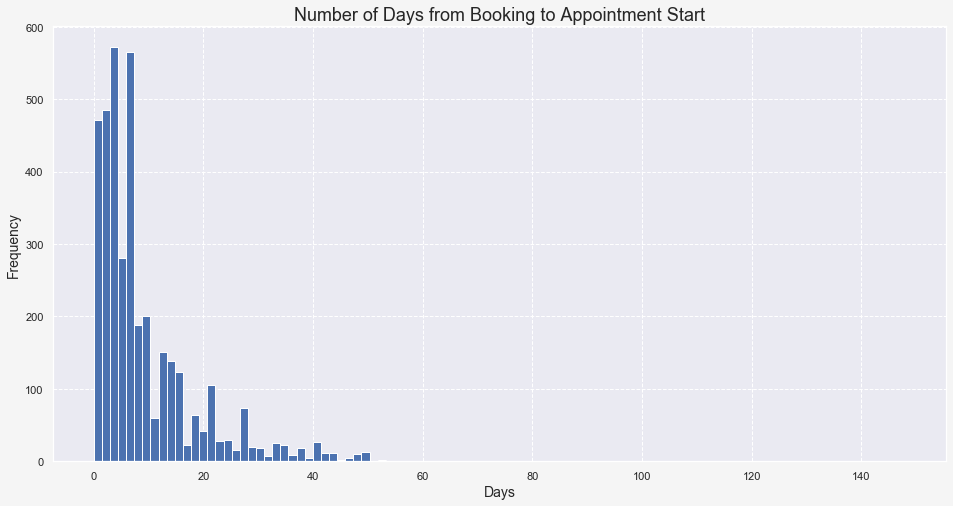

In [179]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
appointment.created_completed_time.hist(bins=100)
ax.set_title('Number of Days from Booking to Appointment Start', fontsize=18)
ax.set_xlabel('Days', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
save_figure(fig, FIGURE_PATH, 'appointment_createdCompleted_hist_')

# Unused/Deprecated Code

In [180]:
"""
CHAPLAIN
The Chaplain is In - for You (13838743)
1:1 Session with Chaplain (14291063)
 
PEER
1:1 with Peer (14190381) 

RESILIENCE COACH
1:1 Session with Resilience Coach (13759153)

CARE MANAGER (i.e. EAP Psychotherapists)
1:1 with Care Manager (14446371)

CLINICIAN (i.e. Psychotherapists)
1:1 Initial Appointment with Psychotherapist (14710011)
1:1 CTSA Intake Appointment (21475237)
1:1 Appointment with Psychotherapist (13869919)
CCT Intake Appointment (14439014) 

PSYCHIATRIST (i.e. Psychiatrists & Psychiatric Nurse Practitioners)
1:1 Session with Psychiatrist (13862309)
1:1 Psychiatrist Follow-ups (13863435)
1:1 with Psychiatric Nurse Practitioner (14445820)
1:1 Psych NP Follow-Up (14460017)

OTHER (i.e. Nutritionists, Pain Specialists, Exercise Physiologists, etc.)
1:1 with Dietitian (15523504)
1:1 Session with Exercise Physiologist (14033325)
1:1 Strength and Training Specialist (15677112)
1:1 with Pain Specialist (14300187)
"""

'\nCHAPLAIN\nThe Chaplain is In - for You (13838743)\n1:1 Session with Chaplain (14291063)\n \nPEER\n1:1 with Peer (14190381) \n\nRESILIENCE COACH\n1:1 Session with Resilience Coach (13759153)\n\nCARE MANAGER (i.e. EAP Psychotherapists)\n1:1 with Care Manager (14446371)\n\nCLINICIAN (i.e. Psychotherapists)\n1:1 Initial Appointment with Psychotherapist (14710011)\n1:1 CTSA Intake Appointment (21475237)\n1:1 Appointment with Psychotherapist (13869919)\nCCT Intake Appointment (14439014) \n\nPSYCHIATRIST (i.e. Psychiatrists & Psychiatric Nurse Practitioners)\n1:1 Session with Psychiatrist (13862309)\n1:1 Psychiatrist Follow-ups (13863435)\n1:1 with Psychiatric Nurse Practitioner (14445820)\n1:1 Psych NP Follow-Up (14460017)\n\nOTHER (i.e. Nutritionists, Pain Specialists, Exercise Physiologists, etc.)\n1:1 with Dietitian (15523504)\n1:1 Session with Exercise Physiologist (14033325)\n1:1 Strength and Training Specialist (15677112)\n1:1 with Pain Specialist (14300187)\n'

In [181]:
"""

# For a quick, testing approach - need to add code to delete all records before using .to_sql with append
from sqlalchemy import create_engine
conn_str = 'postgresql://' + DB_REPORTING_USER + ':' + DB_REPORTING_PASSWORD + '@' + DB_REPORTING_HOST + '/' + DB_REPORTING_NAME
engine = create_engine(conn_str)

#time_series_monthly.to_sql(DB_REPORTING_MONTHLY_NAME, engine, if_exists='append')
#time_series_weekly.to_sql(DB_REPORTING_WEEKLY_NAME, engine, if_exists='append')

"""

"\n\n# For a quick, testing approach - need to add code to delete all records before using .to_sql with append\nfrom sqlalchemy import create_engine\nconn_str = 'postgresql://' + DB_REPORTING_USER + ':' + DB_REPORTING_PASSWORD + '@' + DB_REPORTING_HOST + '/' + DB_REPORTING_NAME\nengine = create_engine(conn_str)\n\n#time_series_monthly.to_sql(DB_REPORTING_MONTHLY_NAME, engine, if_exists='append')\n#time_series_weekly.to_sql(DB_REPORTING_WEEKLY_NAME, engine, if_exists='append')\n\n"